In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

## 土地，区分建物，建物を別のモデルで学習

In [2]:
df_1v2_reason95_orderlog0_livedum_all = pd.read_csv('df_1v2_reason95_orderlog0_livedum_all.csv')

C:\Users\GUESTUSER\AppData\Local\Temp\ipykernel_2744\1688623676.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_1v2_reason95_orderlog0_livedum_all = pd.read_csv('df_1v2_reason95_orderlog0_livedum_all.csv')


In [3]:
df_1v2_reason95_orderlog0_livedum_all.head(5)

register_num register_date register_type pref     location  land_num  other  \
0         3768    2023-02-09            単独  東京都     北区赤羽南1丁目   3-1-304    NaN   
1         3687    2023-02-09            連先  東京都    北区田端新町1丁目  108-2-17    NaN   
2         3683    2023-02-09            連先  東京都    北区王子本町2丁目     11-15    NaN   
3         1451    2023-02-09            単独  広島県  呉市安浦町安登東1丁目    1530-1    3.0   
4         1484    2023-02-09            単独  広島県   呉市安浦町水尻2丁目     311-8    1.0   

  city        size use_district  ...  dummy_権利の変更・更正  dummy_権利の移転(所有権を除く)  \
0   北区  119.131047          NaN  ...               0                    0   
1   北区  119.131047          NaN  ...               0                    0   
2   北区  119.131047          NaN  ...               0                    0   
3   呉市  852.250843          NaN  ...               0                    0   
4   呉市  165.875125      第一種住居地域  ...               0                    0   

   dummy_滅失  dummy_登記名義人の氏名等についての変更・更正  dummy_表題  dummy_新 dummy_既  \
0         0                          0         0        0       1   
1         0                          1         0        0       1   
2         1                          0         0        0       1   
3         0                          0         0        0       1   
4         0                          0         0        0       1   

  population_density  month_sin month_cos  
0             6402.6   0.866025       0.5  
1             6402.6   0.866025       0.5  
2             6402.6   0.866025       0.5  
3              330.2   0.866025       0.5  
4              330.2   0.866025       0.5  

[5 rows x 58 columns]

In [4]:
df_1v2_reason95_orderlog0_livedum_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5765606 entries, 0 to 5765605
Data columns (total 58 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   register_num               object 
 1   register_date              object 
 2   register_type              object 
 3   pref                       object 
 4   location                   object 
 5   land_num                   object 
 6   other                      float64
 7   city                       object 
 8   size                       float64
 9   use_district               object 
 10  lat                        float64
 11  lon                        float64
 12  building_coverage_ratio    float64
 13  floor_area_ratio           float64
 14  official_price             float64
 15  land_price                 float64
 16  location_all               object 
 17  year_month                 object 
 18  land_id                    float64
 19  sales1_date                object 
 20  sa

In [5]:
len(df_1v2_reason95_orderlog0_livedum_all[df_1v2_reason95_orderlog0_livedum_all["dummy_土地"] == 1])

3578141

In [6]:
len(df_1v2_reason95_orderlog0_livedum_all[df_1v2_reason95_orderlog0_livedum_all["dummy_建物"] == 1])

1494525

In [7]:
len(df_1v2_reason95_orderlog0_livedum_all[df_1v2_reason95_orderlog0_livedum_all["dummy_区分建物"] == 1])

692896

In [8]:
df_1v2_reason95_orderlog0_livedum_all_land = df_1v2_reason95_orderlog0_livedum_all[df_1v2_reason95_orderlog0_livedum_all["dummy_土地"] == 1]

In [9]:
# DataFrameを新しいCSVファイルとして保存
df_1v2_reason95_orderlog0_livedum_all_land.to_csv('df_1v2_reason95_orderlog0_livedum_all_land.csv', index=False)

In [2]:
df_1v2_reason95_orderlog0_livedum_all_land = pd.read_csv('df_1v2_reason95_orderlog0_livedum_all_land.csv')

In [3]:
df_1v2_reason95_orderlog0_livedum_all_land.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3578141 entries, 0 to 3578140
Data columns (total 58 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   register_num               object 
 1   register_date              object 
 2   register_type              object 
 3   pref                       object 
 4   location                   object 
 5   land_num                   object 
 6   other                      float64
 7   city                       object 
 8   size                       float64
 9   use_district               object 
 10  lat                        float64
 11  lon                        float64
 12  building_coverage_ratio    float64
 13  floor_area_ratio           float64
 14  official_price             float64
 15  land_price                 float64
 16  location_all               object 
 17  year_month                 object 
 18  land_id                    float64
 19  sales1_date                object 
 20  sa

In [3]:
print(df_1v2_reason95_orderlog0_livedum_all_land['dummy_一棟'].unique())

[0]


In [12]:
df_1v2_reason95_orderlog0_livedum_all_build = df_1v2_reason95_orderlog0_livedum_all[df_1v2_reason95_orderlog0_livedum_all["dummy_建物"] == 1]

In [13]:
# DataFrameを新しいCSVファイルとして保存
df_1v2_reason95_orderlog0_livedum_all_build.to_csv('df_1v2_reason95_orderlog0_livedum_all_build.csv', index=False)

In [3]:
df_1v2_reason95_orderlog0_livedum_all_build = pd.read_csv('df_1v2_reason95_orderlog0_livedum_all_build.csv')

In [4]:
df_1v2_reason95_orderlog0_livedum_all_build.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494525 entries, 0 to 1494524
Data columns (total 58 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   register_num               1494520 non-null  object 
 1   register_date              1494525 non-null  object 
 2   register_type              1494525 non-null  object 
 3   pref                       1494525 non-null  object 
 4   location                   1494525 non-null  object 
 5   land_num                   1487709 non-null  object 
 6   other                      207898 non-null   float64
 7   city                       1494525 non-null  object 
 8   size                       1494525 non-null  float64
 9   use_district               0 non-null        float64
 10  lat                        0 non-null        float64
 11  lon                        0 non-null        float64
 12  building_coverage_ratio    0 non-null        float64
 13  floor_area_r

In [15]:
df_1v2_reason95_orderlog0_livedum_all_subuild = df_1v2_reason95_orderlog0_livedum_all[df_1v2_reason95_orderlog0_livedum_all["dummy_区分建物"] == 1]

In [16]:
# DataFrameを新しいCSVファイルとして保存
df_1v2_reason95_orderlog0_livedum_all_subuild.to_csv('df_1v2_reason95_orderlog0_livedum_all_subuild.csv', index=False)

In [4]:
df_1v2_reason95_orderlog0_livedum_all_subuild =  pd.read_csv('df_1v2_reason95_orderlog0_livedum_all_subuild.csv')

In [7]:
df_1v2_reason95_orderlog0_livedum_all_subuild.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692896 entries, 0 to 692895
Data columns (total 58 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   register_num               692896 non-null  object 
 1   register_date              692896 non-null  object 
 2   register_type              692896 non-null  object 
 3   pref                       692896 non-null  object 
 4   location                   692896 non-null  object 
 5   land_num                   692368 non-null  object 
 6   other                      48266 non-null   float64
 7   city                       692896 non-null  object 
 8   size                       692896 non-null  float64
 9   use_district               0 non-null       float64
 10  lat                        0 non-null       float64
 11  lon                        0 non-null       float64
 12  building_coverage_ratio    0 non-null       float64
 13  floor_area_ratio           0 

## 順序ロジスティック回帰

### 土地のみ  
dummy_区分建物の表題，dummy_滅失は関係ないので除く

In [18]:
# ライブラリインストール
# !pip install scikit-learn
# !pip install mord
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import mord
from sklearn.utils import resample

# 目的変数の作成
# sales1_periodを30、90、180、360のカテゴリに変換
def categorize_period(days):
    if days <= 30:
        return 1
    elif days <= 60:
        return 2
    elif days <= 90:
        return 3
    elif days <= 180:
        return 4
    elif days <= 360:
        return 5
    else:
        return 6

df_1v2_reason95_orderlog0_livedum_all_land['sales1_category'] = df_1v2_reason95_orderlog0_livedum_all_land['sales1_period'].apply(categorize_period)

# 各クラスの数を計算
class_counts = df_1v2_reason95_orderlog0_livedum_all_land['sales1_category'].value_counts()

# 最小クラスの数を取得
min_class_count = class_counts.min()

# アンダーサンプリング
undersampled_df = pd.DataFrame()
for category in range(1, 7):
    class_data = df_1v2_reason95_orderlog0_livedum_all_land[df_1v2_reason95_orderlog0_livedum_all_land['sales1_category'] == category]
    undersampled_class_data = resample(class_data, 
                                     replace=False, 
                                     n_samples=min_class_count, 
                                     random_state=42)
    undersampled_df = pd.concat([undersampled_df, undersampled_class_data])

df_train, df_test = train_test_split(undersampled_df, test_size=0.2, random_state=0)

# 訓練データとテストデータの共通インデックスを取得
df_test = df_test[~df_test["land_id"].isin(df_train["land_id"])]

# 説明変数と目的変数を定義
y_train = df_train['sales1_category']
X_train = df_train[['population_density', 'month_sin', 'month_cos', 'size',   
                    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                    'dummy_処分の制限に関する登記', 'dummy_分筆', 'dummy_合筆', 'dummy_地目変更・更正', 
                    'dummy_地積変更・更正', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
                    'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)',
                    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]
y_test = df_test['sales1_category']
X_test = df_test[['population_density', 'month_sin', 'month_cos', 'size',  
                  'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                  'dummy_処分の制限に関する登記', 'dummy_分筆', 'dummy_合筆', 'dummy_地目変更・更正',
                  'dummy_地積変更・更正', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定',
                  'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)',
                  'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]

# モデルの構築と学習
model = mord.LogisticIT()
model.fit(X_train, y_train)

# モデルの予測と誤差計算
y_pred = model.predict(X_test)

In [98]:
#正規化

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import mord
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler

# 目的変数の作成
# sales1_periodを30、90、180、360のカテゴリに変換
def categorize_period(days):
    if days <= 30:
        return 1
    elif days <= 60:
        return 2
    elif days <= 90:
        return 3
    elif days <= 180:
        return 4
    elif days <= 360:
        return 5
    else:
        return 6

df_1v2_reason95_orderlog0_livedum_all_land['sales1_category'] = df_1v2_reason95_orderlog0_livedum_all_land['sales1_period'].apply(categorize_period)

# 各クラスの数を計算
class_counts = df_1v2_reason95_orderlog0_livedum_all_land['sales1_category'].value_counts()

# 最小クラスの数を取得
min_class_count = class_counts.min()

# アンダーサンプリング
undersampled_df = pd.DataFrame()
for category in range(1, 7):
    class_data = df_1v2_reason95_orderlog0_livedum_all_land[df_1v2_reason95_orderlog0_livedum_all_land['sales1_category'] == category]
    undersampled_class_data = resample(class_data, 
                                     replace=False, 
                                     n_samples=min_class_count, 
                                     random_state=42)
    undersampled_df = pd.concat([undersampled_df, undersampled_class_data])

df_train, df_test = train_test_split(undersampled_df, test_size=0.2, random_state=0)

# 訓練データとテストデータの共通インデックスを取得
df_test = df_test[~df_test["land_id"].isin(df_train["land_id"])]

# 説明変数と目的変数を定義
y_train = df_train['sales1_category']
X_train = df_train[['population_density', 'month_sin', 'month_cos', 'size',   
                    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                    'dummy_処分の制限に関する登記', 'dummy_分筆', 'dummy_合筆', 'dummy_地目変更・更正', 
                    'dummy_地積変更・更正', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
                    'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)',
                    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]
y_test = df_test['sales1_category']
X_test = df_test[['population_density', 'month_sin', 'month_cos', 'size',  
                  'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                  'dummy_処分の制限に関する登記', 'dummy_分筆', 'dummy_合筆', 'dummy_地目変更・更正',
                  'dummy_地積変更・更正', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定',
                  'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)',
                  'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]

#各説明変数を正規化
scaler = MinMaxScaler()

#訓練データを正規化
X_train_normalized = scaler.fit_transform(X_train)

#テストデータを正規化
X_test_normalized = scaler.transform(X_test)

# モデルの構築と学習
model = mord.LogisticIT()
model.fit(X_train, y_train)

# モデルの予測と誤差計算
y_pred = model.predict(X_test)

### 5-fold cross validation

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import mord
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import KFold

# 目的変数の作成
# sales1_periodを30、90、180、360のカテゴリに変換
def categorize_period(days):
    if days <= 30:
        return 1
    elif days <= 60:
        return 2
    elif days <= 90:
        return 3
    elif days <= 180:
        return 4
    elif days <= 360:
        return 5
    else:
        return 6

df_1v2_reason95_orderlog0_livedum_all_land['sales1_category'] = df_1v2_reason95_orderlog0_livedum_all_land['sales1_period'].apply(categorize_period)

# 各クラスの数を計算
class_counts = df_1v2_reason95_orderlog0_livedum_all_land['sales1_category'].value_counts()

# 最小クラスの数を取得
min_class_count = class_counts.min()

# アンダーサンプリング
undersampled_df = pd.DataFrame()
for category in range(1, 7):
    class_data = df_1v2_reason95_orderlog0_livedum_all_land[df_1v2_reason95_orderlog0_livedum_all_land['sales1_category'] == category]
    undersampled_class_data = resample(class_data, 
                                     replace=False, 
                                     n_samples=min_class_count, 
                                     random_state=42)
    undersampled_df = pd.concat([undersampled_df, undersampled_class_data])

# 説明変数と目的変数を定義
y = undersampled_df['sales1_category']
X = undersampled_df[['population_density', 'month_sin', 'month_cos', 'size',   
                    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                    'dummy_処分の制限に関する登記', 'dummy_分筆', 'dummy_区分建物の表題', 'dummy_合筆', 'dummy_地目変更・更正', 
                    'dummy_地積変更・更正', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
                    'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題',
                    'dummy_土地', 'dummy_建物', 'dummy_区分建物']]
   
# One-Hotエンコード
classes = [1, 2, 3, 4, 5, 6]
y_onehot = label_binarize(y, classes=classes)
 
# Cross-validationの準備
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 各FoldでのクラスごとのAUCスコアを保存
class_auc_scores = {cls: [] for cls in range(1, 7)}  # クラス1~6

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    y_test_onehot = y_onehot[test_index]
    
    #各説明変数を正規化
    scaler = MinMaxScaler()

    # データの正規化
    X_train_normalized = scaler.fit_transform(X_train)
    X_test_normalized = scaler.transform(X_test)

    # モデルの学習
    model = mord.LogisticIT()
    model.fit(X_train_normalized, y_train)

    # 予測確率の取得
    y_pred_proba = model.predict_proba(X_test_normalized)

    # クラスのバイナリ化 (One-vs-Rest形式に変換)
    classes = [1, 2, 3, 4, 5, 6]
    y_test_binarized = label_binarize(y_test, classes=classes)

    # 各クラスのAUCを計算して表示
    auc_per_class = {}
    for i, class_label in enumerate(classes):
        auc = roc_auc_score(y_test_binarized[:, i], y_pred_proba[:, i])
        auc_per_class[class_label] = auc
        print(f"AUC for class {class_label}: {auc:.3f}")

AUC for class 1: 0.658
AUC for class 2: 0.519
AUC for class 3: 0.537
AUC for class 4: 0.541
AUC for class 5: 0.533
AUC for class 6: 0.660
AUC for class 1: 0.658
AUC for class 2: 0.517
AUC for class 3: 0.537
AUC for class 4: 0.537
AUC for class 5: 0.537
AUC for class 6: 0.662
AUC for class 1: 0.648
AUC for class 2: 0.523
AUC for class 3: 0.527
AUC for class 4: 0.536
AUC for class 5: 0.539
AUC for class 6: 0.656
AUC for class 1: 0.651
AUC for class 2: 0.527
AUC for class 3: 0.537
AUC for class 4: 0.533
AUC for class 5: 0.531
AUC for class 6: 0.650
AUC for class 1: 0.654
AUC for class 2: 0.520
AUC for class 3: 0.536
AUC for class 4: 0.543
AUC for class 5: 0.542
AUC for class 6: 0.655


In [10]:
# 元の出力をリスト形式で保存
auc_results = """
AUC for class 1: 0.658
AUC for class 2: 0.519
AUC for class 3: 0.537
AUC for class 4: 0.541
AUC for class 5: 0.533
AUC for class 6: 0.660
AUC for class 1: 0.658
AUC for class 2: 0.517
AUC for class 3: 0.537
AUC for class 4: 0.537
AUC for class 5: 0.537
AUC for class 6: 0.662
AUC for class 1: 0.648
AUC for class 2: 0.523
AUC for class 3: 0.527
AUC for class 4: 0.536
AUC for class 5: 0.539
AUC for class 6: 0.656
AUC for class 1: 0.651
AUC for class 2: 0.527
AUC for class 3: 0.537
AUC for class 4: 0.533
AUC for class 5: 0.531
AUC for class 6: 0.650
AUC for class 1: 0.654
AUC for class 2: 0.520
AUC for class 3: 0.536
AUC for class 4: 0.543
AUC for class 5: 0.542
AUC for class 6: 0.655
"""

# 行ごとに分割
lines = auc_results.strip().split("\n")

# データを辞書形式に整形
auc_values = {i: [] for i in range(1, 7)}  # クラス1～6の辞書を初期化
for line in lines:
    parts = line.split(": ")
    class_label = int(parts[0].split()[-1])  # クラス番号を取得
    auc_value = float(parts[1])  # AUC値を取得
    auc_values[class_label].append(auc_value)

# 辞書を表示
print(auc_values)

{1: [0.658, 0.658, 0.648, 0.651, 0.654], 2: [0.519, 0.517, 0.523, 0.527, 0.52], 3: [0.537, 0.537, 0.527, 0.537, 0.536], 4: [0.541, 0.537, 0.536, 0.533, 0.543], 5: [0.533, 0.537, 0.539, 0.531, 0.542], 6: [0.66, 0.662, 0.656, 0.65, 0.655]}


In [11]:
import numpy as np
from scipy.stats import t

# Data
auc_values = {
    1: [0.658, 0.658, 0.648, 0.651, 0.654],
    2: [0.519, 0.517, 0.523, 0.527, 0.520],
    3: [0.537, 0.537, 0.527, 0.537, 0.536],
    4: [0.541, 0.537, 0.536, 0.533, 0.543],
    5: [0.533, 0.537, 0.539, 0.531, 0.542],
    6: [0.660, 0.662, 0.656, 0.650, 0.655]
}

# Degrees of freedom
n = len(auc_values[1])
df = n - 1

# Confidence level
confidence = 0.95
t_value = t.ppf((1 + confidence) / 2, df)

# Calculate statistics for each class
results = {}
for class_id, values in auc_values.items():
    mean = np.mean(values)
    std_dev = np.std(values, ddof=1)
    margin_of_error = t_value * (std_dev / np.sqrt(n))
    ci_lower = mean - margin_of_error
    ci_upper = mean + margin_of_error
    results[class_id] = {
        "mean": mean,
        "std_dev": std_dev,
        "ci_lower": ci_lower,
        "ci_upper": ci_upper
    }

results

{1: {'mean': 0.6538,
  'std_dev': 0.004381780460041333,
  'ci_lower': 0.648359300954734,
  'ci_upper': 0.659240699045266},
 2: {'mean': 0.5212000000000001,
  'std_dev': 0.003898717737923589,
  'ci_lower': 0.516359102545662,
  'ci_upper': 0.5260408974543382},
 3: {'mean': 0.5347999999999999,
  'std_dev': 0.004381780460041332,
  'ci_lower': 0.5293593009547339,
  'ci_upper': 0.540240699045266},
 4: {'mean': 0.538,
  'std_dev': 0.0040000000000000036,
  'ci_lower': 0.5330333440071849,
  'ci_upper': 0.5429666559928151},
 5: {'mean': 0.5364000000000001,
  'std_dev': 0.004449719092257402,
  'ci_lower': 0.5308749440010241,
  'ci_upper': 0.5419250559989761},
 6: {'mean': 0.6566000000000001,
  'std_dev': 0.004669047011971505,
  'ci_lower': 0.6508026124193141,
  'ci_upper': 0.662397387580686}}

In [ ]:
y_test.value_counts()

In [ ]:
from sklearn.utils import resample

# 回帰係数の取得
coef = model.coef_

# 説明変数の名前を取得
features = X_train.columns

# 変数と回帰係数の値を紐づけるためのデータフレーム作成
coef_df = pd.DataFrame({'変数': features, '回帰係数': coef})

# 棒グラフの作成
plt.figure(figsize=(10, 6))  # グラフのサイズを設定
plt.bar(coef_df['変数'], coef_df['回帰係数'])
plt.xticks(rotation=90)  # x軸のラベルを回転させる
plt.xlabel('変数')
plt.ylabel('回帰係数')
plt.title('"土地”順序ロジスティック回帰モデルの回帰係数')
plt.tight_layout()  # レイアウト調整
plt.show()

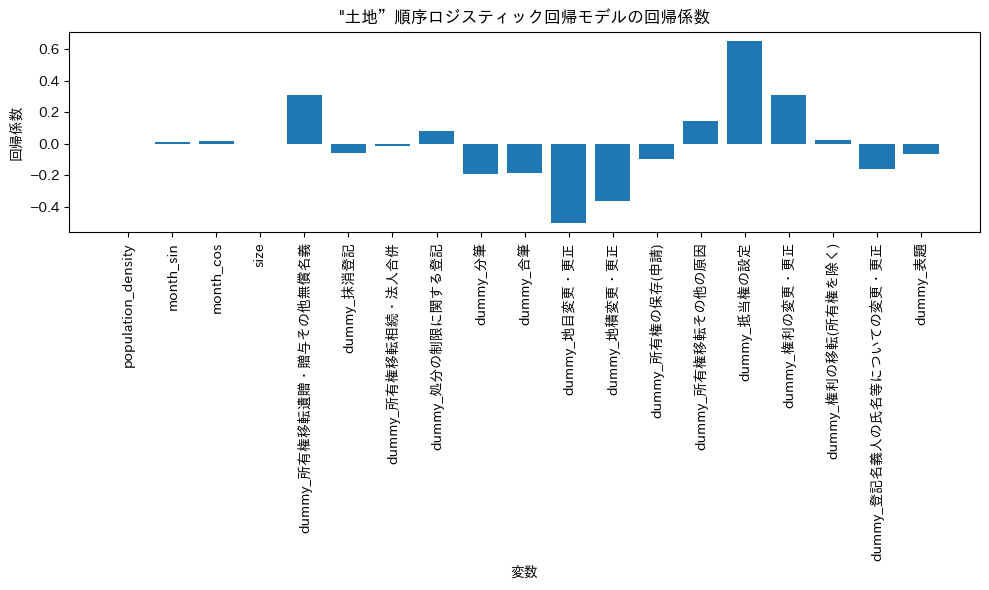

In [58]:
#正規化

from sklearn.utils import resample

# 回帰係数の取得
coef = model.coef_

# 説明変数の名前を取得
features = X_train.columns

# 変数と回帰係数の値を紐づけるためのデータフレーム作成
coef_df = pd.DataFrame({'変数': features, '回帰係数': coef})

# 棒グラフの作成
plt.figure(figsize=(10, 6))  # グラフのサイズを設定
plt.bar(coef_df['変数'], coef_df['回帰係数'])
plt.xticks(rotation=90)  # x軸のラベルを回転させる
plt.xlabel('変数')
plt.ylabel('回帰係数')
plt.title('"土地”順序ロジスティック回帰モデルの回帰係数')
plt.tight_layout()  # レイアウト調整
plt.show()

In [60]:
# 回帰係数の表示
coefficients = model.coef_  # 回帰係数を取得
feature_names = X_train.columns  # 説明変数の名前

# 回帰係数をきれいに表示
for name, coef in zip(feature_names, coefficients):
    print(f"{name}: {coef}")

population_density: -8.428094541089563e-06
month_sin: 0.010865145139408169
month_cos: 0.01967861690683437
size: -3.5761503984436564e-09
dummy_所有権移転遺贈・贈与その他無償名義: 0.3100223297622965
dummy_抹消登記: -0.0599679815922091
dummy_所有権移転相続・法人合併: -0.015694905163076645
dummy_処分の制限に関する登記: 0.08137212175614632
dummy_分筆: -0.18844998860829584
dummy_合筆: -0.1875925218165915
dummy_地目変更・更正: -0.5027318118586268
dummy_地積変更・更正: -0.35949260403080346
dummy_所有権の保存(申請): -0.09296013645301515
dummy_所有権移転その他の原因: 0.14612780379802395
dummy_抵当権の設定: 0.6516260679552782
dummy_権利の変更・更正: 0.31054070628132635
dummy_権利の移転(所有権を除く): 0.02240213671129446
dummy_登記名義人の氏名等についての変更・更正: -0.16139745159204974
dummy_表題: -0.06555358749003672


In [ ]:
# モデルの評価
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# 係数の確認
print("\nModel Coefficients:")
print(model.coef_)

# 閾値の確認
print("\nThresholds:")
print(model.theta_)

In [10]:
#正規化

# モデルの評価
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# 係数の確認
print("\nModel Coefficients:")
print(model.coef_)

# 閾値の確認
print("\nThresholds:")
print(model.theta_)

Accuracy: 0.25843631178707227

Confusion Matrix:
[[1988  780   35   14  436 1296]
 [1373  721   56   16  443 1474]
 [1002  597   56   35  456 1502]
 [ 795  545   52   30  558 1999]
 [ 590  447   24   15  309 2045]
 [ 573  716   71   37  741 3421]]

Classification Report:
              precision    recall  f1-score   support

           1       0.31      0.44      0.37      4549
           2       0.19      0.18      0.18      4083
           3       0.19      0.02      0.03      3648
           4       0.20      0.01      0.01      3979
           5       0.10      0.09      0.10      3430
           6       0.29      0.62      0.40      5559

    accuracy                           0.26     25248
   macro avg       0.22      0.22      0.18     25248
weighted avg       0.23      0.26      0.20     25248


Model Coefficients:
[-8.42809454e-06  1.08651451e-02  1.96786169e-02 -3.57615040e-09
  3.10022330e-01 -5.99679816e-02 -1.56949052e-02  8.13721218e-02
 -1.88449989e-01 -1.87592522e-01 -

In [96]:
# 正規化

# AUC評価

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# テストデータの予測確率を取得
y_prob = model.predict_proba(X_test_normalized)  # 各クラスの予測確率

# クラスのバイナリ化 (One-vs-Rest形式に変換)
y_test_binarized = label_binarize(y_test, classes=[1, 2, 3, 4, 5, 6])

# AUCの計算 (マクロ平均: 全クラスのAUCの平均)
auc = roc_auc_score(y_test_binarized, y_prob, average='macro', multi_class='ovr')

print(f"AUC (Macro-Averaged): {auc:.3f}")

AUC (Macro-Averaged): 0.569


In [99]:
# 正規化
# AUC(各クラス)

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# テストデータの予測確率を取得
y_prob = model.predict_proba(X_test_normalized)

# クラスのバイナリ化 (One-vs-Rest形式に変換)
classes = [1, 2, 3, 4, 5, 6]
y_test_binarized = label_binarize(y_test, classes=classes)

# 各クラスのAUCを計算して表示
auc_per_class = {}
for i, class_label in enumerate(classes):
    auc = roc_auc_score(y_test_binarized[:, i], y_prob[:, i])
    auc_per_class[class_label] = auc
    print(f"AUC for class {class_label}: {auc:.3f}")

# 全クラスのAUCの辞書を表示 (必要に応じて)
print("\nAUC per class:", auc_per_class)

AUC for class 1: 0.676
AUC for class 2: 0.522
AUC for class 3: 0.544
AUC for class 4: 0.539
AUC for class 5: 0.484
AUC for class 6: 0.650

AUC per class: {1: 0.6762065619735974, 2: 0.5219240853865101, 3: 0.5444518559129304, 4: 0.5390691168126766, 5: 0.48380802408047274, 6: 0.6500249641047631}


### t-sne

In [19]:
!pip install threadpoolctl==3.1.0

Error processing line 3 of C:\ProgramData\Anaconda3\lib\site-packages\googleapis_common_protos-1.52.0-py3.8-nspkg.pth:

  Traceback (most recent call last):
    File "C:\ProgramData\Anaconda3\lib\site.py", line 169, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
    File "<frozen importlib._bootstrap>", line 553, in module_from_spec
  AttributeError: 'NoneType' object has no attribute 'loader'

Remainder of file ignored


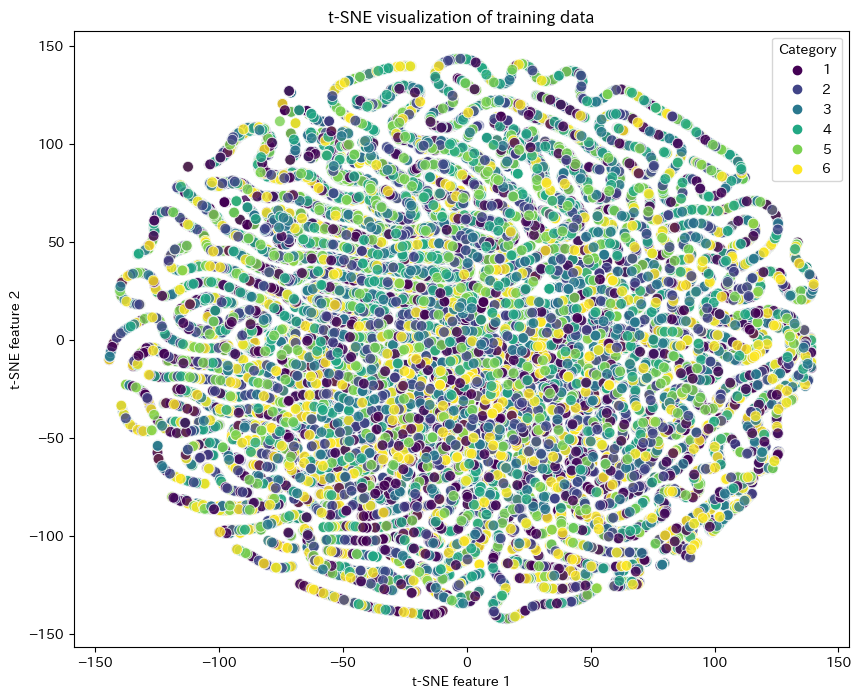

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

# t-SNEの適用
tsne = TSNE(n_components=2, random_state = 0, perplexity = 30, n_iter = 1000)
X_train_tsne = tsne.fit_transform(X_train)
#tsne = TSNE(n_components=2, random_state=42)
#X_train_tsne = tsne.fit_transform(X_train_tmp)

# t-SNEの結果をプロット
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_train_tsne[:, 0], y=X_train_tsne[:, 1], hue=y_train, palette='viridis', s=60, alpha=0.8)
plt.title('t-SNE visualization of training data')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.legend(title='Category', loc='best')
plt.show()

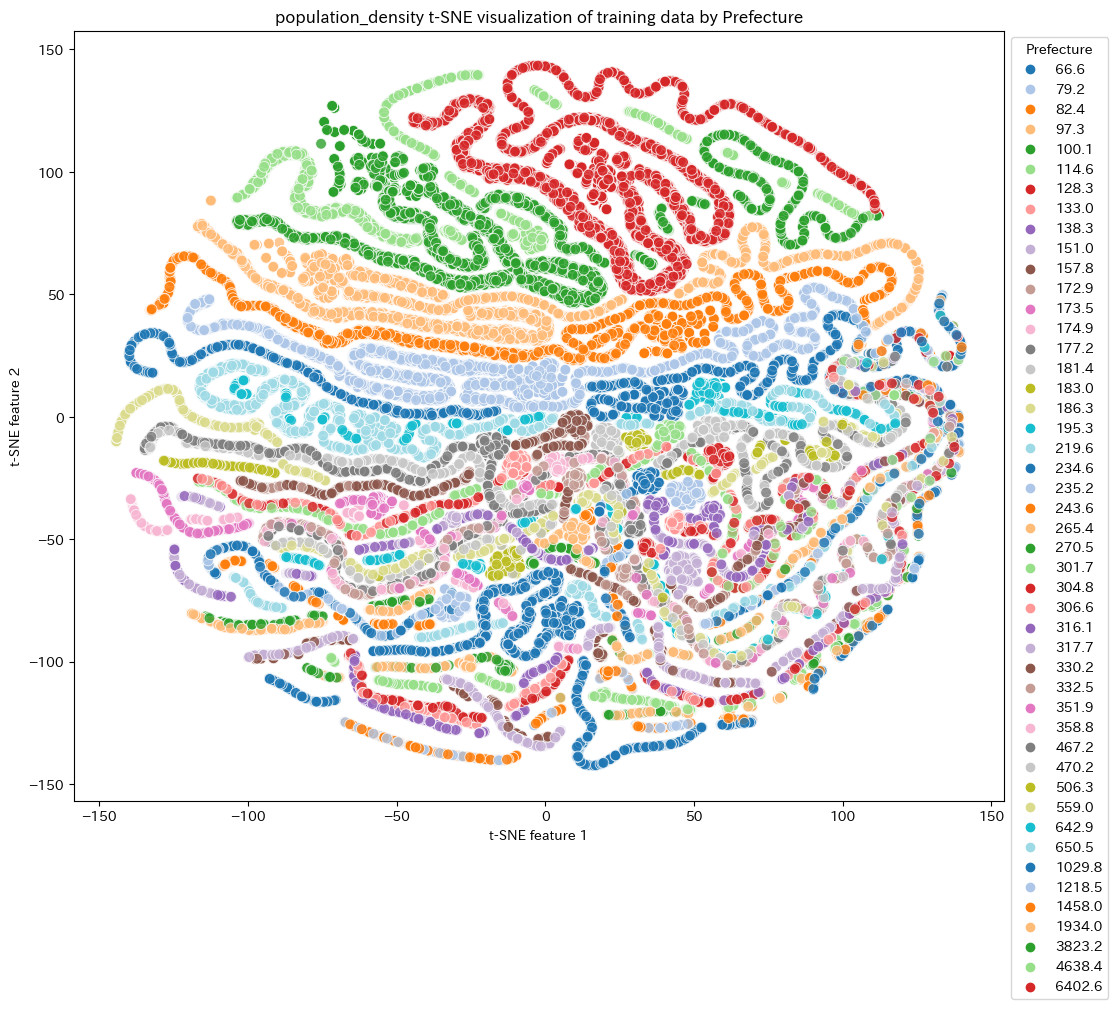

In [27]:
# 都道府県別
prefecture_train = df_train['population_density']

# t-SNEの適用
tsne = TSNE(n_components=2, random_state=0, perplexity=30, n_iter=1000)
X_train_tsne = tsne.fit_transform(X_train)

# t-SNEの結果を都道府県ごとにプロット
plt.figure(figsize=(12, 10))
sns.scatterplot(x=X_train_tsne[:, 0], y=X_train_tsne[:, 1], hue=prefecture_train, palette='tab20', s=60, alpha=0.8)
plt.title('population_density t-SNE visualization of training data by Prefecture')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.legend(title='Prefecture', loc='best', bbox_to_anchor=(1, 1))
plt.show()

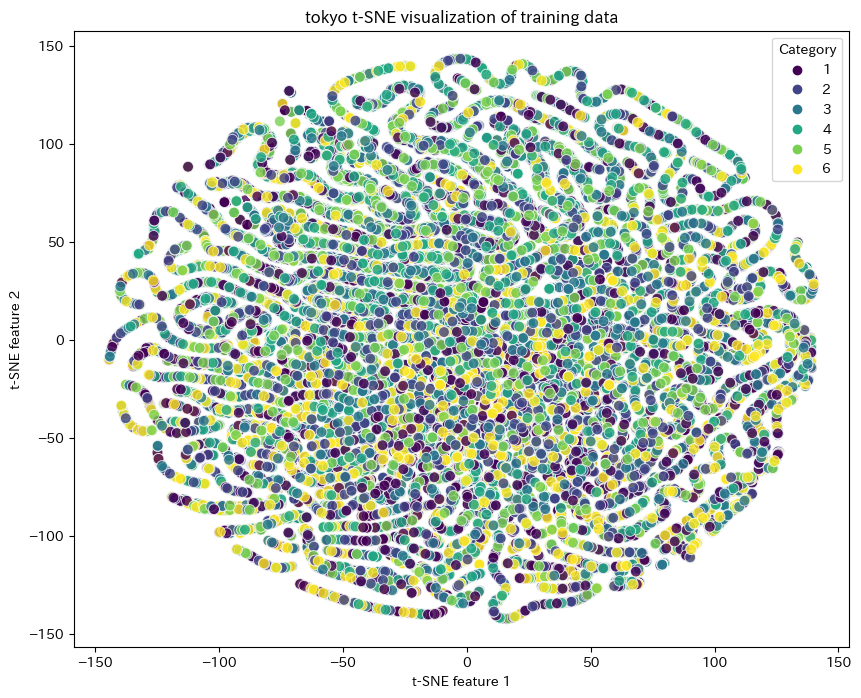

In [26]:
# 東京都のデータをフィルタリングして取得
tokyo_train = df_train[df_train['population_density'] == 6402.6]

# t-SNEの適用
tsne = TSNE(n_components=2, random_state = 0, perplexity = 30, n_iter = 1000)
X_train_tsne = tsne.fit_transform(X_train)
#tsne = TSNE(n_components=2, random_state=42)
#X_train_tsne = tsne.fit_transform(X_train_tmp)

# t-SNEの結果をプロット
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_train_tsne[:, 0], y=X_train_tsne[:, 1], hue=y_train, palette='viridis', s=60, alpha=0.8)
plt.title('tokyo t-SNE visualization of training data')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.legend(title='Category', loc='best')
plt.show()

In [ ]:
#要らない
#マイナスの値をプラスに変換する
X_train_tmp['month_sin'] = X_train_tmp['month_sin']+1
X_train_tmp['month_cos'] = X_train_tmp['month_cos']+1

In [ ]:
# 重みがかかっているかの確認
undersampled_df['sales1_category'].value_counts()

In [ ]:
import matplotlib.pyplot as plt

# 30日間隔でビンを作成
bins = list(range(0, 361, 30))

# ヒストグラムをプロット
plt.hist(df_1v2_reason95_orderlog0_livedum_all_land['sales1_period'], bins=bins, edgecolor='black')
# プロットの設定
plt.xlabel('sales1_period')
plt.ylabel('Frequency')
plt.title('sales1_period for 土地')
plt.savefig(f'sales1_period_land.png')  # 保存先のファイル名と拡張子を指定

# プロットを表示
plt.show()

#### 60日以内なし

In [ ]:
# ライブラリインストール
# !pip install scikit-learn
# !pip install mord
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import mord
from sklearn.utils import resample

# 目的変数の作成
# sales1_periodを30、90、180、360のカテゴリに変換
def categorize_period(days):
    if days <= 30:
        return 1
    elif days <= 90:
        return 2
    elif days <= 180:
        return 3
    elif days <= 360:
        return 4
    else:
        return 5

df_1v2_reason95_orderlog0_livedum_all_land['sales1_category'] = df_1v2_reason95_orderlog0_livedum_all_land['sales1_period'].apply(categorize_period)

# 各クラスの数を計算
class_counts = df_1v2_reason95_orderlog0_livedum_all_land['sales1_category'].value_counts()

# 最小クラスの数を取得
min_class_count = class_counts.min()

# アンダーサンプリング
undersampled_df = pd.DataFrame()
for category in range(1, 6):
    class_data = df_1v2_reason95_orderlog0_livedum_all_land[df_1v2_reason95_orderlog0_livedum_all_land['sales1_category'] == category]
    undersampled_class_data = resample(class_data, 
                                     replace=False, 
                                     n_samples=min_class_count, 
                                     random_state=42)
    undersampled_df = pd.concat([undersampled_df, undersampled_class_data])

df_train, df_test = train_test_split(undersampled_df, test_size=0.2, random_state=0)

# 訓練データとテストデータの共通インデックスを取得
df_test = df_test[~df_test["land_id"].isin(df_train["land_id"])]


# 説明変数と目的変数を定義
y_train = df_train['sales1_category']
X_train = df_train[['population_density', 'month_sin', 'month_cos', 'size',   
                    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                    'dummy_処分の制限に関する登記', 'dummy_分筆', 'dummy_合筆', 'dummy_地目変更・更正', 
                    'dummy_地積変更・更正', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
                    'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)',
                    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]
y_test = df_test['sales1_category']
X_test = df_test[['population_density', 'month_sin', 'month_cos', 'size',  
                  'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                  'dummy_処分の制限に関する登記', 'dummy_分筆',  'dummy_合筆', 'dummy_地目変更・更正',
                  'dummy_地積変更・更正', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定',
                  'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 
                  'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]

# モデルの構築と学習
model = mord.LogisticIT()
model.fit(X_train, y_train)

# モデルの予測と誤差計算
y_pred = model.predict(X_test)

In [ ]:
from sklearn.utils import resample

# 回帰係数の取得
coef = model.coef_

# 説明変数の名前を取得
features = X_train.columns

# 変数と回帰係数の値を紐づけるためのデータフレーム作成
coef_df = pd.DataFrame({'変数': features, '回帰係数': coef})

# 棒グラフの作成
plt.figure(figsize=(10, 6))  # グラフのサイズを設定
plt.bar(coef_df['変数'], coef_df['回帰係数'])
plt.xticks(rotation=90)  # x軸のラベルを回転させる
plt.xlabel('変数')
plt.ylabel('回帰係数')
plt.title('"土地”順序ロジスティック回帰モデルの回帰係数')
plt.tight_layout()  # レイアウト調整
plt.show()

In [ ]:
# モデルの評価
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# 係数の確認
print("\nModel Coefficients:")
print(model.coef_)

# 閾値の確認
print("\nThresholds:")
print(model.theta_)

In [ ]:
# 重みがかかっているかの確認
undersampled_df['sales1_category'].value_counts()

### 建物のみ  
size, dummy_地目変更・更正, dummy_地積変更・更正, dummy_分筆, dummy_合筆 は土地のみにつく登記のため消去　　
dummy_区分建物の表題は区分建物のみにつく登記のため消去

In [ ]:
# 目的変数の作成
# sales1_periodを30、90、180、360のカテゴリに変換
def categorize_period(days):
    if days <= 30:
        return 1
    elif days <= 60:
        return 2
    elif days <= 90:
        return 3
    elif days <= 180:
        return 4
    elif days <= 360:
        return 5
    else:
        return 6

df_1v2_reason95_orderlog0_livedum_all_build['sales1_category'] = df_1v2_reason95_orderlog0_livedum_all_build['sales1_period'].apply(categorize_period)

# 各クラスの数を計算
class_counts = df_1v2_reason95_orderlog0_livedum_all_build['sales1_category'].value_counts()

# 最小クラスの数を取得
min_class_count = class_counts.min()

# アンダーサンプリング
undersampled_df = pd.DataFrame()
for category in range(1, 7):
    class_data = df_1v2_reason95_orderlog0_livedum_all_build[df_1v2_reason95_orderlog0_livedum_all_build['sales1_category'] == category]
    undersampled_class_data = resample(class_data, 
                                     replace=False, 
                                     n_samples=min_class_count, 
                                     random_state=42)
    undersampled_df = pd.concat([undersampled_df, undersampled_class_data])

df_train, df_test = train_test_split(undersampled_df, test_size=0.2, random_state=0)

# 訓練データとテストデータの共通インデックスを取得
df_test = df_test[~df_test["land_id"].isin(df_train["land_id"])]

# 説明変数と目的変数を定義
y_train = df_train['sales1_category']
X_train = df_train[['population_density', 'month_sin', 'month_cos',   
                    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                    'dummy_処分の制限に関する登記',  
                    'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
                    'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]
y_test = df_test['sales1_category']
X_test = df_test[['population_density', 'month_sin', 'month_cos',  
                  'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                  'dummy_処分の制限に関する登記',
                  'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定',
                  'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                  'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]

# モデルの構築と学習
model = mord.LogisticIT()
model.fit(X_train, y_train)

# モデルの予測と誤差計算
y_pred = model.predict(X_test)

In [100]:
#正規化

def categorize_period(days):
    if days <= 30:
        return 1
    elif days <= 60:
        return 2
    elif days <= 90:
        return 3
    elif days <= 180:
        return 4
    elif days <= 360:
        return 5
    else:
        return 6

df_1v2_reason95_orderlog0_livedum_all_build['sales1_category'] = df_1v2_reason95_orderlog0_livedum_all_build['sales1_period'].apply(categorize_period)

# 各クラスの数を計算
class_counts = df_1v2_reason95_orderlog0_livedum_all_build['sales1_category'].value_counts()

# 最小クラスの数を取得
min_class_count = class_counts.min()

# アンダーサンプリング
undersampled_df = pd.DataFrame()
for category in range(1, 7):
    class_data = df_1v2_reason95_orderlog0_livedum_all_build[df_1v2_reason95_orderlog0_livedum_all_build['sales1_category'] == category]
    undersampled_class_data = resample(class_data, 
                                     replace=False, 
                                     n_samples=min_class_count, 
                                     random_state=42)
    undersampled_df = pd.concat([undersampled_df, undersampled_class_data])

df_train, df_test = train_test_split(undersampled_df, test_size=0.2, random_state=0)

# 訓練データとテストデータの共通インデックスを取得
df_test = df_test[~df_test["land_id"].isin(df_train["land_id"])]

# 説明変数と目的変数を定義
y_train = df_train['sales1_category']
X_train = df_train[['population_density', 'month_sin', 'month_cos',   
                    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                    'dummy_処分の制限に関する登記',  
                    'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
                    'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]
y_test = df_test['sales1_category']
X_test = df_test[['population_density', 'month_sin', 'month_cos',  
                  'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                  'dummy_処分の制限に関する登記',
                  'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定',
                  'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                  'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]

#各説明変数を正規化
scaler = MinMaxScaler()

#訓練データを正規化
X_train_normalized = scaler.fit_transform(X_train)

#テストデータを正規化
X_test_normalized = scaler.transform(X_test)

# モデルの構築と学習
model = mord.LogisticIT()
model.fit(X_train, y_train)

# モデルの予測と誤差計算
y_pred = model.predict(X_test)

### 5-fold cross validation

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import mord
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import KFold

# 目的変数の作成
# sales1_periodを30、90、180、360のカテゴリに変換
def categorize_period(days):
    if days <= 30:
        return 1
    elif days <= 60:
        return 2
    elif days <= 90:
        return 3
    elif days <= 180:
        return 4
    elif days <= 360:
        return 5
    else:
        return 6

df_1v2_reason95_orderlog0_livedum_all_build['sales1_category'] = df_1v2_reason95_orderlog0_livedum_all_build['sales1_period'].apply(categorize_period)

# 各クラスの数を計算
class_counts = df_1v2_reason95_orderlog0_livedum_all_build['sales1_category'].value_counts()

# 最小クラスの数を取得
min_class_count = class_counts.min()

# アンダーサンプリング
undersampled_df = pd.DataFrame()
for category in range(1, 7):
    class_data = df_1v2_reason95_orderlog0_livedum_all_build[df_1v2_reason95_orderlog0_livedum_all_build['sales1_category'] == category]
    undersampled_class_data = resample(class_data, 
                                     replace=False, 
                                     n_samples=min_class_count, 
                                     random_state=42)
    undersampled_df = pd.concat([undersampled_df, undersampled_class_data])

# 説明変数と目的変数を定義
y = undersampled_df['sales1_category']
X = undersampled_df[['population_density', 'month_sin', 'month_cos', 'size',   
                    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                    'dummy_処分の制限に関する登記', 'dummy_分筆', 'dummy_区分建物の表題', 'dummy_合筆', 'dummy_地目変更・更正', 
                    'dummy_地積変更・更正', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
                    'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題',
                    'dummy_土地', 'dummy_建物', 'dummy_区分建物']]
   
# One-Hotエンコード
classes = [1, 2, 3, 4, 5, 6]
y_onehot = label_binarize(y, classes=classes)
 
# Cross-validationの準備
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 各FoldでのクラスごとのAUCスコアを保存
class_auc_scores = {cls: [] for cls in range(1, 7)}  # クラス1~6

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    y_test_onehot = y_onehot[test_index]
    
    #各説明変数を正規化
    scaler = MinMaxScaler()

    # データの正規化
    X_train_normalized = scaler.fit_transform(X_train)
    X_test_normalized = scaler.transform(X_test)

    # モデルの学習
    model = mord.LogisticIT()
    model.fit(X_train_normalized, y_train)

    # 予測確率の取得
    y_pred_proba = model.predict_proba(X_test_normalized)

    # クラスのバイナリ化 (One-vs-Rest形式に変換)
    classes = [1, 2, 3, 4, 5, 6]
    y_test_binarized = label_binarize(y_test, classes=classes)

    # 各クラスのAUCを計算して表示
    auc_per_class = {}
    for i, class_label in enumerate(classes):
        auc = roc_auc_score(y_test_binarized[:, i], y_pred_proba[:, i])
        auc_per_class[class_label] = auc
        print(f"AUC for class {class_label}: {auc:.3f}")

AUC for class 1: 0.829
AUC for class 2: 0.549
AUC for class 3: 0.579
AUC for class 4: 0.600
AUC for class 5: 0.649
AUC for class 6: 0.647
AUC for class 1: 0.813
AUC for class 2: 0.541
AUC for class 3: 0.570
AUC for class 4: 0.621
AUC for class 5: 0.650
AUC for class 6: 0.655
AUC for class 1: 0.822
AUC for class 2: 0.546
AUC for class 3: 0.572
AUC for class 4: 0.500
AUC for class 5: 0.655
AUC for class 6: 0.646
AUC for class 1: 0.820
AUC for class 2: 0.538
AUC for class 3: 0.595
AUC for class 4: 0.621
AUC for class 5: 0.639
AUC for class 6: 0.677
AUC for class 1: 0.829
AUC for class 2: 0.542
AUC for class 3: 0.594
AUC for class 4: 0.601
AUC for class 5: 0.648
AUC for class 6: 0.660


In [12]:
# 元の出力をリスト形式で保存
auc_results = """
AUC for class 1: 0.829
AUC for class 2: 0.549
AUC for class 3: 0.579
AUC for class 4: 0.600
AUC for class 5: 0.649
AUC for class 6: 0.647
AUC for class 1: 0.813
AUC for class 2: 0.541
AUC for class 3: 0.570
AUC for class 4: 0.621
AUC for class 5: 0.650
AUC for class 6: 0.655
AUC for class 1: 0.822
AUC for class 2: 0.546
AUC for class 3: 0.572
AUC for class 4: 0.500
AUC for class 5: 0.655
AUC for class 6: 0.646
AUC for class 1: 0.820
AUC for class 2: 0.538
AUC for class 3: 0.595
AUC for class 4: 0.621
AUC for class 5: 0.639
AUC for class 6: 0.677
AUC for class 1: 0.829
AUC for class 2: 0.542
AUC for class 3: 0.594
AUC for class 4: 0.601
AUC for class 5: 0.648
AUC for class 6: 0.660
"""

# 行ごとに分割
lines = auc_results.strip().split("\n")

# データを辞書形式に整形
auc_values = {i: [] for i in range(1, 7)}  # クラス1～6の辞書を初期化
for line in lines:
    parts = line.split(": ")
    class_label = int(parts[0].split()[-1])  # クラス番号を取得
    auc_value = float(parts[1])  # AUC値を取得
    auc_values[class_label].append(auc_value)

# 辞書を表示
print(auc_values)

{1: [0.829, 0.813, 0.822, 0.82, 0.829], 2: [0.549, 0.541, 0.546, 0.538, 0.542], 3: [0.579, 0.57, 0.572, 0.595, 0.594], 4: [0.6, 0.621, 0.5, 0.621, 0.601], 5: [0.649, 0.65, 0.655, 0.639, 0.648], 6: [0.647, 0.655, 0.646, 0.677, 0.66]}


In [13]:
# Data
auc_values = {
    1: [0.829, 0.813, 0.822, 0.820, 0.829],
    2: [0.549, 0.541, 0.546, 0.538, 0.542],
    3: [0.579, 0.570, 0.572, 0.595, 0.594],
    4: [0.600, 0.621, 0.500, 0.621, 0.601],
    5: [0.649, 0.650, 0.655, 0.639, 0.648],
    6: [0.647, 0.655, 0.646, 0.677, 0.660]
}

# Degrees of freedom
n = len(auc_values[1])
df = n - 1

# Confidence level
confidence = 0.95
t_value = t.ppf((1 + confidence) / 2, df)

# Calculate statistics for each class
results = {}
for class_id, values in auc_values.items():
    mean = np.mean(values)
    std_dev = np.std(values, ddof=1)
    margin_of_error = t_value * (std_dev / np.sqrt(n))
    ci_lower = mean - margin_of_error
    ci_upper = mean + margin_of_error
    results[class_id] = {
        "mean": mean,
        "std_dev": std_dev,
        "ci_lower": ci_lower,
        "ci_upper": ci_upper
    }

results

{1: {'mean': 0.8225999999999999,
  'std_dev': 0.0067305274681855425,
  'ci_lower': 0.8142429463538323,
  'ci_upper': 0.8309570536461675},
 2: {'mean': 0.5432,
  'std_dev': 0.004324349662087934,
  'ci_lower': 0.5378306107089408,
  'ci_upper': 0.5485693892910593},
 3: {'mean': 0.582,
  'std_dev': 0.011895377253370329,
  'ci_lower': 0.567229938319438,
  'ci_upper': 0.5967700616805619},
 4: {'mean': 0.5886,
  'std_dev': 0.0505796401727019,
  'ci_lower': 0.5257970817554551,
  'ci_upper': 0.6514029182445449},
 5: {'mean': 0.6482,
  'std_dev': 0.0058051701094800024,
  'ci_lower': 0.6409919292716101,
  'ci_upper': 0.6554080707283899},
 6: {'mean': 0.657,
  'std_dev': 0.012589678312014182,
  'ci_lower': 0.6413678496910052,
  'ci_upper': 0.6726321503089948}}

In [ ]:
from sklearn.utils import resample

# 回帰係数の取得
coef = model.coef_

# 説明変数の名前を取得
features = X_train.columns

# 変数と回帰係数の値を紐づけるためのデータフレーム作成
coef_df = pd.DataFrame({'変数': features, '回帰係数': coef})

# 棒グラフの作成
plt.figure(figsize=(10, 6))  # グラフのサイズを設定
plt.bar(coef_df['変数'], coef_df['回帰係数'])
plt.xticks(rotation=90)  # x軸のラベルを回転させる
plt.xlabel('変数')
plt.ylabel('回帰係数')
plt.title('"建物”順序ロジスティック回帰モデルの回帰係数')
plt.tight_layout()  # レイアウト調整
plt.show()

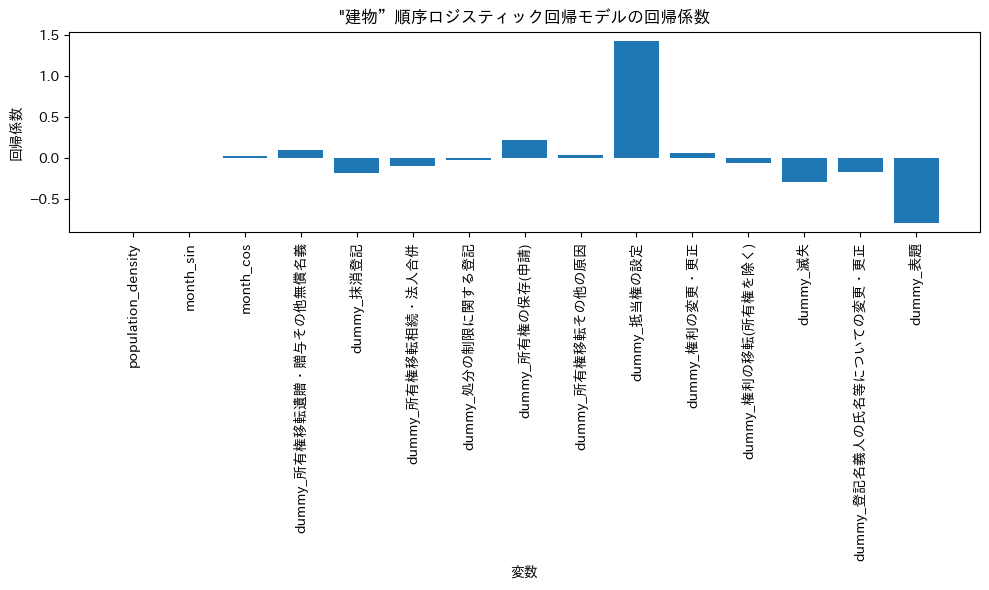

In [62]:
#正規化

from sklearn.utils import resample

# 回帰係数の取得
coef = model.coef_

# 説明変数の名前を取得
features = X_train.columns

# 変数と回帰係数の値を紐づけるためのデータフレーム作成
coef_df = pd.DataFrame({'変数': features, '回帰係数': coef})

# 棒グラフの作成
plt.figure(figsize=(10, 6))  # グラフのサイズを設定
plt.bar(coef_df['変数'], coef_df['回帰係数'])
plt.xticks(rotation=90)  # x軸のラベルを回転させる
plt.xlabel('変数')
plt.ylabel('回帰係数')
plt.title('"建物”順序ロジスティック回帰モデルの回帰係数')
plt.tight_layout()  # レイアウト調整
plt.show()

In [63]:
# 回帰係数の表示
coefficients = model.coef_  # 回帰係数を取得
feature_names = X_train.columns  # 説明変数の名前

# 回帰係数をきれいに表示
for name, coef in zip(feature_names, coefficients):
    print(f"{name}: {coef}")

population_density: -1.0587771091716614e-05
month_sin: 0.0017540939345102133
month_cos: 0.022804571241445564
dummy_所有権移転遺贈・贈与その他無償名義: 0.10462686583570367
dummy_抹消登記: -0.1742701171941029
dummy_所有権移転相続・法人合併: -0.09206699753684557
dummy_処分の制限に関する登記: -0.02086906032573068
dummy_所有権の保存(申請): 0.21671172993467716
dummy_所有権移転その他の原因: 0.038744640760614235
dummy_抵当権の設定: 1.4275597498772796
dummy_権利の変更・更正: 0.06299664958903317
dummy_権利の移転(所有権を除く): -0.05984544839845512
dummy_滅失: -0.29315139087881
dummy_登記名義人の氏名等についての変更・更正: -0.16816600891557315
dummy_表題: -0.7890167274903555


In [ ]:
# モデルの評価
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# 係数の確認
print("\nModel Coefficients:")
print(model.coef_)

# 閾値の確認
print("\nThresholds:")
print(model.theta_)

In [13]:
#正規化
# モデルの評価
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# 係数の確認
print("\nModel Coefficients:")
print(model.coef_)

# 閾値の確認
print("\nThresholds:")
print(model.theta_)

Accuracy: 0.3380789331411065

Confusion Matrix:
[[837  11 133  23   6  34]
 [367  46 306  41  32 158]
 [161  63 324  43  52 217]
 [ 92  56 313  60  48 265]
 [ 48  74 324  85  35 252]
 [273  16 109  35  36 574]]

Classification Report:
              precision    recall  f1-score   support

           1       0.47      0.80      0.59      1044
           2       0.17      0.05      0.08       950
           3       0.21      0.38      0.27       860
           4       0.21      0.07      0.11       834
           5       0.17      0.04      0.07       818
           6       0.38      0.55      0.45      1043

    accuracy                           0.34      5549
   macro avg       0.27      0.32      0.26      5549
weighted avg       0.28      0.34      0.28      5549


Model Coefficients:
[-1.05877711e-05  1.75409393e-03  2.28045712e-02  1.04626866e-01
 -1.74270117e-01 -9.20669975e-02 -2.08690603e-02  2.16711730e-01
  3.87446408e-02  1.42755975e+00  6.29966496e-02 -5.98454484e-02
 -2.93

In [101]:
# 正規化
# AUC(各クラス)

# テストデータの予測確率を取得
y_prob = model.predict_proba(X_test_normalized)

# クラスのバイナリ化 (One-vs-Rest形式に変換)
classes = [1, 2, 3, 4, 5, 6]
y_test_binarized = label_binarize(y_test, classes=classes)

# 各クラスのAUCを計算して表示
auc_per_class = {}
for i, class_label in enumerate(classes):
    auc = roc_auc_score(y_test_binarized[:, i], y_prob[:, i])
    auc_per_class[class_label] = auc
    print(f"AUC for class {class_label}: {auc:.3f}")

# 全クラスのAUCの辞書を表示 (必要に応じて)
print("\nAUC per class:", auc_per_class)

AUC for class 1: 0.823
AUC for class 2: 0.568
AUC for class 3: 0.621
AUC for class 4: 0.644
AUC for class 5: 0.721
AUC for class 6: 0.685

AUC per class: {1: 0.8228465817035988, 2: 0.5682850963023999, 3: 0.6209958239719879, 4: 0.6443088159377058, 5: 0.7214155812543702, 6: 0.6853782684129694}


In [ ]:
import matplotlib.pyplot as plt

# 30日間隔でビンを作成
bins = list(range(0, 361, 30))

# ヒストグラムをプロット
plt.hist(df_1v2_reason95_orderlog0_livedum_all_build['sales1_period'], bins=bins, edgecolor='black')
# プロットの設定
plt.xlabel('sales1_period')
plt.ylabel('Frequency')
plt.title('sales1_period for 建物')
plt.savefig(f'sales1_period_build.png')  # 保存先のファイル名と拡張子を指定

# プロットを表示
plt.show()

In [3]:
df_1v2_reason95_orderlog0_livedum_all_build['month_cos'].unique()

array([ 5.00000000e-01,  8.66025404e-01,  1.00000000e+00,  6.12323400e-17,
        8.66025404e-01, -5.00000000e-01, -8.66025404e-01, -1.83697020e-16,
       -1.00000000e+00, -5.00000000e-01, -8.66025404e-01])

In [4]:
df_1v2_reason95_orderlog0_livedum_all_build['month_sin'].unique()

array([ 8.66025404e-01, -5.00000000e-01, -8.66025404e-01, -2.44929360e-16,
        1.00000000e+00,  5.00000000e-01,  8.66025404e-01, -1.00000000e+00,
        1.22464680e-16, -8.66025404e-01, -5.00000000e-01])

### 区分建物のみ　　
size, dummy_地目変更・更正, dummy_地積変更・更正, dummy_分筆, dummy_合筆 は土地のみにつく登記のため消去

In [ ]:
# 目的変数の作成
# sales1_periodを30、90、180、360のカテゴリに変換
def categorize_period(days):
    if days <= 30:
        return 1
    elif days <= 60:
        return 2
    elif days <= 90:
        return 3
    elif days <= 180:
        return 4
    elif days <= 360:
        return 5
    else:
        return 6

df_1v2_reason95_orderlog0_livedum_all_subuild['sales1_category'] = df_1v2_reason95_orderlog0_livedum_all_subuild['sales1_period'].apply(categorize_period)

# 各クラスの数を計算
class_counts = df_1v2_reason95_orderlog0_livedum_all_subuild['sales1_category'].value_counts()

# 最小クラスの数を取得
min_class_count = class_counts.min()

# アンダーサンプリング
undersampled_df = pd.DataFrame()
for category in range(1, 7):
    class_data = df_1v2_reason95_orderlog0_livedum_all_subuild[df_1v2_reason95_orderlog0_livedum_all_subuild['sales1_category'] == category]
    undersampled_class_data = resample(class_data, 
                                     replace=False, 
                                     n_samples=min_class_count, 
                                     random_state=42)
    undersampled_df = pd.concat([undersampled_df, undersampled_class_data])

df_train, df_test = train_test_split(undersampled_df, test_size=0.2, random_state=0)

# 訓練データとテストデータの共通インデックスを取得
df_test = df_test[~df_test["land_id"].isin(df_train["land_id"])]

# 説明変数と目的変数を定義
y_train = df_train['sales1_category']
X_train = df_train[['population_density', 'month_sin', 'month_cos',  
                    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                    'dummy_処分の制限に関する登記', 'dummy_区分建物の表題', 
                    'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
                    'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]
y_test = df_test['sales1_category']
X_test = df_test[['population_density', 'month_sin', 'month_cos', 
                  'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                  'dummy_処分の制限に関する登記', 'dummy_区分建物の表題', 
                  'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
                  'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                  'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]

# モデルの構築と学習
model = mord.LogisticIT()
model.fit(X_train, y_train)

# モデルの予測と誤差計算
y_pred = model.predict(X_test)

In [102]:
#正規化
def categorize_period(days):
    if days <= 30:
        return 1
    elif days <= 60:
        return 2
    elif days <= 90:
        return 3
    elif days <= 180:
        return 4
    elif days <= 360:
        return 5
    else:
        return 6

df_1v2_reason95_orderlog0_livedum_all_subuild['sales1_category'] = df_1v2_reason95_orderlog0_livedum_all_subuild['sales1_period'].apply(categorize_period)

# 各クラスの数を計算
class_counts = df_1v2_reason95_orderlog0_livedum_all_subuild['sales1_category'].value_counts()

# 最小クラスの数を取得
min_class_count = class_counts.min()

# アンダーサンプリング
undersampled_df = pd.DataFrame()
for category in range(1, 7):
    class_data = df_1v2_reason95_orderlog0_livedum_all_subuild[df_1v2_reason95_orderlog0_livedum_all_subuild['sales1_category'] == category]
    undersampled_class_data = resample(class_data, 
                                     replace=False, 
                                     n_samples=min_class_count, 
                                     random_state=42)
    undersampled_df = pd.concat([undersampled_df, undersampled_class_data])

df_train, df_test = train_test_split(undersampled_df, test_size=0.2, random_state=0)

# 訓練データとテストデータの共通インデックスを取得
df_test = df_test[~df_test["land_id"].isin(df_train["land_id"])]

# 説明変数と目的変数を定義
y_train = df_train['sales1_category']
X_train = df_train[['population_density', 'month_sin', 'month_cos',  
                    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                    'dummy_処分の制限に関する登記', 'dummy_区分建物の表題', 
                    'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
                    'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]
y_test = df_test['sales1_category']
X_test = df_test[['population_density', 'month_sin', 'month_cos', 
                  'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                  'dummy_処分の制限に関する登記', 'dummy_区分建物の表題', 
                  'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
                  'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                  'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]

#各説明変数を正規化
scaler = MinMaxScaler()

#訓練データを正規化
X_train_normalized = scaler.fit_transform(X_train)

#テストデータを正規化
X_test_normalized = scaler.transform(X_test)

# モデルの構築と学習
model = mord.LogisticIT()
model.fit(X_train, y_train)

# モデルの予測と誤差計算
y_pred = model.predict(X_test)

### 5-fold cross validation

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import mord
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import KFold

# 目的変数の作成
# sales1_periodを30、90、180、360のカテゴリに変換
def categorize_period(days):
    if days <= 30:
        return 1
    elif days <= 60:
        return 2
    elif days <= 90:
        return 3
    elif days <= 180:
        return 4
    elif days <= 360:
        return 5
    else:
        return 6

df_1v2_reason95_orderlog0_livedum_all_subuild['sales1_category'] = df_1v2_reason95_orderlog0_livedum_all_subuild['sales1_period'].apply(categorize_period)

# 各クラスの数を計算
class_counts = df_1v2_reason95_orderlog0_livedum_all_subuild['sales1_category'].value_counts()

# 最小クラスの数を取得
min_class_count = class_counts.min()

# アンダーサンプリング
undersampled_df = pd.DataFrame()
for category in range(1, 7):
    class_data = df_1v2_reason95_orderlog0_livedum_all_subuild[df_1v2_reason95_orderlog0_livedum_all_subuild['sales1_category'] == category]
    undersampled_class_data = resample(class_data, 
                                     replace=False, 
                                     n_samples=min_class_count, 
                                     random_state=42)
    undersampled_df = pd.concat([undersampled_df, undersampled_class_data])

# 説明変数と目的変数を定義
y = undersampled_df['sales1_category']
X = undersampled_df[['population_density', 'month_sin', 'month_cos', 'size',   
                    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                    'dummy_処分の制限に関する登記', 'dummy_分筆', 'dummy_区分建物の表題', 'dummy_合筆', 'dummy_地目変更・更正', 
                    'dummy_地積変更・更正', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
                    'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題',
                    'dummy_土地', 'dummy_建物', 'dummy_区分建物']]
   
# One-Hotエンコード
classes = [1, 2, 3, 4, 5, 6]
y_onehot = label_binarize(y, classes=classes)
 
# Cross-validationの準備
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 各FoldでのクラスごとのAUCスコアを保存
class_auc_scores = {cls: [] for cls in range(1, 7)}  # クラス1~6

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    y_test_onehot = y_onehot[test_index]
    
    #各説明変数を正規化
    scaler = MinMaxScaler()

    # データの正規化
    X_train_normalized = scaler.fit_transform(X_train)
    X_test_normalized = scaler.transform(X_test)

    # モデルの学習
    model = mord.LogisticIT()
    model.fit(X_train_normalized, y_train)

    # 予測確率の取得
    y_pred_proba = model.predict_proba(X_test_normalized)

    # クラスのバイナリ化 (One-vs-Rest形式に変換)
    classes = [1, 2, 3, 4, 5, 6]
    y_test_binarized = label_binarize(y_test, classes=classes)

    # 各クラスのAUCを計算して表示
    auc_per_class = {}
    for i, class_label in enumerate(classes):
        auc = roc_auc_score(y_test_binarized[:, i], y_pred_proba[:, i])
        auc_per_class[class_label] = auc
        print(f"AUC for class {class_label}: {auc:.3f}")

AUC for class 1: 0.672
AUC for class 2: 0.568
AUC for class 3: 0.543
AUC for class 4: 0.555
AUC for class 5: 0.576
AUC for class 6: 0.672
AUC for class 1: 0.666
AUC for class 2: 0.568
AUC for class 3: 0.565
AUC for class 4: 0.519
AUC for class 5: 0.564
AUC for class 6: 0.682
AUC for class 1: 0.666
AUC for class 2: 0.572
AUC for class 3: 0.574
AUC for class 4: 0.544
AUC for class 5: 0.568
AUC for class 6: 0.654
AUC for class 1: 0.674
AUC for class 2: 0.544
AUC for class 3: 0.562
AUC for class 4: 0.565
AUC for class 5: 0.581
AUC for class 6: 0.695
AUC for class 1: 0.669
AUC for class 2: 0.546
AUC for class 3: 0.542
AUC for class 4: 0.550
AUC for class 5: 0.585
AUC for class 6: 0.695


In [ ]:
from sklearn.utils import resample

# 回帰係数の取得
coef = model.coef_

# 説明変数の名前を取得
features = X_train.columns

# 変数と回帰係数の値を紐づけるためのデータフレーム作成
coef_df = pd.DataFrame({'変数': features, '回帰係数': coef})

# 棒グラフの作成
plt.figure(figsize=(10, 6))  # グラフのサイズを設定
plt.bar(coef_df['変数'], coef_df['回帰係数'])
plt.xticks(rotation=90)  # x軸のラベルを回転させる
plt.xlabel('変数')
plt.ylabel('回帰係数')
plt.title('"区分建物”順序ロジスティック回帰モデルの回帰係数')
plt.tight_layout()  # レイアウト調整
plt.show()

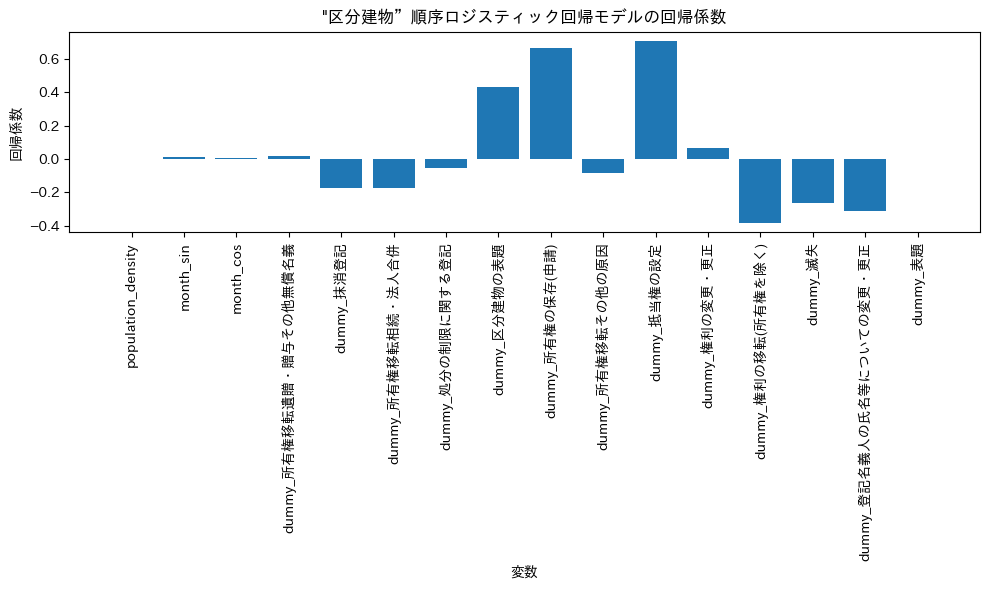

In [65]:
#正規化

from sklearn.utils import resample

# 回帰係数の取得
coef = model.coef_

# 説明変数の名前を取得
features = X_train.columns

# 変数と回帰係数の値を紐づけるためのデータフレーム作成
coef_df = pd.DataFrame({'変数': features, '回帰係数': coef})

# 棒グラフの作成
plt.figure(figsize=(10, 6))  # グラフのサイズを設定
plt.bar(coef_df['変数'], coef_df['回帰係数'])
plt.xticks(rotation=90)  # x軸のラベルを回転させる
plt.xlabel('変数')
plt.ylabel('回帰係数')
plt.title('"区分建物”順序ロジスティック回帰モデルの回帰係数')
plt.tight_layout()  # レイアウト調整
plt.show()

In [66]:
# 回帰係数の表示
coefficients = model.coef_  # 回帰係数を取得
feature_names = X_train.columns  # 説明変数の名前

# 回帰係数をきれいに表示
for name, coef in zip(feature_names, coefficients):
    print(f"{name}: {coef}")

population_density: 1.5891857467375742e-06
month_sin: 0.01403116363392547
month_cos: 0.008191192767268742
dummy_所有権移転遺贈・贈与その他無償名義: 0.020004716165352997
dummy_抹消登記: -0.17551399536383566
dummy_所有権移転相続・法人合併: -0.17276783789781894
dummy_処分の制限に関する登記: -0.05611888343850375
dummy_区分建物の表題: 0.4301551465733566
dummy_所有権の保存(申請): 0.669281568824815
dummy_所有権移転その他の原因: -0.0851052031529525
dummy_抵当権の設定: 0.709337402154153
dummy_権利の変更・更正: 0.06577353979182593
dummy_権利の移転(所有権を除く): -0.3848574561181323
dummy_滅失: -0.2640188857337721
dummy_登記名義人の氏名等についての変更・更正: -0.30856220170822046
dummy_表題: 0.0


In [ ]:
# モデルの評価
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# 係数の確認
print("\nModel Coefficients:")
print(model.coef_)

# 閾値の確認
print("\nThresholds:")
print(model.theta_)

In [16]:
#正規化

# モデルの評価
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# 係数の確認
print("\nModel Coefficients:")
print(model.coef_)

# 閾値の確認
print("\nThresholds:")
print(model.theta_)

Accuracy: 0.2709832134292566

Confusion Matrix:
[[454 262   0  18  16  18]
 [415 302   0  15  25  38]
 [373 304   0  19  30  40]
 [267 330   0  43  52  89]
 [180 343   0  45  53 142]
 [298 244   0  30  55 504]]

Classification Report:
              precision    recall  f1-score   support

           1       0.23      0.59      0.33       768
           2       0.17      0.38      0.23       795
           3       0.00      0.00      0.00       766
           4       0.25      0.06      0.09       781
           5       0.23      0.07      0.11       763
           6       0.61      0.45      0.51      1131

    accuracy                           0.27      5004
   macro avg       0.25      0.26      0.21      5004
weighted avg       0.27      0.27      0.23      5004


Model Coefficients:
[ 1.58918575e-06  1.40311636e-02  8.19119277e-03  2.00047162e-02
 -1.75513995e-01 -1.72767838e-01 -5.61188834e-02  4.30155147e-01
  6.69281569e-01 -8.51052032e-02  7.09337402e-01  6.57735398e-02
 -3.84

C:\Users\GUESTUSER\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GUESTUSER\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GUESTUSER\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [103]:
# 正規化
# AUC(各クラス)

# テストデータの予測確率を取得
y_prob = model.predict_proba(X_test_normalized)

# クラスのバイナリ化 (One-vs-Rest形式に変換)
classes = [1, 2, 3, 4, 5, 6]
y_test_binarized = label_binarize(y_test, classes=classes)

# 各クラスのAUCを計算して表示
auc_per_class = {}
for i, class_label in enumerate(classes):
    auc = roc_auc_score(y_test_binarized[:, i], y_prob[:, i])
    auc_per_class[class_label] = auc
    print(f"AUC for class {class_label}: {auc:.3f}")

# 全クラスのAUCの辞書を表示 (必要に応じて)
print("\nAUC per class:", auc_per_class)

AUC for class 1: 0.676
AUC for class 2: 0.562
AUC for class 3: 0.578
AUC for class 4: 0.580
AUC for class 5: 0.591
AUC for class 6: 0.685

AUC per class: {1: 0.6761745492504722, 2: 0.5616388063314461, 3: 0.5778208660422856, 4: 0.5796993659803957, 5: 0.591200763439222, 6: 0.6845571930910749}


In [ ]:
import matplotlib.pyplot as plt

# 30日間隔でビンを作成
bins = list(range(0, 361, 30))

# ヒストグラムをプロット
plt.hist(df_1v2_reason95_orderlog0_livedum_all_subuild['sales1_period'], bins=bins, edgecolor='black')
# プロットの設定
plt.xlabel('sales1_period')
plt.ylabel('Frequency')
plt.title('sales1_period for 区分建物')
plt.savefig(f'sales1_period_subuild.png')  # 保存先のファイル名と拡張子を指定

# プロットを表示
plt.show()

# ロジスティック回帰

### 土地のみ

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

df_1v2_reason95_orderlog0_livedum_all_land['sales1_category'] = np.where(df_1v2_reason95_orderlog0_livedum_all_land['sales1_period'] <= 30, 1, 0)

df_train, df_test = train_test_split(df_1v2_reason95_orderlog0_livedum_all_land, test_size=0.2, random_state=0)

# 訓練データとテストデータの共通インデックスを取得
df_test = df_test[~df_test["land_id"].isin(df_train["land_id"])]

# 説明変数と目的変数を定義
y_train = df_train['sales1_category']
X_train = df_train[['population_density', 'month_sin', 'month_cos', 'size',   
                    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                    'dummy_処分の制限に関する登記', 'dummy_分筆', 'dummy_合筆', 'dummy_地目変更・更正', 
                    'dummy_地積変更・更正', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
                    'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 
                    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]
y_test = df_test['sales1_category']
X_test = df_test[['population_density', 'month_sin', 'month_cos', 'size',  
                  'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                  'dummy_処分の制限に関する登記', 'dummy_分筆', 'dummy_合筆', 'dummy_地目変更・更正',
                  'dummy_地積変更・更正', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定',
                  'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 
                  'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]

# モデルの構築と学習
model = LogisticRegression(class_weight = 'balanced') # ロジスティック回帰モデルのインスタンスを作成
model.fit(X_train, y_train) # ロジスティック回帰モデルの重みを学習

# モデルの予測と誤差計算
y_pred = model.predict(X_test)

In [104]:
# 正規化

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

df_1v2_reason95_orderlog0_livedum_all_land['sales1_category'] = np.where(df_1v2_reason95_orderlog0_livedum_all_land['sales1_period'] <= 30, 1, 0)

df_train, df_test = train_test_split(df_1v2_reason95_orderlog0_livedum_all_land, test_size=0.2, random_state=0)

# 訓練データとテストデータの共通インデックスを取得
df_test = df_test[~df_test["land_id"].isin(df_train["land_id"])]

# 説明変数と目的変数を定義
y_train = df_train['sales1_category']
X_train = df_train[['population_density', 'month_sin', 'month_cos', 'size',   
                    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                    'dummy_処分の制限に関する登記', 'dummy_分筆', 'dummy_合筆', 'dummy_地目変更・更正', 
                    'dummy_地積変更・更正', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
                    'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 
                    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]
y_test = df_test['sales1_category']
X_test = df_test[['population_density', 'month_sin', 'month_cos', 'size',  
                  'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                  'dummy_処分の制限に関する登記', 'dummy_分筆', 'dummy_合筆', 'dummy_地目変更・更正',
                  'dummy_地積変更・更正', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定',
                  'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 
                  'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]

#各説明変数を正規化
scaler = MinMaxScaler()

#訓練データを正規化
X_train_normalized = scaler.fit_transform(X_train)

#テストデータを正規化
X_test_normalized = scaler.transform(X_test)

# モデルの構築と学習
model = LogisticRegression(class_weight = 'balanced') # ロジスティック回帰モデルのインスタンスを作成
model.fit(X_train, y_train) # ロジスティック回帰モデルの重みを学習

# モデルの予測と誤差計算
y_pred = model.predict(X_test)

In [12]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

# sales1_category をターゲットに定義
df_1v2_reason95_orderlog0_livedum_all_land['sales1_category'] = np.where(df_1v2_reason95_orderlog0_livedum_all_land['sales1_period'] <= 30, 1, 0)

# 説明変数と目的変数の分割
y = df_1v2_reason95_orderlog0_livedum_all_land['sales1_category']
X = df_1v2_reason95_orderlog0_livedum_all_land[[
    'population_density', 'month_sin', 'month_cos', 'size',
    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
    'dummy_処分の制限に関する登記', 'dummy_分筆', 'dummy_合筆', 'dummy_地目変更・更正',
    'dummy_地積変更・更正', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因',
    'dummy_抵当権の設定', 'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)',
    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題'
]]

# 正規化
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# 5-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
auc_scores = []

# 回帰係数を保存するリスト
coefficients = []

for train_index, test_index in kf.split(X_normalized):
    X_train, X_test = X_normalized[train_index], X_normalized[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # モデルの学習
    model = LogisticRegression(class_weight='balanced', random_state=42)
    model.fit(X_train, y_train)
    
    # 予測確率の取得
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Positiveクラスの確率を取得
    
    # 回帰係数を保存
    coefficients.append(model.coef_.flatten())
    
    # AUCの計算
    auc = roc_auc_score(y_test, y_pred_proba)
    auc_scores.append(auc)
    
# 平均の回帰係数を計算
mean_coefficients = np.mean(coefficients, axis=0)

# 説明変数の名前を取得
features = X.columns  # 正規化前の元データフレームの列名を使用

# 結果をデータフレームにまとめる
coef_df = pd.DataFrame({'変数': features, '平均回帰係数': mean_coefficients})

# 平均AUCと標準偏差の出力
print(f"Mean AUC: {np.mean(auc_scores):.3f}")
print(f"AUC Standard Deviation: {np.std(auc_scores):.3f}")

C:\Users\GUESTUSER\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Mean AUC: 0.742
AUC Standard Deviation: 0.003


In [ ]:
from sklearn.utils import resample

# 回帰係数の取得（1次元配列に変換）
coef = model.coef_.flatten()

# 説明変数の名前を取得
features = X_train.columns

# 変数と回帰係数の値を紐づけるためのデータフレーム作成
coef_df = pd.DataFrame({'変数': features, '回帰係数': coef})

# 棒グラフの作成
plt.figure(figsize=(10, 6))  # グラフのサイズを設定
plt.bar(coef_df['変数'], coef_df['回帰係数'])
plt.xticks(rotation=90)  # x軸のラベルを回転させる
plt.xlabel('変数')
plt.ylabel('回帰係数')
plt.title('"土地"ロジスティック回帰モデルの回帰係数_30日以内')
plt.tight_layout()  # レイアウト調整
plt.show()

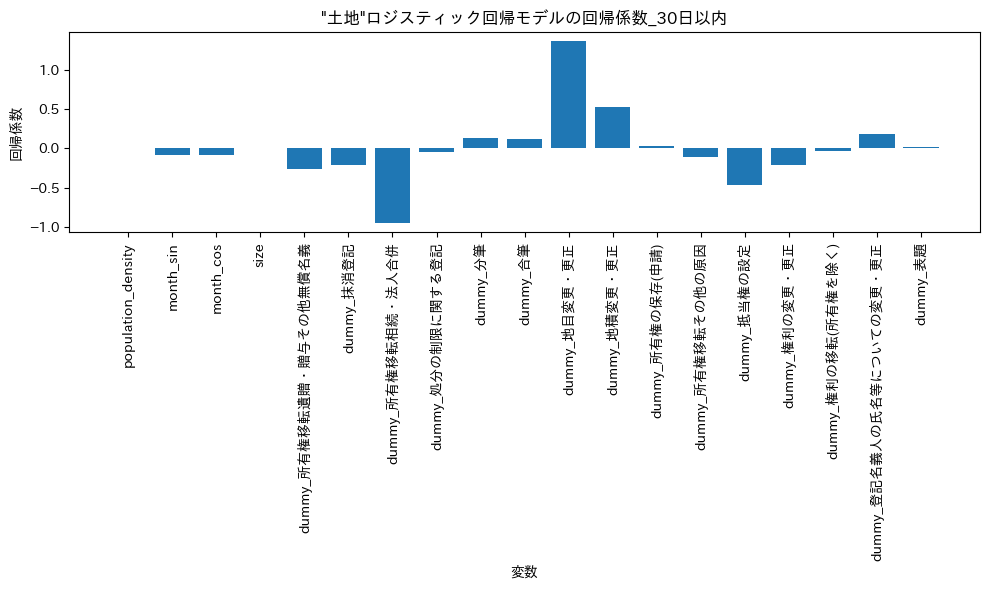

In [52]:
# 正規化

from sklearn.utils import resample

# 回帰係数の取得（1次元配列に変換）
coef = model.coef_.flatten()

# 説明変数の名前を取得
features = X_train.columns

# 変数と回帰係数の値を紐づけるためのデータフレーム作成
coef_df = pd.DataFrame({'変数': features, '回帰係数': coef})

# 棒グラフの作成
plt.figure(figsize=(10, 6))  # グラフのサイズを設定
plt.bar(coef_df['変数'], coef_df['回帰係数'])
plt.xticks(rotation=90)  # x軸のラベルを回転させる
plt.xlabel('変数')
plt.ylabel('回帰係数')
plt.title('"土地"ロジスティック回帰モデルの回帰係数_30日以内')
plt.tight_layout()  # レイアウト調整
plt.show()

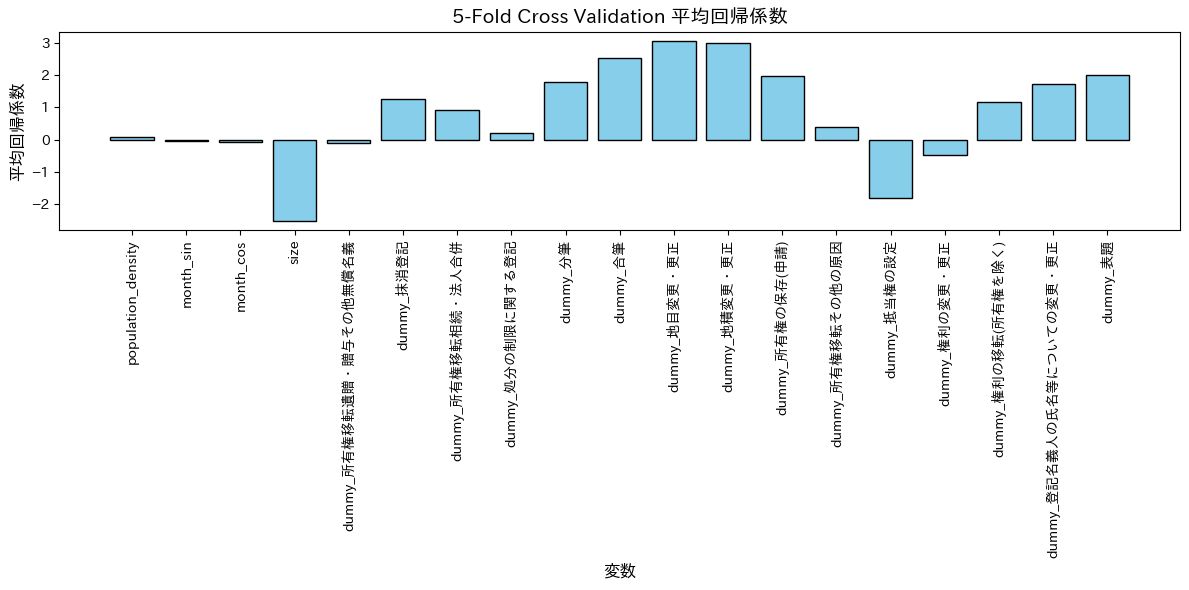

In [13]:
import matplotlib.pyplot as plt

# 平均回帰係数を棒グラフでプロット
plt.figure(figsize=(12, 6))
plt.bar(coef_df['変数'], coef_df['平均回帰係数'], color='skyblue', edgecolor='black')

# 軸ラベルとタイトルの設定
plt.xticks(rotation=90)  # X軸のラベルを90度回転
plt.xlabel('変数', fontsize=12)
plt.ylabel('平均回帰係数', fontsize=12)
plt.title('5-Fold Cross Validation 平均回帰係数', fontsize=14)

# レイアウト調整
plt.tight_layout()

# グラフを表示
plt.show()

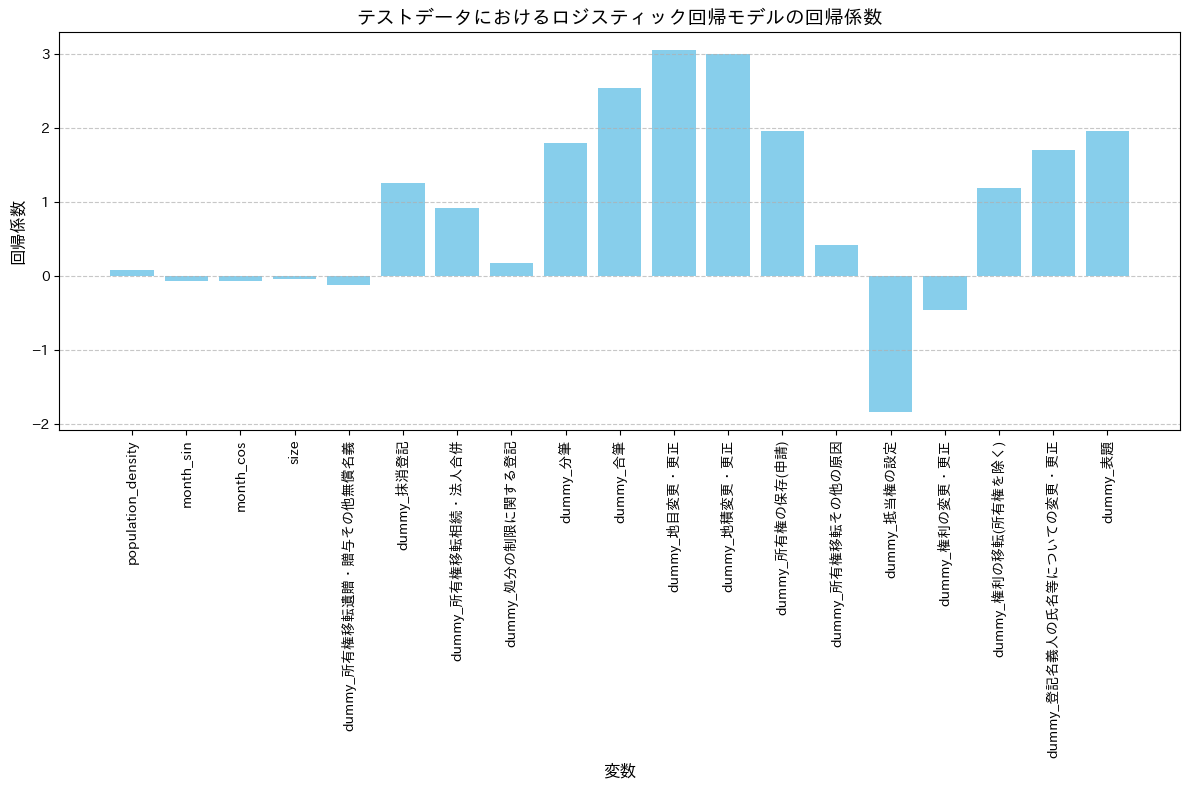

In [10]:
# 正規化前のデータフレームから説明変数名を取得
features = X.columns  # 正規化前の元データフレームの列名を使用

# 回帰係数の取得
coef = model.coef_.flatten()  # LogisticRegression の回帰係数を1次元配列に変換

# 変数と回帰係数の値を紐づけるためのデータフレーム作成
coef_df = pd.DataFrame({'変数': features, '回帰係数': coef})

# 棒グラフの作成
plt.figure(figsize=(12, 8))  # グラフのサイズを設定
plt.bar(coef_df['変数'], coef_df['回帰係数'], color='skyblue')
plt.xticks(rotation=90)  # x軸のラベルを90度回転させる
plt.xlabel('変数', fontsize=12)
plt.ylabel('回帰係数', fontsize=12)
plt.title('テストデータにおけるロジスティック回帰モデルの回帰係数', fontsize=14)
plt.tight_layout()  # レイアウトを調整して見やすくする
plt.grid(axis='y', linestyle='--', alpha=0.7)  # y軸のグリッドを追加
plt.show()

In [53]:
# 定数項を含めたデザインマトリックスを作成
X_train_sm = sm.add_constant(X_train)

# ロジスティック回帰モデルを適合
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()

# 結果を表示
print(result.summary())

# p値を取得
p_values = result.pvalues
print("p-values:\n", p_values)

Optimization terminated successfully.
         Current function value: 0.080975
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:        sales1_category   No. Observations:              2862512
Model:                          Logit   Df Residuals:                  2862492
Method:                           MLE   Df Model:                           19
Date:                Mon, 14 Oct 2024   Pseudo R-squ.:                 0.08972
Time:                        12:51:49   Log-Likelihood:            -2.3179e+05
converged:                       True   LL-Null:                   -2.5464e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -5.5264      0.061    -91.055      0.000      -5

### p値結果(異常)　　
dummy_所有権移転遺贈・贈与その他無償名義

In [ ]:
# モデルの評価
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# 係数の確認
print("\nModel Coefficients:")
print(model.coef_)

In [10]:
# 正規化

# モデルの評価
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# 係数の確認
print("\nModel Coefficients:")
print(model.coef_)

Accuracy: 0.7672026595813398

Confusion Matrix:
[[350694 104924]
 [  3195   5621]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.77      0.87    455618
           1       0.05      0.64      0.09      8816

    accuracy                           0.77    464434
   macro avg       0.52      0.70      0.48    464434
weighted avg       0.97      0.77      0.85    464434


Model Coefficients:
[[ 4.19980330e-05 -8.10396954e-02 -8.88605105e-02 -1.76569561e-06
  -2.68005951e-01 -2.15998135e-01 -9.54069495e-01 -5.12455039e-02
   1.33208312e-01  1.21484839e-01  1.36172450e+00  5.28413666e-01
   3.08756469e-02 -1.11883294e-01 -4.62853000e-01 -2.10249593e-01
  -3.61198881e-02  1.88813234e-01  1.85544463e-02]]


C:\Users\GUESTUSER\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


AUC: 0.735


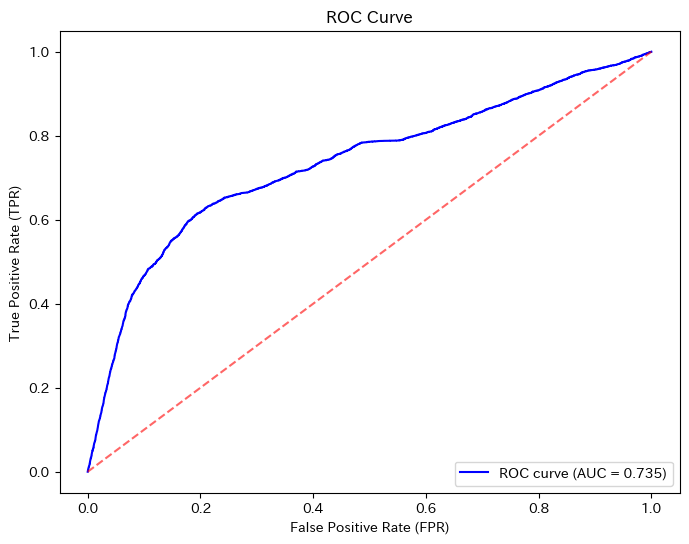

In [106]:
# 正規化
# AUC(モデルの評価)

from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# テストデータの予測確率を取得（陽性クラス=1の確率）
y_prob = model.predict_proba(X_test_normalized)[:, 1]

# AUCの計算
auc = roc_auc_score(y_test, y_prob)
print(f"AUC: {auc:.3f}")

# ROC曲線のプロット
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.3f})', color='b')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', alpha=0.6)  # 対角線
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

df_1v2_reason95_orderlog0_livedum_all_land['sales1_category'] = np.where(df_1v2_reason95_orderlog0_livedum_all_land['sales1_period'] <= 60, 1, 0)

df_train, df_test = train_test_split(df_1v2_reason95_orderlog0_livedum_all_land, test_size=0.2, random_state=0)

# 訓練データとテストデータの共通インデックスを取得
df_test = df_test[~df_test["land_id"].isin(df_train["land_id"])]

# 説明変数と目的変数を定義
y_train = df_train['sales1_category']
X_train = df_train[['population_density', 'month_sin', 'month_cos', 'size',   
                    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                    'dummy_処分の制限に関する登記', 'dummy_分筆', 'dummy_合筆', 'dummy_地目変更・更正', 
                    'dummy_地積変更・更正', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
                    'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)',
                    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]
y_test = df_test['sales1_category']
X_test = df_test[['population_density', 'month_sin', 'month_cos', 'size',  
                  'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                  'dummy_処分の制限に関する登記', 'dummy_分筆', 'dummy_合筆', 'dummy_地目変更・更正',
                  'dummy_地積変更・更正', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定',
                  'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 
                  'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]

# モデルの構築と学習
model = LogisticRegression(class_weight = 'balanced') # ロジスティック回帰モデルのインスタンスを作成
model.fit(X_train, y_train) # ロジスティック回帰モデルの重みを学習

# モデルの予測と誤差計算
y_pred = model.predict(X_test)

In [107]:
# 正規化

df_1v2_reason95_orderlog0_livedum_all_land['sales1_category'] = np.where(df_1v2_reason95_orderlog0_livedum_all_land['sales1_period'] <= 60, 1, 0)

df_train, df_test = train_test_split(df_1v2_reason95_orderlog0_livedum_all_land, test_size=0.2, random_state=0)

# 訓練データとテストデータの共通インデックスを取得
df_test = df_test[~df_test["land_id"].isin(df_train["land_id"])]

# 説明変数と目的変数を定義
y_train = df_train['sales1_category']
X_train = df_train[['population_density', 'month_sin', 'month_cos', 'size',   
                    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                    'dummy_処分の制限に関する登記', 'dummy_分筆', 'dummy_合筆', 'dummy_地目変更・更正', 
                    'dummy_地積変更・更正', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
                    'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 
                    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]
y_test = df_test['sales1_category']
X_test = df_test[['population_density', 'month_sin', 'month_cos', 'size',  
                  'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                  'dummy_処分の制限に関する登記', 'dummy_分筆', 'dummy_合筆', 'dummy_地目変更・更正',
                  'dummy_地積変更・更正', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定',
                  'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 
                  'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]

#各説明変数を正規化
scaler = MinMaxScaler()

#訓練データを正規化
X_train_normalized = scaler.fit_transform(X_train)

#テストデータを正規化
X_test_normalized = scaler.transform(X_test)

# モデルの構築と学習
model = LogisticRegression(class_weight = 'balanced') # ロジスティック回帰モデルのインスタンスを作成
model.fit(X_train, y_train) # ロジスティック回帰モデルの重みを学習

# モデルの予測と誤差計算
y_pred = model.predict(X_test)

In [ ]:
from sklearn.utils import resample

# 回帰係数の取得（1次元配列に変換）
coef = model.coef_.flatten()

# 説明変数の名前を取得
features = X_train.columns

# 変数と回帰係数の値を紐づけるためのデータフレーム作成
coef_df = pd.DataFrame({'変数': features, '回帰係数': coef})

# 棒グラフの作成
plt.figure(figsize=(10, 6))  # グラフのサイズを設定
plt.bar(coef_df['変数'], coef_df['回帰係数'])
plt.xticks(rotation=90)  # x軸のラベルを回転させる
plt.xlabel('変数')
plt.ylabel('回帰係数')
plt.title('"土地"ロジスティック回帰モデルの回帰係数_60日以内')
plt.tight_layout()  # レイアウト調整
plt.show()

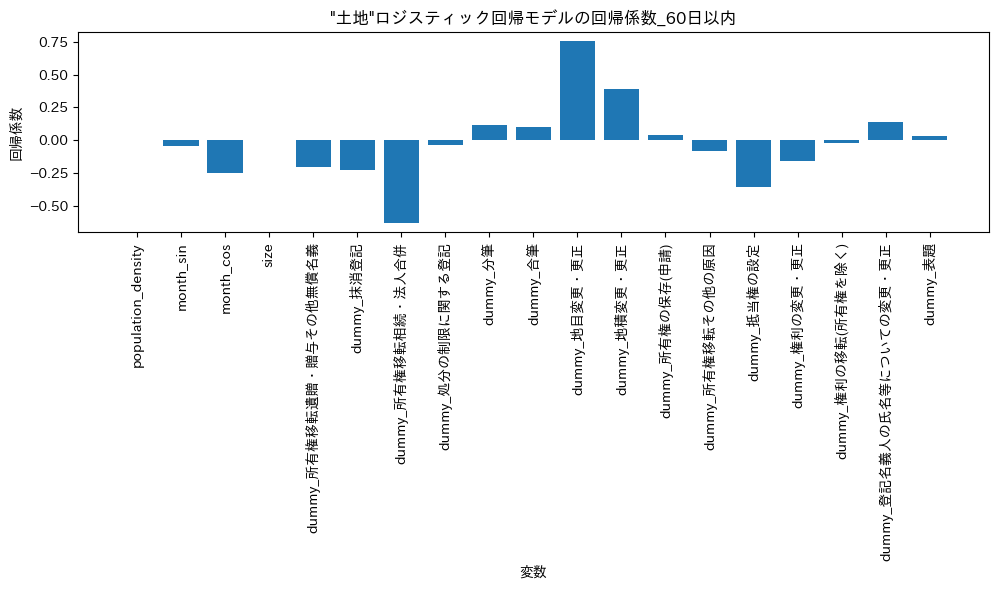

In [12]:
# 正規化

from sklearn.utils import resample

# 回帰係数の取得（1次元配列に変換）
coef = model.coef_.flatten()

# 説明変数の名前を取得
features = X_train.columns

# 変数と回帰係数の値を紐づけるためのデータフレーム作成
coef_df = pd.DataFrame({'変数': features, '回帰係数': coef})

# 棒グラフの作成
plt.figure(figsize=(10, 6))  # グラフのサイズを設定
plt.bar(coef_df['変数'], coef_df['回帰係数'])
plt.xticks(rotation=90)  # x軸のラベルを回転させる
plt.xlabel('変数')
plt.ylabel('回帰係数')
plt.title('"土地"ロジスティック回帰モデルの回帰係数_60日以内')
plt.tight_layout()  # レイアウト調整
plt.show()

In [68]:
# 定数項を含めたデザインマトリックスを作成
X_train_sm = sm.add_constant(X_train)

# ロジスティック回帰モデルを適合
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()

# 結果を表示
print(result.summary())

# p値を取得
p_values = result.pvalues
print("p-values:\n", p_values)

Optimization terminated successfully.
         Current function value: 0.125570
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:        sales1_category   No. Observations:              2862512
Model:                          Logit   Df Residuals:                  2862492
Method:                           MLE   Df Model:                           19
Date:                Mon, 14 Oct 2024   Pseudo R-squ.:                 0.08530
Time:                        15:26:51   Log-Likelihood:            -3.5944e+05
converged:                       True   LL-Null:                   -3.9296e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -4.6480      0.038   -121.666      0.000      -4

In [ ]:
# モデルの評価
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# 係数の確認
print("\nModel Coefficients:")
print(model.coef_)

In [13]:
# 正規化

# モデルの評価
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# 係数の確認
print("\nModel Coefficients:")
print(model.coef_)

Accuracy: 0.8064956484667358

Confusion Matrix:
[[367327  82487]
 [  7383   7237]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.82      0.89    449814
           1       0.08      0.50      0.14     14620

    accuracy                           0.81    464434
   macro avg       0.53      0.66      0.51    464434
weighted avg       0.95      0.81      0.87    464434


Model Coefficients:
[[ 1.37139010e-04 -4.81977861e-02 -2.48803976e-01  1.51142365e-08
  -2.01886954e-01 -2.29398342e-01 -6.35805532e-01 -3.36953598e-02
   1.16276862e-01  1.00730039e-01  7.55535963e-01  3.92173079e-01
   3.68898403e-02 -8.52243492e-02 -3.57997501e-01 -1.60408685e-01
  -2.55133376e-02  1.40340740e-01  3.47449505e-02]]


C:\Users\GUESTUSER\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


AUC: 0.708


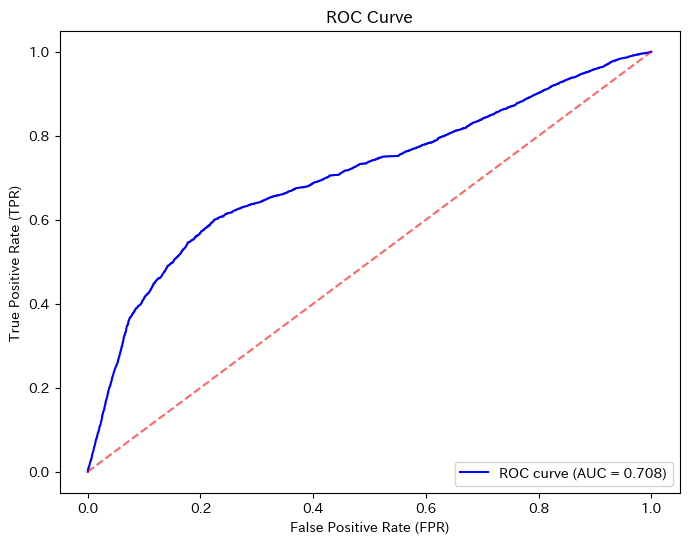

In [108]:
# 正規化
# AUC(モデルの評価)

from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# テストデータの予測確率を取得（陽性クラス=1の確率）
y_prob = model.predict_proba(X_test_normalized)[:, 1]

# AUCの計算
auc = roc_auc_score(y_test, y_prob)
print(f"AUC: {auc:.3f}")

# ROC曲線のプロット
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.3f})', color='b')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', alpha=0.6)  # 対角線
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

df_1v2_reason95_orderlog0_livedum_all_land['sales1_category'] = np.where(df_1v2_reason95_orderlog0_livedum_all_land['sales1_period'] <= 90, 1, 0)



#df_train, df_test = train_test_split(df_1v2_reason95_orderlog0_livedum_all_land, test_size=0.2, random_state=0)

# 訓練データとテストデータの共通インデックスを取得
df_test = df_test[~df_test["land_id"].isin(df_train["land_id"])]

# 説明変数と目的変数を定義
y_train = df_train['sales1_category']
X_train = df_train[['population_density', 'month_sin', 'month_cos', 'size',   
                    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                    'dummy_処分の制限に関する登記', 'dummy_分筆', 'dummy_合筆', 'dummy_地目変更・更正', 
                    'dummy_地積変更・更正', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
                    'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 
                    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]
y_test = df_test['sales1_category']
X_test = df_test[['population_density', 'month_sin', 'month_cos', 'size',  
                  'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                  'dummy_処分の制限に関する登記', 'dummy_分筆',  'dummy_合筆', 'dummy_地目変更・更正',
                  'dummy_地積変更・更正', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定',
                  'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 
                  'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]

# モデルの構築と学習
model = LogisticRegression(class_weight = 'balanced') # ロジスティック回帰モデルのインスタンスを作成
model.fit(X_train, y_train) # ロジスティック回帰モデルの重みを学習

# モデルの予測と誤差計算
y_pred = model.predict(X_test)

In [109]:
# 正規化

df_1v2_reason95_orderlog0_livedum_all_land['sales1_category'] = np.where(df_1v2_reason95_orderlog0_livedum_all_land['sales1_period'] <= 90, 1, 0)

df_train, df_test = train_test_split(df_1v2_reason95_orderlog0_livedum_all_land, test_size=0.2, random_state=0)

# 訓練データとテストデータの共通インデックスを取得
df_test = df_test[~df_test["land_id"].isin(df_train["land_id"])]

# 説明変数と目的変数を定義
y_train = df_train['sales1_category']
X_train = df_train[['population_density', 'month_sin', 'month_cos', 'size',   
                    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                    'dummy_処分の制限に関する登記', 'dummy_分筆', 'dummy_合筆', 'dummy_地目変更・更正', 
                    'dummy_地積変更・更正', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
                    'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 
                    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]
y_test = df_test['sales1_category']
X_test = df_test[['population_density', 'month_sin', 'month_cos', 'size',  
                  'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                  'dummy_処分の制限に関する登記', 'dummy_分筆', 'dummy_合筆', 'dummy_地目変更・更正',
                  'dummy_地積変更・更正', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定',
                  'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 
                  'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]

#各説明変数を正規化
scaler = MinMaxScaler()

#訓練データを正規化
X_train_normalized = scaler.fit_transform(X_train)

#テストデータを正規化
X_test_normalized = scaler.transform(X_test)

# モデルの構築と学習
model = LogisticRegression(class_weight = 'balanced') # ロジスティック回帰モデルのインスタンスを作成
model.fit(X_train, y_train) # ロジスティック回帰モデルの重みを学習

# モデルの予測と誤差計算
y_pred = model.predict(X_test)

In [ ]:
df_1v2_reason95_orderlog0_livedum_all_land['sales1_category'].value_counts()

In [ ]:
from sklearn.utils import resample

# 回帰係数の取得（1次元配列に変換）
coef = model.coef_.flatten()

# 説明変数の名前を取得
features = X_train.columns

# 変数と回帰係数の値を紐づけるためのデータフレーム作成
coef_df = pd.DataFrame({'変数': features, '回帰係数': coef})

# 棒グラフの作成
plt.figure(figsize=(10, 6))  # グラフのサイズを設定
plt.bar(coef_df['変数'], coef_df['回帰係数'])
plt.xticks(rotation=90)  # x軸のラベルを回転させる
plt.xlabel('変数')
plt.ylabel('回帰係数')
plt.title('"土地"ロジスティック回帰モデルの回帰係数_90日以内')
plt.tight_layout()  # レイアウト調整
plt.show()

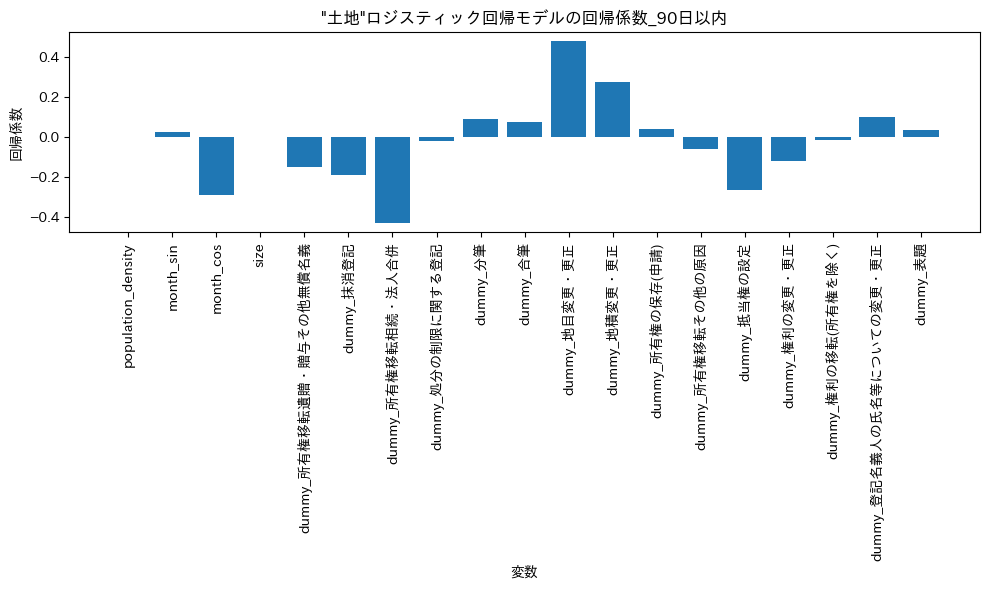

In [15]:
# 正規化

from sklearn.utils import resample

# 回帰係数の取得（1次元配列に変換）
coef = model.coef_.flatten()

# 説明変数の名前を取得
features = X_train.columns

# 変数と回帰係数の値を紐づけるためのデータフレーム作成
coef_df = pd.DataFrame({'変数': features, '回帰係数': coef})

# 棒グラフの作成
plt.figure(figsize=(10, 6))  # グラフのサイズを設定
plt.bar(coef_df['変数'], coef_df['回帰係数'])
plt.xticks(rotation=90)  # x軸のラベルを回転させる
plt.xlabel('変数')
plt.ylabel('回帰係数')
plt.title('"土地"ロジスティック回帰モデルの回帰係数_90日以内')
plt.tight_layout()  # レイアウト調整
plt.show()

In [70]:
# 定数項を含めたデザインマトリックスを作成
X_train_sm = sm.add_constant(X_train)

# ロジスティック回帰モデルを適合
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()

# 結果を表示
print(result.summary())

# p値を取得
p_values = result.pvalues
print("p-values:\n", p_values)

Optimization terminated successfully.
         Current function value: 0.150079
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:        sales1_category   No. Observations:              2862512
Model:                          Logit   Df Residuals:                  2862492
Method:                           MLE   Df Model:                           19
Date:                Mon, 14 Oct 2024   Pseudo R-squ.:                 0.08040
Time:                        15:28:12   Log-Likelihood:            -4.2960e+05
converged:                       True   LL-Null:                   -4.6716e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -4.0893      0.029   -141.735      0.000      -4

In [ ]:
# モデルの評価
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# 係数の確認
print("\nModel Coefficients:")
print(model.coef_)

In [16]:
# 正規化

# モデルの評価
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# 係数の確認
print("\nModel Coefficients:")
print(model.coef_)

Accuracy: 0.7850351180146157

Confusion Matrix:
[[356370  90083]
 [  9754   8227]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.80      0.88    446453
           1       0.08      0.46      0.14     17981

    accuracy                           0.79    464434
   macro avg       0.53      0.63      0.51    464434
weighted avg       0.94      0.79      0.85    464434


Model Coefficients:
[[ 1.49388385e-04  2.10388696e-02 -2.93409564e-01 -1.21215049e-07
  -1.50511788e-01 -1.91865200e-01 -4.33964052e-01 -2.07727462e-02
   8.90071982e-02  7.51000807e-02  4.77095092e-01  2.73140072e-01
   3.58399239e-02 -6.19261699e-02 -2.68969180e-01 -1.20602623e-01
  -1.82939808e-02  9.69509085e-02  3.11180864e-02]]


C:\Users\GUESTUSER\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


AUC: 0.690


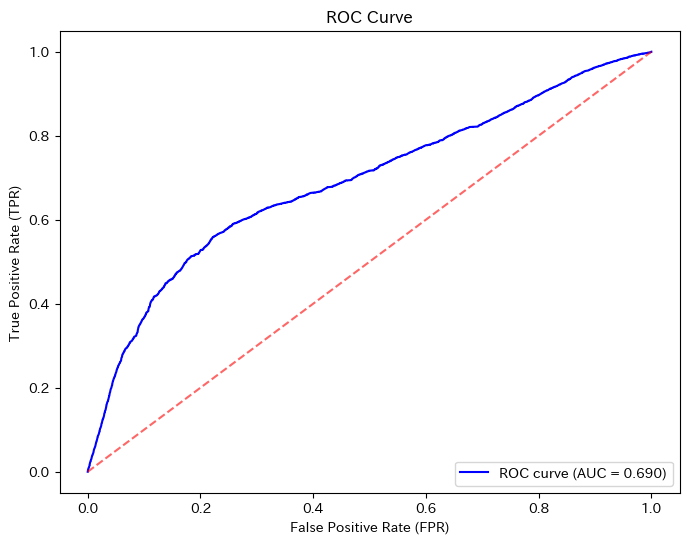

In [110]:
# 正規化
# AUC(モデルの評価)

from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# テストデータの予測確率を取得（陽性クラス=1の確率）
y_prob = model.predict_proba(X_test_normalized)[:, 1]

# AUCの計算
auc = roc_auc_score(y_test, y_prob)
print(f"AUC: {auc:.3f}")

# ROC曲線のプロット
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.3f})', color='b')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', alpha=0.6)  # 対角線
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

df_1v2_reason95_orderlog0_livedum_all_land['sales1_category'] = np.where(df_1v2_reason95_orderlog0_livedum_all_land['sales1_period'] <= 180, 1, 0)

df_train, df_test = train_test_split(df_1v2_reason95_orderlog0_livedum_all_land, test_size=0.2, random_state=0)

# 訓練データとテストデータの共通インデックスを取得
df_test = df_test[~df_test["land_id"].isin(df_train["land_id"])]

# 説明変数と目的変数を定義
y_train = df_train['sales1_category']
X_train = df_train[['population_density', 'month_sin', 'month_cos', 'size',   
                    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                    'dummy_処分の制限に関する登記', 'dummy_分筆', 'dummy_合筆', 'dummy_地目変更・更正', 
                    'dummy_地積変更・更正', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
                    'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 
                    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]
y_test = df_test['sales1_category']
X_test = df_test[['population_density', 'month_sin', 'month_cos', 'size',  
                  'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                  'dummy_処分の制限に関する登記', 'dummy_分筆',  'dummy_合筆', 'dummy_地目変更・更正',
                  'dummy_地積変更・更正', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定',
                  'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 
                  'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]

# モデルの構築と学習
model = LogisticRegression(class_weight = 'balanced') # ロジスティック回帰モデルのインスタンスを作成
model.fit(X_train, y_train) # ロジスティック回帰モデルの重みを学習

# モデルの予測と誤差計算
y_pred = model.predict(X_test)

In [111]:
# 正規化

df_1v2_reason95_orderlog0_livedum_all_land['sales1_category'] = np.where(df_1v2_reason95_orderlog0_livedum_all_land['sales1_period'] <= 180, 1, 0)

df_train, df_test = train_test_split(df_1v2_reason95_orderlog0_livedum_all_land, test_size=0.2, random_state=0)

# 訓練データとテストデータの共通インデックスを取得
df_test = df_test[~df_test["land_id"].isin(df_train["land_id"])]

# 説明変数と目的変数を定義
y_train = df_train['sales1_category']
X_train = df_train[['population_density', 'month_sin', 'month_cos', 'size',   
                    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                    'dummy_処分の制限に関する登記', 'dummy_分筆', 'dummy_合筆', 'dummy_地目変更・更正', 
                    'dummy_地積変更・更正', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
                    'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 
                    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]
y_test = df_test['sales1_category']
X_test = df_test[['population_density', 'month_sin', 'month_cos', 'size',  
                  'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                  'dummy_処分の制限に関する登記', 'dummy_分筆', 'dummy_合筆', 'dummy_地目変更・更正',
                  'dummy_地積変更・更正', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定',
                  'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 
                  'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]

#各説明変数を正規化
scaler = MinMaxScaler()

#訓練データを正規化
X_train_normalized = scaler.fit_transform(X_train)

#テストデータを正規化
X_test_normalized = scaler.transform(X_test)

# モデルの構築と学習
model = LogisticRegression(class_weight = 'balanced') # ロジスティック回帰モデルのインスタンスを作成
model.fit(X_train, y_train) # ロジスティック回帰モデルの重みを学習

# モデルの予測と誤差計算
y_pred = model.predict(X_test)

In [ ]:
df_1v2_reason95_orderlog0_livedum_all_land['sales1_category'].value_counts()

In [ ]:
import statsmodels.api as sm
import numpy as np

# 定数項を含めたデザインマトリックスを作成
X_train_sm = sm.add_constant(X_train)

# ロジスティック回帰モデルを適合
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()

# 結果を表示
print(result.summary())

# p値を取得
p_values = result.pvalues
print("p-values:\n", p_values)

In [ ]:
from sklearn.utils import resample

# 回帰係数の取得（1次元配列に変換）
coef = model.coef_.flatten()

# 説明変数の名前を取得
features = X_train.columns

# 変数と回帰係数の値を紐づけるためのデータフレーム作成
coef_df = pd.DataFrame({'変数': features, '回帰係数': coef})

# 棒グラフの作成
plt.figure(figsize=(10, 6))  # グラフのサイズを設定
plt.bar(coef_df['変数'], coef_df['回帰係数'])
plt.xticks(rotation=90)  # x軸のラベルを回転させる
plt.xlabel('変数')
plt.ylabel('回帰係数')
plt.title('"土地"ロジスティック回帰モデルの回帰係数_180日以内')
plt.tight_layout()  # レイアウト調整
plt.show()

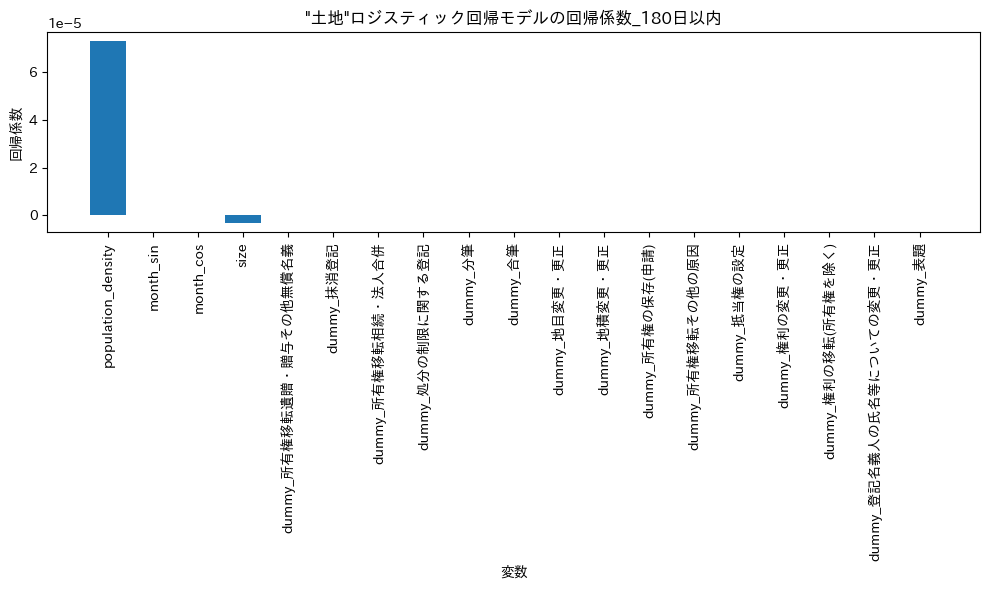

In [55]:
# 正規化

from sklearn.utils import resample

# 回帰係数の取得（1次元配列に変換）
coef = model.coef_.flatten()

# 説明変数の名前を取得
features = X_train.columns

# 変数と回帰係数の値を紐づけるためのデータフレーム作成
coef_df = pd.DataFrame({'変数': features, '回帰係数': coef})

# 棒グラフの作成
plt.figure(figsize=(10, 6))  # グラフのサイズを設定
plt.bar(coef_df['変数'], coef_df['回帰係数'])
plt.xticks(rotation=90)  # x軸のラベルを回転させる
plt.xlabel('変数')
plt.ylabel('回帰係数')
plt.title('"土地"ロジスティック回帰モデルの回帰係数_180日以内')
plt.tight_layout()  # レイアウト調整
plt.show()

In [72]:
# 定数項を含めたデザインマトリックスを作成
X_train_sm = sm.add_constant(X_train)

# ロジスティック回帰モデルを適合
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()

# 結果を表示
print(result.summary())

# p値を取得
p_values = result.pvalues
print("p-values:\n", p_values)

Optimization terminated successfully.
         Current function value: 0.188679
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:        sales1_category   No. Observations:              2862512
Model:                          Logit   Df Residuals:                  2862492
Method:                           MLE   Df Model:                           19
Date:                Mon, 14 Oct 2024   Pseudo R-squ.:                 0.07398
Time:                        15:29:17   Log-Likelihood:            -5.4010e+05
converged:                       True   LL-Null:                   -5.8325e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -3.5015      0.021   -163.896      0.000      -3.

### p値結果　　
回帰係数の値とp値の結果が異なる

In [ ]:
# モデルの評価
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# 係数の確認
print("\nModel Coefficients:")
print(model.coef_)

In [19]:
# 正規化

# モデルの評価
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# 係数の確認
print("\nModel Coefficients:")
print(model.coef_)

Accuracy: 0.0709594904765801

Confusion Matrix:
[[  9617 431107]
 [   371  23339]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.02      0.04    440724
           1       0.05      0.98      0.10     23710

    accuracy                           0.07    464434
   macro avg       0.51      0.50      0.07    464434
weighted avg       0.92      0.07      0.05    464434


Model Coefficients:
[[ 7.29847054e-05  3.83021894e-08 -6.35365973e-08 -3.39060542e-06
  -2.44547039e-08 -3.61736040e-08 -5.34630208e-08 -1.49564465e-09
   1.63787602e-08  1.29199641e-08  6.24275668e-08  3.95591964e-08
   7.88400003e-09 -9.38910831e-09 -4.46014233e-08 -1.98512536e-08
  -2.14440525e-09  1.19387765e-08  4.98733116e-09]]


C:\Users\GUESTUSER\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


AUC: 0.569


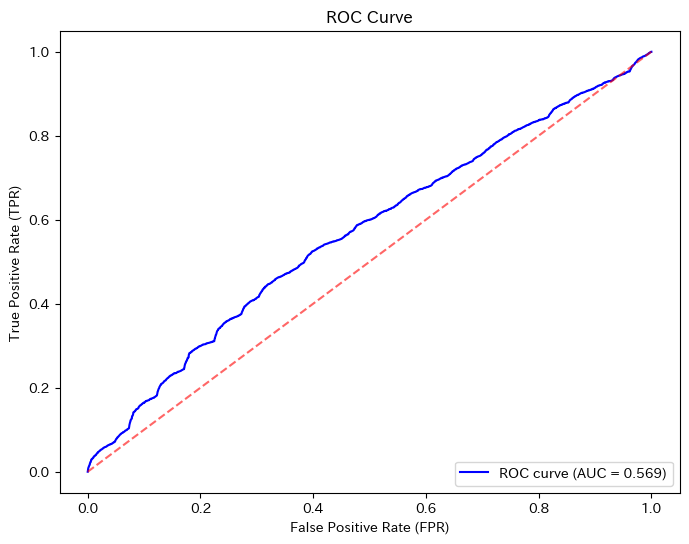

In [112]:
# 正規化
# AUC(モデルの評価)

from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# テストデータの予測確率を取得（陽性クラス=1の確率）
y_prob = model.predict_proba(X_test_normalized)[:, 1]

# AUCの計算
auc = roc_auc_score(y_test, y_prob)
print(f"AUC: {auc:.3f}")

# ROC曲線のプロット
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.3f})', color='b')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', alpha=0.6)  # 対角線
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# 重みがかかっているかの確認
undersampled_df['sales1_category'].value_counts()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

df_1v2_reason95_orderlog0_livedum_all_land['sales1_category'] = np.where(df_1v2_reason95_orderlog0_livedum_all_land['sales1_period'] <= 360, 1, 0)

df_train, df_test = train_test_split(df_1v2_reason95_orderlog0_livedum_all_land, test_size=0.2, random_state=0)

# 訓練データとテストデータの共通インデックスを取得
df_test = df_test[~df_test["land_id"].isin(df_train["land_id"])]

# 説明変数と目的変数を定義
y_train = df_train['sales1_category']
X_train = df_train[['population_density', 'month_sin', 'month_cos', 'size',   
                    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                    'dummy_処分の制限に関する登記', 'dummy_分筆', 'dummy_合筆', 'dummy_地目変更・更正', 
                    'dummy_地積変更・更正', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
                    'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)',
                    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]
y_test = df_test['sales1_category']
X_test = df_test[['population_density', 'month_sin', 'month_cos', 'size',  
                  'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                  'dummy_処分の制限に関する登記', 'dummy_分筆', 'dummy_合筆', 'dummy_地目変更・更正',
                  'dummy_地積変更・更正', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定',
                  'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)',
                  'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]

# モデルの構築と学習
model = LogisticRegression(class_weight = 'balanced') # ロジスティック回帰モデルのインスタンスを作成
model.fit(X_train, y_train) # ロジスティック回帰モデルの重みを学習

# モデルの予測と誤差計算
y_pred = model.predict(X_test)

In [113]:
# 正規化

df_1v2_reason95_orderlog0_livedum_all_land['sales1_category'] = np.where(df_1v2_reason95_orderlog0_livedum_all_land['sales1_period'] <= 360, 1, 0)

df_train, df_test = train_test_split(df_1v2_reason95_orderlog0_livedum_all_land, test_size=0.2, random_state=0)

# 訓練データとテストデータの共通インデックスを取得
df_test = df_test[~df_test["land_id"].isin(df_train["land_id"])]

# 説明変数と目的変数を定義
y_train = df_train['sales1_category']
X_train = df_train[['population_density', 'month_sin', 'month_cos', 'size',   
                    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                    'dummy_処分の制限に関する登記', 'dummy_分筆', 'dummy_合筆', 'dummy_地目変更・更正', 
                    'dummy_地積変更・更正', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
                    'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 
                    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]
y_test = df_test['sales1_category']
X_test = df_test[['population_density', 'month_sin', 'month_cos', 'size',  
                  'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                  'dummy_処分の制限に関する登記', 'dummy_分筆', 'dummy_合筆', 'dummy_地目変更・更正',
                  'dummy_地積変更・更正', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定',
                  'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 
                  'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]

#各説明変数を正規化
scaler = MinMaxScaler()

#訓練データを正規化
X_train_normalized = scaler.fit_transform(X_train)

#テストデータを正規化
X_test_normalized = scaler.transform(X_test)

# モデルの構築と学習
model = LogisticRegression(class_weight = 'balanced') # ロジスティック回帰モデルのインスタンスを作成
model.fit(X_train, y_train) # ロジスティック回帰モデルの重みを学習

# モデルの予測と誤差計算
y_pred = model.predict(X_test)

In [ ]:
from sklearn.utils import resample

# 回帰係数の取得（1次元配列に変換）
coef = model.coef_.flatten()

# 説明変数の名前を取得
features = X_train.columns

# 変数と回帰係数の値を紐づけるためのデータフレーム作成
coef_df = pd.DataFrame({'変数': features, '回帰係数': coef})

# 棒グラフの作成
plt.figure(figsize=(10, 6))  # グラフのサイズを設定
plt.bar(coef_df['変数'], coef_df['回帰係数'])
plt.xticks(rotation=90)  # x軸のラベルを回転させる
plt.xlabel('変数')
plt.ylabel('回帰係数')
plt.title('"土地"ロジスティック回帰モデルの回帰係数_360日以内')
plt.tight_layout()  # レイアウト調整
plt.show()

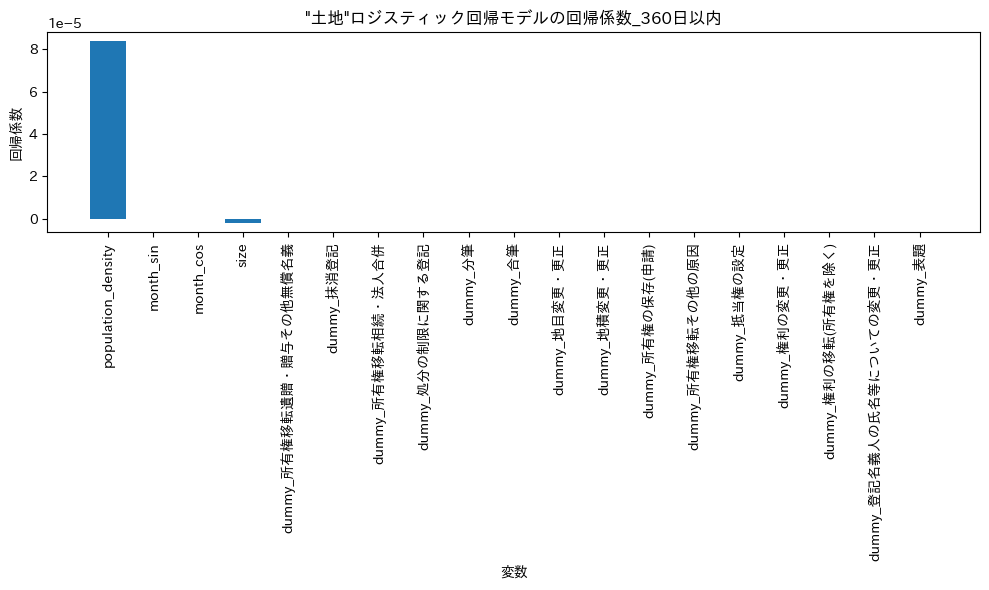

In [21]:
# 正規化

from sklearn.utils import resample

# 回帰係数の取得（1次元配列に変換）
coef = model.coef_.flatten()

# 説明変数の名前を取得
features = X_train.columns

# 変数と回帰係数の値を紐づけるためのデータフレーム作成
coef_df = pd.DataFrame({'変数': features, '回帰係数': coef})

# 棒グラフの作成
plt.figure(figsize=(10, 6))  # グラフのサイズを設定
plt.bar(coef_df['変数'], coef_df['回帰係数'])
plt.xticks(rotation=90)  # x軸のラベルを回転させる
plt.xlabel('変数')
plt.ylabel('回帰係数')
plt.title('"土地"ロジスティック回帰モデルの回帰係数_360日以内')
plt.tight_layout()  # レイアウト調整
plt.show()

In [74]:
# 定数項を含めたデザインマトリックスを作成
X_train_sm = sm.add_constant(X_train)

# ロジスティック回帰モデルを適合
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()

# 結果を表示
print(result.summary())

# p値を取得
p_values = result.pvalues
print("p-values:\n", p_values)

Optimization terminated successfully.
         Current function value: 0.212482
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:        sales1_category   No. Observations:              2862512
Model:                          Logit   Df Residuals:                  2862492
Method:                           MLE   Df Model:                           19
Date:                Mon, 14 Oct 2024   Pseudo R-squ.:                 0.06944
Time:                        15:32:28   Log-Likelihood:            -6.0823e+05
converged:                       True   LL-Null:                   -6.5362e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -3.1926      0.018   -174.626      0.000      -3.

In [ ]:
# モデルの評価
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# 係数の確認
print("\nModel Coefficients:")
print(model.coef_)

In [22]:
# 正規化

# モデルの評価
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# 係数の確認
print("\nModel Coefficients:")
print(model.coef_)

Accuracy: 0.07088843624713091

Confusion Matrix:
[[  5991 431257]
 [   254  26932]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.01      0.03    437248
           1       0.06      0.99      0.11     27186

    accuracy                           0.07    464434
   macro avg       0.51      0.50      0.07    464434
weighted avg       0.91      0.07      0.03    464434


Model Coefficients:
[[ 8.38035387e-05  3.98446403e-08 -2.18616982e-08 -2.21372283e-06
  -1.54235779e-08 -2.49576986e-08 -2.80742513e-08  2.07493840e-10
   1.19039938e-08  8.79825766e-09  3.52660695e-08  2.38190322e-08
   4.85417740e-09 -5.42515223e-09 -2.88332214e-08 -1.25136643e-08
  -1.17711222e-09  6.09448281e-09  2.77361933e-09]]


C:\Users\GUESTUSER\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


AUC: 0.576


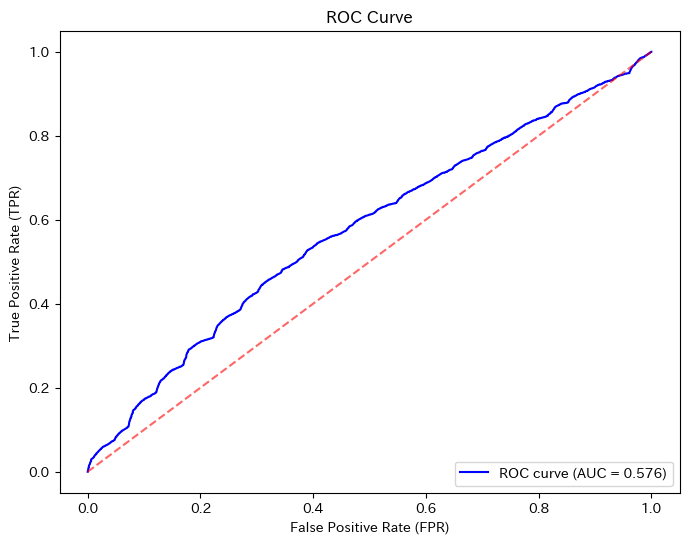

In [114]:
# 正規化
# AUC(モデルの評価)

from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# テストデータの予測確率を取得（陽性クラス=1の確率）
y_prob = model.predict_proba(X_test_normalized)[:, 1]

# AUCの計算
auc = roc_auc_score(y_test, y_prob)
print(f"AUC: {auc:.3f}")

# ROC曲線のプロット
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.3f})', color='b')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', alpha=0.6)  # 対角線
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### 建物のみ

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

df_1v2_reason95_orderlog0_livedum_all_build['sales1_category'] = np.where(df_1v2_reason95_orderlog0_livedum_all_build['sales1_period'] <= 30, 1, 0)

df_train, df_test = train_test_split(df_1v2_reason95_orderlog0_livedum_all_build, test_size=0.2, random_state=0)

# 訓練データとテストデータの共通インデックスを取得
df_test = df_test[~df_test["land_id"].isin(df_train["land_id"])]

# 説明変数と目的変数を定義
y_train = df_train['sales1_category']
X_train = df_train[['population_density', 'month_sin', 'month_cos',   
                    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                    'dummy_処分の制限に関する登記', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因',
                    'dummy_抵当権の設定', 'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]
y_test = df_test['sales1_category']
X_test = df_test[['population_density', 'month_sin', 'month_cos',   
                  'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                  'dummy_処分の制限に関する登記', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因',
                  'dummy_抵当権の設定', 'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                  'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]

# モデルの構築と学習
model = LogisticRegression(class_weight = 'balanced') # ロジスティック回帰モデルのインスタンスを作成
model.fit(X_train, y_train) # ロジスティック回帰モデルの重みを学習

# モデルの予測と誤差計算
y_pred = model.predict(X_test)

In [115]:
#正規化

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

df_1v2_reason95_orderlog0_livedum_all_build['sales1_category'] = np.where(df_1v2_reason95_orderlog0_livedum_all_build['sales1_period'] <= 30, 1, 0)

df_train, df_test = train_test_split(df_1v2_reason95_orderlog0_livedum_all_build, test_size=0.2, random_state=0)

# 訓練データとテストデータの共通インデックスを取得
df_test = df_test[~df_test["land_id"].isin(df_train["land_id"])]

# 説明変数と目的変数を定義
y_train = df_train['sales1_category']
X_train = df_train[['population_density', 'month_sin', 'month_cos',   
                    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                    'dummy_処分の制限に関する登記', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因',
                    'dummy_抵当権の設定', 'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]
y_test = df_test['sales1_category']
X_test = df_test[['population_density', 'month_sin', 'month_cos',   
                  'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                  'dummy_処分の制限に関する登記', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因',
                  'dummy_抵当権の設定', 'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                  'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]

#各説明変数を正規化
scaler = MinMaxScaler()

#訓練データを正規化
X_train_normalized = scaler.fit_transform(X_train)

#テストデータを正規化
X_test_normalized = scaler.transform(X_test)

# モデルの構築と学習
model = LogisticRegression(class_weight = 'balanced') # ロジスティック回帰モデルのインスタンスを作成
model.fit(X_train, y_train) # ロジスティック回帰モデルの重みを学習

# モデルの予測と誤差計算
y_pred = model.predict(X_test)

C:\Users\GUESTUSER\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


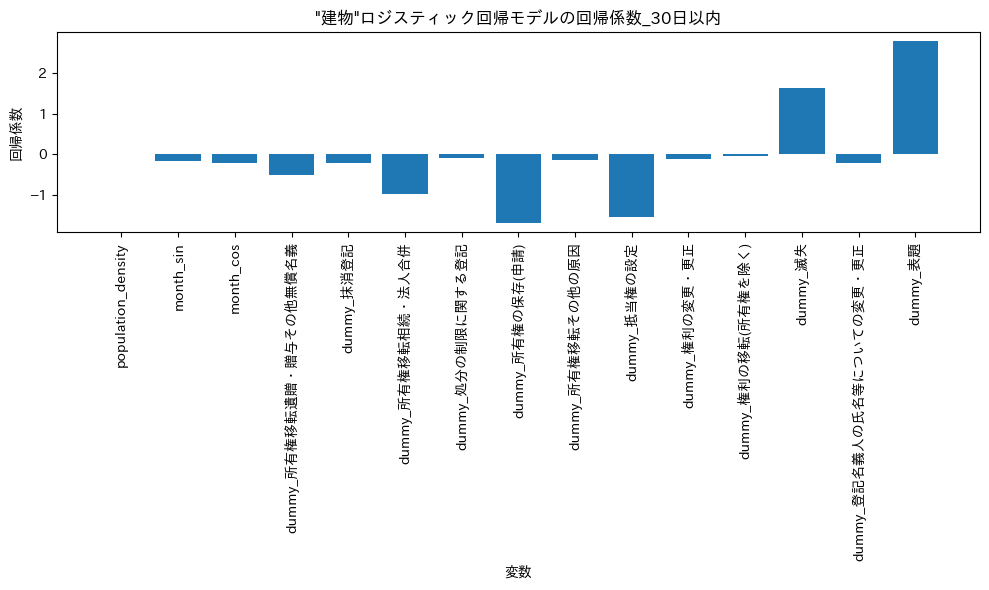

In [48]:
from sklearn.utils import resample

# 回帰係数の取得（1次元配列に変換）
coef = model.coef_.flatten()

# 説明変数の名前を取得
features = X_train.columns

# 変数と回帰係数の値を紐づけるためのデータフレーム作成
coef_df = pd.DataFrame({'変数': features, '回帰係数': coef})

# 棒グラフの作成
plt.figure(figsize=(10, 6))  # グラフのサイズを設定
plt.bar(coef_df['変数'], coef_df['回帰係数'])
plt.xticks(rotation=90)  # x軸のラベルを回転させる
plt.xlabel('変数')
plt.ylabel('回帰係数')
plt.title('"建物"ロジスティック回帰モデルの回帰係数_30日以内')
plt.tight_layout()  # レイアウト調整
plt.show()

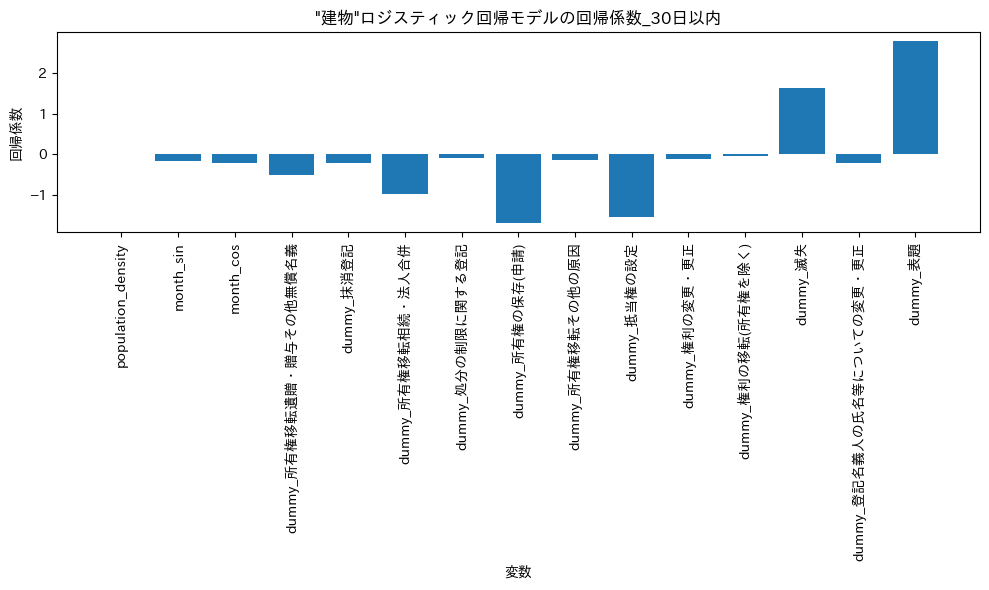

In [49]:
#正規化
from sklearn.utils import resample

# 回帰係数の取得（1次元配列に変換）
coef = model.coef_.flatten()

# 説明変数の名前を取得
features = X_train.columns

# 変数と回帰係数の値を紐づけるためのデータフレーム作成
coef_df = pd.DataFrame({'変数': features, '回帰係数': coef})

# 棒グラフの作成
plt.figure(figsize=(10, 6))  # グラフのサイズを設定
plt.bar(coef_df['変数'], coef_df['回帰係数'])
plt.xticks(rotation=90)  # x軸のラベルを回転させる
plt.xlabel('変数')
plt.ylabel('回帰係数')
plt.title('"建物"ロジスティック回帰モデルの回帰係数_30日以内')
plt.tight_layout()  # レイアウト調整
plt.show()

In [50]:
import statsmodels.api as sm
import numpy as np

# 定数項を含めたデザインマトリックスを作成
X_train_sm = sm.add_constant(X_train)

# ロジスティック回帰モデルを適合
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()

# 結果を表示
print(result.summary())

# p値を取得
p_values = result.pvalues
print("p-values:\n", p_values)

Optimization terminated successfully.
         Current function value: 0.229780
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:        sales1_category   No. Observations:              1195620
Model:                          Logit   Df Residuals:                  1195604
Method:                           MLE   Df Model:                           15
Date:                Mon, 14 Oct 2024   Pseudo R-squ.:                  0.2194
Time:                        12:44:56   Log-Likelihood:            -2.7473e+05
converged:                       True   LL-Null:                   -3.5193e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -6.5368      0.158    -41.298      0.000      -6

In [ ]:
# モデルの評価
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# 係数の確認
print("\nModel Coefficients:")
print(model.coef_)

In [19]:
#正規化
# モデルの評価
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# 係数の確認
print("\nModel Coefficients:")
print(model.coef_)

Accuracy: 0.7105835806132542

Confusion Matrix:
[[82084 39669]
 [ 2758 22084]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.67      0.79    121753
           1       0.36      0.89      0.51     24842

    accuracy                           0.71    146595
   macro avg       0.66      0.78      0.65    146595
weighted avg       0.86      0.71      0.75    146595


Model Coefficients:
[[ 5.00629771e-05 -1.70625248e-01 -2.17002543e-01 -5.00857889e-01
  -2.18808880e-01 -9.60202877e-01 -8.55833186e-02 -1.68970537e+00
  -1.40441591e-01 -1.54462916e+00 -1.00769572e-01 -2.78738257e-02
   1.62584198e+00 -2.05493784e-01  2.77508720e+00]]


AUC: 0.859


C:\Users\GUESTUSER\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


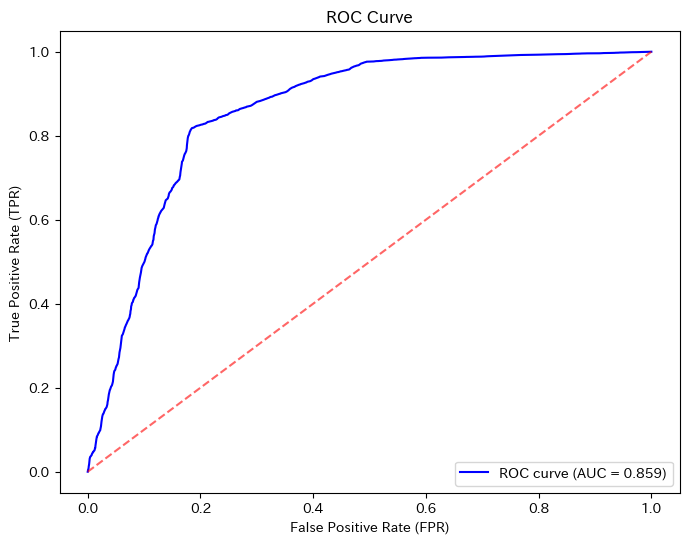

In [116]:
# 正規化
# AUC(モデルの評価)

from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# テストデータの予測確率を取得（陽性クラス=1の確率）
y_prob = model.predict_proba(X_test_normalized)[:, 1]

# AUCの計算
auc = roc_auc_score(y_test, y_prob)
print(f"AUC: {auc:.3f}")

# ROC曲線のプロット
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.3f})', color='b')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', alpha=0.6)  # 対角線
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
df_1v2_reason95_orderlog0_livedum_all_build['sales1_category'] = np.where(df_1v2_reason95_orderlog0_livedum_all_build['sales1_period'] <= 60, 1, 0)

df_train, df_test = train_test_split(df_1v2_reason95_orderlog0_livedum_all_build, test_size=0.2, random_state=0)

# 訓練データとテストデータの共通インデックスを取得
df_test = df_test[~df_test["land_id"].isin(df_train["land_id"])]

# 説明変数と目的変数を定義
y_train = df_train['sales1_category']
X_train = df_train[['population_density', 'month_sin', 'month_cos',   
                    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                    'dummy_処分の制限に関する登記', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因',
                    'dummy_抵当権の設定', 'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]
y_test = df_test['sales1_category']
X_test = df_test[['population_density', 'month_sin', 'month_cos',   
                  'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                  'dummy_処分の制限に関する登記', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因',
                  'dummy_抵当権の設定', 'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                  'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]

# モデルの構築と学習
model = LogisticRegression(class_weight = 'balanced') # ロジスティック回帰モデルのインスタンスを作成
model.fit(X_train, y_train) # ロジスティック回帰モデルの重みを学習

# モデルの予測と誤差計算
y_pred = model.predict(X_test)

In [117]:
#正規化

df_1v2_reason95_orderlog0_livedum_all_build['sales1_category'] = np.where(df_1v2_reason95_orderlog0_livedum_all_build['sales1_period'] <= 60, 1, 0)

df_train, df_test = train_test_split(df_1v2_reason95_orderlog0_livedum_all_build, test_size=0.2, random_state=0)

# 訓練データとテストデータの共通インデックスを取得
df_test = df_test[~df_test["land_id"].isin(df_train["land_id"])]

# 説明変数と目的変数を定義
y_train = df_train['sales1_category']
X_train = df_train[['population_density', 'month_sin', 'month_cos',   
                    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                    'dummy_処分の制限に関する登記', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因',
                    'dummy_抵当権の設定', 'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]
y_test = df_test['sales1_category']
X_test = df_test[['population_density', 'month_sin', 'month_cos',   
                  'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                  'dummy_処分の制限に関する登記', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因',
                  'dummy_抵当権の設定', 'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                  'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]

#各説明変数を正規化
scaler = MinMaxScaler()

#訓練データを正規化
X_train_normalized = scaler.fit_transform(X_train)

#テストデータを正規化
X_test_normalized = scaler.transform(X_test)

# モデルの構築と学習
model = LogisticRegression(class_weight = 'balanced') # ロジスティック回帰モデルのインスタンスを作成
model.fit(X_train, y_train) # ロジスティック回帰モデルの重みを学習

# モデルの予測と誤差計算
y_pred = model.predict(X_test)

In [ ]:
from sklearn.utils import resample

# 回帰係数の取得（1次元配列に変換）
coef = model.coef_.flatten()

# 説明変数の名前を取得
features = X_train.columns

# 変数と回帰係数の値を紐づけるためのデータフレーム作成
coef_df = pd.DataFrame({'変数': features, '回帰係数': coef})

# 棒グラフの作成
plt.figure(figsize=(10, 6))  # グラフのサイズを設定
plt.bar(coef_df['変数'], coef_df['回帰係数'])
plt.xticks(rotation=90)  # x軸のラベルを回転させる
plt.xlabel('変数')
plt.ylabel('回帰係数')
plt.title('"建物"ロジスティック回帰モデルの回帰係数_60日以内')
plt.tight_layout()  # レイアウト調整
plt.show()

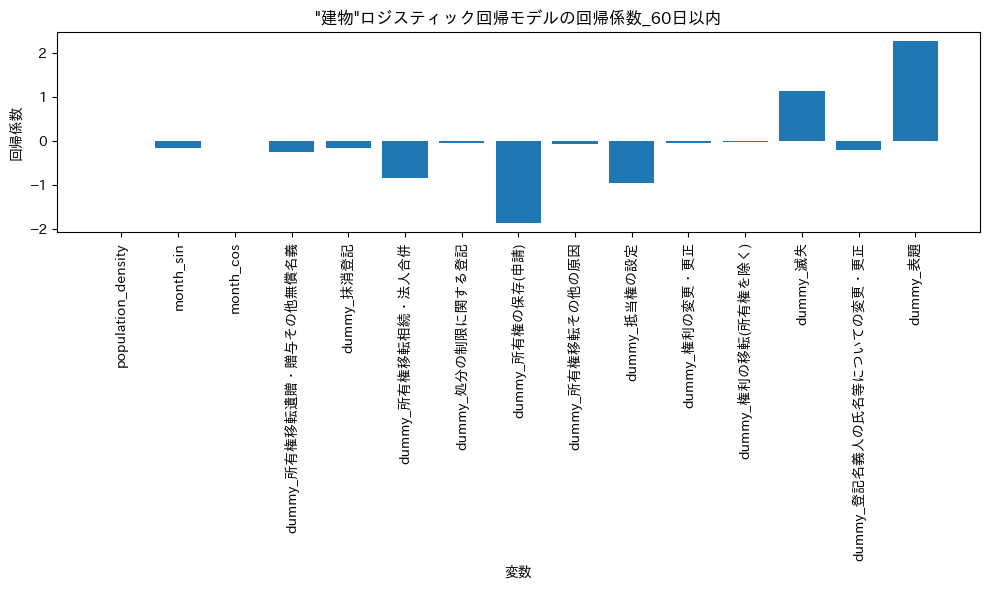

In [21]:
#正規化

from sklearn.utils import resample

# 回帰係数の取得（1次元配列に変換）
coef = model.coef_.flatten()

# 説明変数の名前を取得
features = X_train.columns

# 変数と回帰係数の値を紐づけるためのデータフレーム作成
coef_df = pd.DataFrame({'変数': features, '回帰係数': coef})

# 棒グラフの作成
plt.figure(figsize=(10, 6))  # グラフのサイズを設定
plt.bar(coef_df['変数'], coef_df['回帰係数'])
plt.xticks(rotation=90)  # x軸のラベルを回転させる
plt.xlabel('変数')
plt.ylabel('回帰係数')
plt.title('"建物"ロジスティック回帰モデルの回帰係数_60日以内')
plt.tight_layout()  # レイアウト調整
plt.show()

In [78]:
# 定数項を含めたデザインマトリックスを作成
X_train_sm = sm.add_constant(X_train)

# ロジスティック回帰モデルを適合
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()

# 結果を表示
print(result.summary())

# p値を取得
p_values = result.pvalues
print("p-values:\n", p_values)

Optimization terminated successfully.
         Current function value: 0.253669
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:        sales1_category   No. Observations:              1195620
Model:                          Logit   Df Residuals:                  1195604
Method:                           MLE   Df Model:                           15
Date:                Mon, 14 Oct 2024   Pseudo R-squ.:                  0.2015
Time:                        15:35:35   Log-Likelihood:            -3.0329e+05
converged:                       True   LL-Null:                   -3.7981e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -5.5587      0.097    -57.072      0.000      -5

In [ ]:
# モデルの評価
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# 係数の確認
print("\nModel Coefficients:")
print(model.coef_)

In [22]:
#正規化

# モデルの評価
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# 係数の確認
print("\nModel Coefficients:")
print(model.coef_)

Accuracy: 0.7379378559978171

Confusion Matrix:
[[85105 34139]
 [ 4278 23073]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.71      0.82    119244
           1       0.40      0.84      0.55     27351

    accuracy                           0.74    146595
   macro avg       0.68      0.78      0.68    146595
weighted avg       0.85      0.74      0.77    146595


Model Coefficients:
[[ 5.99110311e-05 -1.56616832e-01  4.42812182e-03 -2.55058603e-01
  -1.65137548e-01 -8.31052287e-01 -3.92209280e-02 -1.87024582e+00
  -6.76402266e-02 -9.45981782e-01 -4.70212008e-02 -1.79241665e-02
   1.14626471e+00 -2.05504253e-01  2.27059731e+00]]


AUC: 0.845


C:\Users\GUESTUSER\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


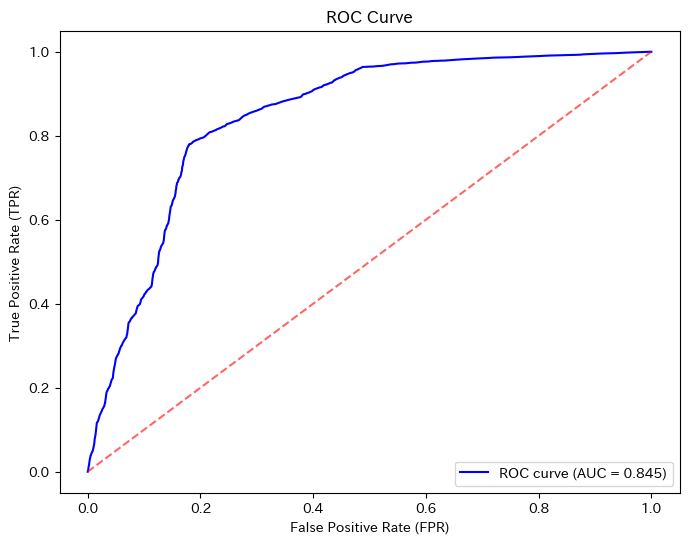

In [118]:
# 正規化
# AUC(モデルの評価)

from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# テストデータの予測確率を取得（陽性クラス=1の確率）
y_prob = model.predict_proba(X_test_normalized)[:, 1]

# AUCの計算
auc = roc_auc_score(y_test, y_prob)
print(f"AUC: {auc:.3f}")

# ROC曲線のプロット
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.3f})', color='b')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', alpha=0.6)  # 対角線
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
df_1v2_reason95_orderlog0_livedum_all_build['sales1_category'] = np.where(df_1v2_reason95_orderlog0_livedum_all_build['sales1_period'] <= 90, 1, 0)

df_train, df_test = train_test_split(df_1v2_reason95_orderlog0_livedum_all_build, test_size=0.2, random_state=0)

# 訓練データとテストデータの共通インデックスを取得
df_test = df_test[~df_test["land_id"].isin(df_train["land_id"])]

# 説明変数と目的変数を定義
y_train = df_train['sales1_category']
X_train = df_train[['population_density', 'month_sin', 'month_cos',   
                    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                    'dummy_処分の制限に関する登記', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因',
                    'dummy_抵当権の設定', 'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]
y_test = df_test['sales1_category']
X_test = df_test[['population_density', 'month_sin', 'month_cos',   
                  'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                  'dummy_処分の制限に関する登記', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因',
                  'dummy_抵当権の設定', 'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                  'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]

# モデルの構築と学習
model = LogisticRegression(class_weight = 'balanced') # ロジスティック回帰モデルのインスタンスを作成
model.fit(X_train, y_train) # ロジスティック回帰モデルの重みを学習

# モデルの予測と誤差計算
y_pred = model.predict(X_test)

In [119]:
#正規化

df_1v2_reason95_orderlog0_livedum_all_build['sales1_category'] = np.where(df_1v2_reason95_orderlog0_livedum_all_build['sales1_period'] <= 90, 1, 0)

df_train, df_test = train_test_split(df_1v2_reason95_orderlog0_livedum_all_build, test_size=0.2, random_state=0)

# 訓練データとテストデータの共通インデックスを取得
df_test = df_test[~df_test["land_id"].isin(df_train["land_id"])]

# 説明変数と目的変数を定義
y_train = df_train['sales1_category']
X_train = df_train[['population_density', 'month_sin', 'month_cos',   
                    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                    'dummy_処分の制限に関する登記', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因',
                    'dummy_抵当権の設定', 'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]
y_test = df_test['sales1_category']
X_test = df_test[['population_density', 'month_sin', 'month_cos',   
                  'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                  'dummy_処分の制限に関する登記', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因',
                  'dummy_抵当権の設定', 'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                  'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]

#各説明変数を正規化
scaler = MinMaxScaler()

#訓練データを正規化
X_train_normalized = scaler.fit_transform(X_train)

#テストデータを正規化
X_test_normalized = scaler.transform(X_test)

# モデルの構築と学習
model = LogisticRegression(class_weight = 'balanced') # ロジスティック回帰モデルのインスタンスを作成
model.fit(X_train, y_train) # ロジスティック回帰モデルの重みを学習

# モデルの予測と誤差計算
y_pred = model.predict(X_test)

C:\Users\GUESTUSER\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.utils import resample

# 回帰係数の取得（1次元配列に変換）
coef = model.coef_.flatten()

# 説明変数の名前を取得
features = X_train.columns

# 変数と回帰係数の値を紐づけるためのデータフレーム作成
coef_df = pd.DataFrame({'変数': features, '回帰係数': coef})

# 棒グラフの作成
plt.figure(figsize=(10, 6))  # グラフのサイズを設定
plt.bar(coef_df['変数'], coef_df['回帰係数'])
plt.xticks(rotation=90)  # x軸のラベルを回転させる
plt.xlabel('変数')
plt.ylabel('回帰係数')
plt.title('"建物"ロジスティック回帰モデルの回帰係数_90日以内')
plt.tight_layout()  # レイアウト調整
plt.show()

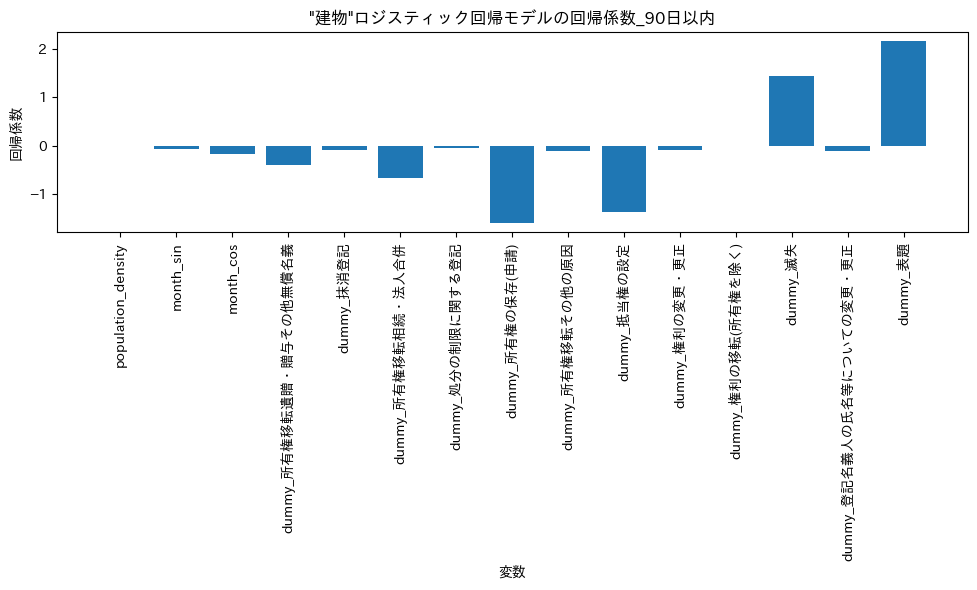

In [24]:
# 正規化

# 回帰係数の取得（1次元配列に変換）
coef = model.coef_.flatten()

# 説明変数の名前を取得
features = X_train.columns

# 変数と回帰係数の値を紐づけるためのデータフレーム作成
coef_df = pd.DataFrame({'変数': features, '回帰係数': coef})

# 棒グラフの作成
plt.figure(figsize=(10, 6))  # グラフのサイズを設定
plt.bar(coef_df['変数'], coef_df['回帰係数'])
plt.xticks(rotation=90)  # x軸のラベルを回転させる
plt.xlabel('変数')
plt.ylabel('回帰係数')
plt.title('"建物"ロジスティック回帰モデルの回帰係数_90日以内')
plt.tight_layout()  # レイアウト調整
plt.show()

In [80]:
# 定数項を含めたデザインマトリックスを作成
X_train_sm = sm.add_constant(X_train)

# ロジスティック回帰モデルを適合
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()

# 結果を表示
print(result.summary())

# p値を取得
p_values = result.pvalues
print("p-values:\n", p_values)

Optimization terminated successfully.
         Current function value: 0.263477
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:        sales1_category   No. Observations:              1195620
Model:                          Logit   Df Residuals:                  1195604
Method:                           MLE   Df Model:                           15
Date:                Mon, 14 Oct 2024   Pseudo R-squ.:                  0.1909
Time:                        15:37:25   Log-Likelihood:            -3.1502e+05
converged:                       True   LL-Null:                   -3.8933e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -5.0404      0.076    -66.753      0.000      -5

### p値結果(異常)　　
dummy_所有権移転遺贈・贈与その他無償名義 

In [ ]:
# モデルの評価
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# 係数の確認
print("\nModel Coefficients:")
print(model.coef_)

In [25]:
# 正規化

# モデルの評価
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# 係数の確認
print("\nModel Coefficients:")
print(model.coef_)

Accuracy: 0.6331116340939322

Confusion Matrix:
[[66493 52016]
 [ 1768 26318]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.56      0.71    118509
           1       0.34      0.94      0.49     28086

    accuracy                           0.63    146595
   macro avg       0.66      0.75      0.60    146595
weighted avg       0.85      0.63      0.67    146595


Model Coefficients:
[[ 8.39634159e-05 -5.65983605e-02 -1.73038679e-01 -3.92839639e-01
  -9.60025830e-02 -6.51551434e-01 -5.11865505e-02 -1.59205769e+00
  -1.06986385e-01 -1.35929344e+00 -7.68332641e-02 -1.14512705e-02
   1.43807695e+00 -1.08591651e-01  2.14677938e+00]]


AUC: 0.845


C:\Users\GUESTUSER\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


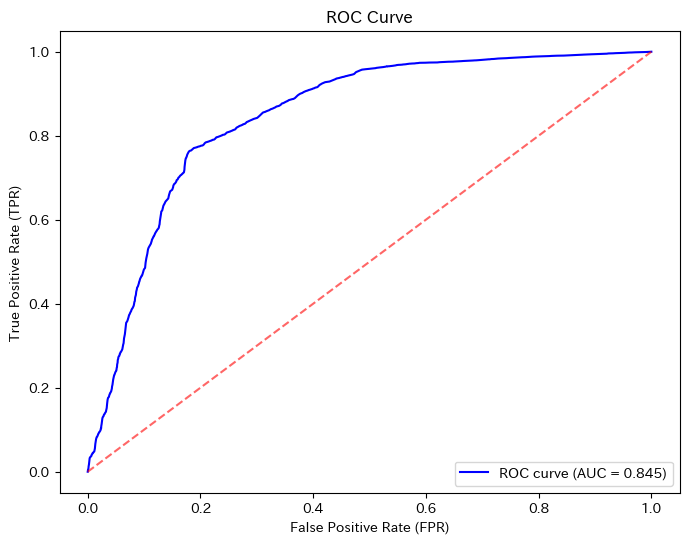

In [120]:
# 正規化
# AUC(モデルの評価)

from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# テストデータの予測確率を取得（陽性クラス=1の確率）
y_prob = model.predict_proba(X_test_normalized)[:, 1]

# AUCの計算
auc = roc_auc_score(y_test, y_prob)
print(f"AUC: {auc:.3f}")

# ROC曲線のプロット
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.3f})', color='b')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', alpha=0.6)  # 対角線
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
df_1v2_reason95_orderlog0_livedum_all_build['sales1_category'] = np.where(df_1v2_reason95_orderlog0_livedum_all_build['sales1_period'] <= 180, 1, 0)

df_train, df_test = train_test_split(df_1v2_reason95_orderlog0_livedum_all_build, test_size=0.2, random_state=0)

# 訓練データとテストデータの共通インデックスを取得
df_test = df_test[~df_test["land_id"].isin(df_train["land_id"])]

# 説明変数と目的変数を定義
y_train = df_train['sales1_category']
X_train = df_train[['population_density', 'month_sin', 'month_cos',   
                    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                    'dummy_処分の制限に関する登記', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因',
                    'dummy_抵当権の設定', 'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]
y_test = df_test['sales1_category']
X_test = df_test[['population_density', 'month_sin', 'month_cos',   
                  'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                  'dummy_処分の制限に関する登記', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因',
                  'dummy_抵当権の設定', 'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                  'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]

# モデルの構築と学習
model = LogisticRegression(class_weight = 'balanced') # ロジスティック回帰モデルのインスタンスを作成
model.fit(X_train, y_train) # ロジスティック回帰モデルの重みを学習

# モデルの予測と誤差計算
y_pred = model.predict(X_test)

In [121]:
#正規化

df_1v2_reason95_orderlog0_livedum_all_build['sales1_category'] = np.where(df_1v2_reason95_orderlog0_livedum_all_build['sales1_period'] <= 180, 1, 0)

df_train, df_test = train_test_split(df_1v2_reason95_orderlog0_livedum_all_build, test_size=0.2, random_state=0)

# 訓練データとテストデータの共通インデックスを取得
df_test = df_test[~df_test["land_id"].isin(df_train["land_id"])]

# 説明変数と目的変数を定義
y_train = df_train['sales1_category']
X_train = df_train[['population_density', 'month_sin', 'month_cos',   
                    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                    'dummy_処分の制限に関する登記', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因',
                    'dummy_抵当権の設定', 'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]
y_test = df_test['sales1_category']
X_test = df_test[['population_density', 'month_sin', 'month_cos',   
                  'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                  'dummy_処分の制限に関する登記', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因',
                  'dummy_抵当権の設定', 'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                  'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]

#各説明変数を正規化
scaler = MinMaxScaler()

#訓練データを正規化
X_train_normalized = scaler.fit_transform(X_train)

#テストデータを正規化
X_test_normalized = scaler.transform(X_test)

# モデルの構築と学習
model = LogisticRegression(class_weight = 'balanced') # ロジスティック回帰モデルのインスタンスを作成
model.fit(X_train, y_train) # ロジスティック回帰モデルの重みを学習

# モデルの予測と誤差計算
y_pred = model.predict(X_test)

In [ ]:
from sklearn.utils import resample

# 回帰係数の取得（1次元配列に変換）
coef = model.coef_.flatten()

# 説明変数の名前を取得
features = X_train.columns

# 変数と回帰係数の値を紐づけるためのデータフレーム作成
coef_df = pd.DataFrame({'変数': features, '回帰係数': coef})

# 棒グラフの作成
plt.figure(figsize=(10, 6))  # グラフのサイズを設定
plt.bar(coef_df['変数'], coef_df['回帰係数'])
plt.xticks(rotation=90)  # x軸のラベルを回転させる
plt.xlabel('変数')
plt.ylabel('回帰係数')
plt.title('"建物"ロジスティック回帰モデルの回帰係数_180日以内')
plt.tight_layout()  # レイアウト調整
plt.show()

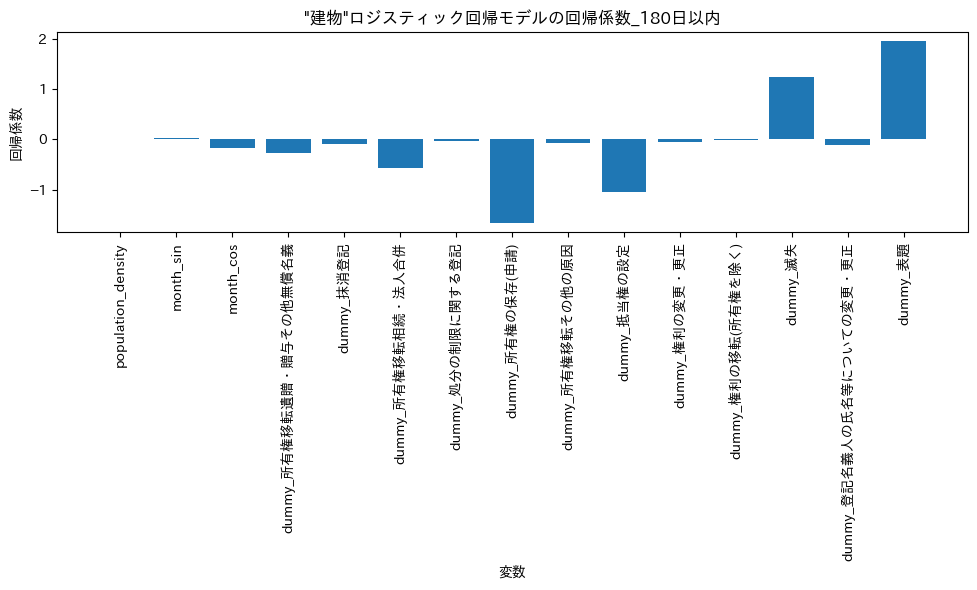

In [27]:
# 正規化

# 回帰係数の取得（1次元配列に変換）
coef = model.coef_.flatten()

# 説明変数の名前を取得
features = X_train.columns

# 変数と回帰係数の値を紐づけるためのデータフレーム作成
coef_df = pd.DataFrame({'変数': features, '回帰係数': coef})

# 棒グラフの作成
plt.figure(figsize=(10, 6))  # グラフのサイズを設定
plt.bar(coef_df['変数'], coef_df['回帰係数'])
plt.xticks(rotation=90)  # x軸のラベルを回転させる
plt.xlabel('変数')
plt.ylabel('回帰係数')
plt.title('"建物"ロジスティック回帰モデルの回帰係数_180日以内')
plt.tight_layout()  # レイアウト調整
plt.show()

In [82]:
# 定数項を含めたデザインマトリックスを作成
X_train_sm = sm.add_constant(X_train)

# ロジスティック回帰モデルを適合
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()

# 結果を表示
print(result.summary())

# p値を取得
p_values = result.pvalues
print("p-values:\n", p_values)

Optimization terminated successfully.
         Current function value: 0.278424
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:        sales1_category   No. Observations:              1195620
Model:                          Logit   Df Residuals:                  1195604
Method:                           MLE   Df Model:                           15
Date:                Mon, 14 Oct 2024   Pseudo R-squ.:                  0.1756
Time:                        15:39:25   Log-Likelihood:            -3.3289e+05
converged:                       True   LL-Null:                   -4.0382e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -4.5553      0.059    -76.607      0.000      -4

### p値結果(異常)  
dummy_所有権移転遺贈・贈与その他無償名義, dummy_所有権の保存(申請), dummy_権利の変更・更正 

In [ ]:
# モデルの評価
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# 係数の確認
print("\nModel Coefficients:")
print(model.coef_)

In [28]:
# 正規化

# モデルの評価
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# 係数の確認
print("\nModel Coefficients:")
print(model.coef_)

Accuracy: 0.6008390463521949

Confusion Matrix:
[[60520 56909]
 [ 1606 27560]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.52      0.67    117429
           1       0.33      0.94      0.49     29166

    accuracy                           0.60    146595
   macro avg       0.65      0.73      0.58    146595
weighted avg       0.85      0.60      0.64    146595


Model Coefficients:
[[ 5.90242860e-05  2.57739307e-02 -1.81283771e-01 -2.63864680e-01
  -9.19709703e-02 -5.75015529e-01 -2.92331585e-02 -1.67191223e+00
  -6.88055355e-02 -1.04056202e+00 -5.09450264e-02 -1.00400043e-02
   1.23196713e+00 -1.21986308e-01  1.95106048e+00]]


AUC: 0.837


C:\Users\GUESTUSER\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


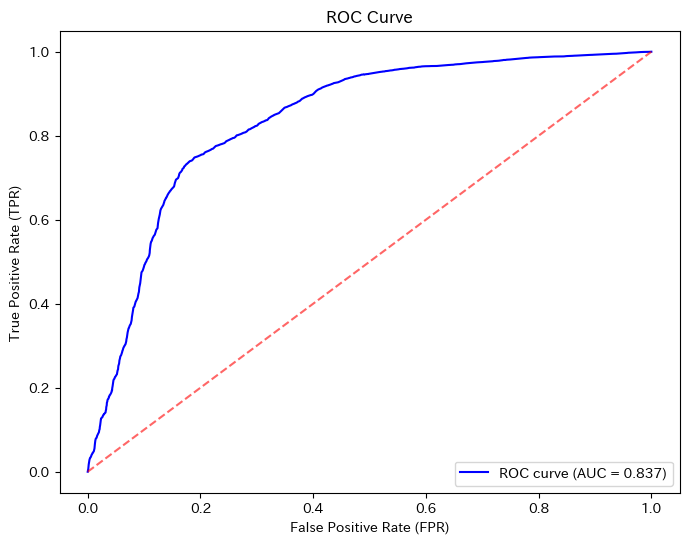

In [122]:
# 正規化
# AUC(モデルの評価)

from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# テストデータの予測確率を取得（陽性クラス=1の確率）
y_prob = model.predict_proba(X_test_normalized)[:, 1]

# AUCの計算
auc = roc_auc_score(y_test, y_prob)
print(f"AUC: {auc:.3f}")

# ROC曲線のプロット
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.3f})', color='b')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', alpha=0.6)  # 対角線
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
df_1v2_reason95_orderlog0_livedum_all_build['sales1_category'] = np.where(df_1v2_reason95_orderlog0_livedum_all_build['sales1_period'] <= 360, 1, 0)

df_train, df_test = train_test_split(df_1v2_reason95_orderlog0_livedum_all_build, test_size=0.2, random_state=0)

# 訓練データとテストデータの共通インデックスを取得
df_test = df_test[~df_test["land_id"].isin(df_train["land_id"])]

# 説明変数と目的変数を定義
y_train = df_train['sales1_category']
X_train = df_train[['population_density', 'month_sin', 'month_cos',   
                    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                    'dummy_処分の制限に関する登記', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因',
                    'dummy_抵当権の設定', 'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]
y_test = df_test['sales1_category']
X_test = df_test[['population_density', 'month_sin', 'month_cos',   
                  'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                  'dummy_処分の制限に関する登記', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因',
                  'dummy_抵当権の設定', 'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                  'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]

# モデルの構築と学習
model = LogisticRegression(class_weight = 'balanced') # ロジスティック回帰モデルのインスタンスを作成
model.fit(X_train, y_train) # ロジスティック回帰モデルの重みを学習

# モデルの予測と誤差計算
y_pred = model.predict(X_test)

In [123]:
#正規化

df_1v2_reason95_orderlog0_livedum_all_build['sales1_category'] = np.where(df_1v2_reason95_orderlog0_livedum_all_build['sales1_period'] <= 360, 1, 0)

df_train, df_test = train_test_split(df_1v2_reason95_orderlog0_livedum_all_build, test_size=0.2, random_state=0)

# 訓練データとテストデータの共通インデックスを取得
df_test = df_test[~df_test["land_id"].isin(df_train["land_id"])]

# 説明変数と目的変数を定義
y_train = df_train['sales1_category']
X_train = df_train[['population_density', 'month_sin', 'month_cos',   
                    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                    'dummy_処分の制限に関する登記', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因',
                    'dummy_抵当権の設定', 'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]
y_test = df_test['sales1_category']
X_test = df_test[['population_density', 'month_sin', 'month_cos',   
                  'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                  'dummy_処分の制限に関する登記', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因',
                  'dummy_抵当権の設定', 'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                  'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]

#各説明変数を正規化
scaler = MinMaxScaler()

#訓練データを正規化
X_train_normalized = scaler.fit_transform(X_train)

#テストデータを正規化
X_test_normalized = scaler.transform(X_test)

# モデルの構築と学習
model = LogisticRegression(class_weight = 'balanced') # ロジスティック回帰モデルのインスタンスを作成
model.fit(X_train, y_train) # ロジスティック回帰モデルの重みを学習

# モデルの予測と誤差計算
y_pred = model.predict(X_test)

In [ ]:
from sklearn.utils import resample

# 回帰係数の取得（1次元配列に変換）
coef = model.coef_.flatten()

# 説明変数の名前を取得
features = X_train.columns

# 変数と回帰係数の値を紐づけるためのデータフレーム作成
coef_df = pd.DataFrame({'変数': features, '回帰係数': coef})

# 棒グラフの作成
plt.figure(figsize=(10, 6))  # グラフのサイズを設定
plt.bar(coef_df['変数'], coef_df['回帰係数'])
plt.xticks(rotation=90)  # x軸のラベルを回転させる
plt.xlabel('変数')
plt.ylabel('回帰係数')
plt.title('"建物"ロジスティック回帰モデルの回帰係数_360日以内')
plt.tight_layout()  # レイアウト調整
plt.show()

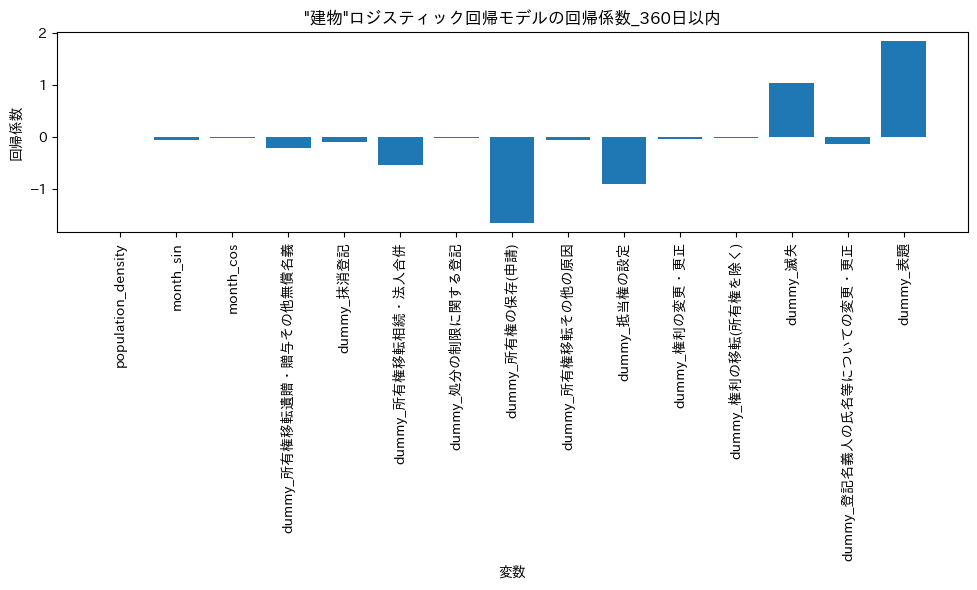

In [30]:
# 正規化

# 回帰係数の取得（1次元配列に変換）
coef = model.coef_.flatten()

# 説明変数の名前を取得
features = X_train.columns

# 変数と回帰係数の値を紐づけるためのデータフレーム作成
coef_df = pd.DataFrame({'変数': features, '回帰係数': coef})

# 棒グラフの作成
plt.figure(figsize=(10, 6))  # グラフのサイズを設定
plt.bar(coef_df['変数'], coef_df['回帰係数'])
plt.xticks(rotation=90)  # x軸のラベルを回転させる
plt.xlabel('変数')
plt.ylabel('回帰係数')
plt.title('"建物"ロジスティック回帰モデルの回帰係数_360日以内')
plt.tight_layout()  # レイアウト調整
plt.show()

In [84]:
# 定数項を含めたデザインマトリックスを作成
X_train_sm = sm.add_constant(X_train)

# ロジスティック回帰モデルを適合
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()

# 結果を表示
print(result.summary())

# p値を取得
p_values = result.pvalues
print("p-values:\n", p_values)

Optimization terminated successfully.
         Current function value: 0.288132
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:        sales1_category   No. Observations:              1195620
Model:                          Logit   Df Residuals:                  1195604
Method:                           MLE   Df Model:                           15
Date:                Mon, 14 Oct 2024   Pseudo R-squ.:                  0.1666
Time:                        15:41:58   Log-Likelihood:            -3.4450e+05
converged:                       True   LL-Null:                   -4.1336e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -4.2819      0.052    -82.559      0.000      -4

### p値結果(異常)　　
month_sin，dummy_所有権移転遺贈・贈与その他無償名義，dummy_権利の変更・更正  

In [ ]:
# モデルの評価
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# 係数の確認
print("\nModel Coefficients:")
print(model.coef_)

In [31]:
# 正規化

# モデルの評価
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# 係数の確認
print("\nModel Coefficients:")
print(model.coef_)

Accuracy: 0.6020532760326068

Confusion Matrix:
[[60284 56495]
 [ 1842 27974]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.52      0.67    116779
           1       0.33      0.94      0.49     29816

    accuracy                           0.60    146595
   macro avg       0.65      0.73      0.58    146595
weighted avg       0.84      0.60      0.64    146595


Model Coefficients:
[[ 6.91496433e-05 -5.16771442e-02 -1.44644689e-02 -2.11279956e-01
  -9.36228395e-02 -5.33170994e-01 -2.01738852e-02 -1.64781448e+00
  -5.41110732e-02 -8.89045008e-01 -4.01076395e-02 -8.93321427e-03
   1.04192742e+00 -1.22137107e-01  1.83152144e+00]]


AUC: 0.822


C:\Users\GUESTUSER\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


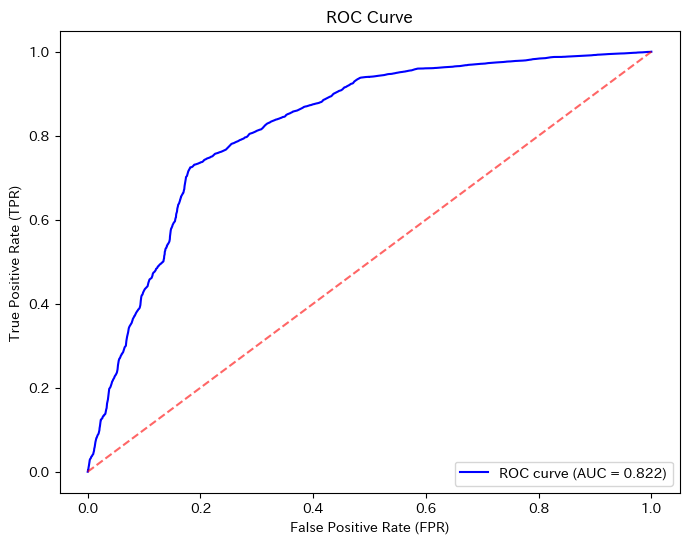

In [124]:
# 正規化
# AUC(モデルの評価)

from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# テストデータの予測確率を取得（陽性クラス=1の確率）
y_prob = model.predict_proba(X_test_normalized)[:, 1]

# AUCの計算
auc = roc_auc_score(y_test, y_prob)
print(f"AUC: {auc:.3f}")

# ROC曲線のプロット
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.3f})', color='b')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', alpha=0.6)  # 対角線
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### 区分建物のみ

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

df_1v2_reason95_orderlog0_livedum_all_subuild['sales1_category'] = np.where(df_1v2_reason95_orderlog0_livedum_all_subuild['sales1_period'] <= 30, 1, 0)

df_train, df_test = train_test_split(df_1v2_reason95_orderlog0_livedum_all_subuild, test_size=0.2, random_state=0)

# 訓練データとテストデータの共通インデックスを取得
df_test = df_test[~df_test["land_id"].isin(df_train["land_id"])]

# 説明変数と目的変数を定義
y_train = df_train['sales1_category']
X_train = df_train[['population_density', 'month_sin', 'month_cos',  
                    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                    'dummy_処分の制限に関する登記', 'dummy_区分建物の表題', 
                    'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
                    'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]
y_test = df_test['sales1_category']
X_test = df_test[['population_density', 'month_sin', 'month_cos', 
                  'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                  'dummy_処分の制限に関する登記', 'dummy_区分建物の表題', 
                  'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
                  'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                  'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]

# モデルの構築と学習
model = LogisticRegression(class_weight = 'balanced') # ロジスティック回帰モデルのインスタンスを作成
model.fit(X_train, y_train) # ロジスティック回帰モデルの重みを学習

# モデルの予測と誤差計算
y_pred = model.predict(X_test)

In [125]:
# 正規化

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

df_1v2_reason95_orderlog0_livedum_all_subuild['sales1_category'] = np.where(df_1v2_reason95_orderlog0_livedum_all_subuild['sales1_period'] <= 30, 1, 0)

df_train, df_test = train_test_split(df_1v2_reason95_orderlog0_livedum_all_subuild, test_size=0.2, random_state=0)

# 訓練データとテストデータの共通インデックスを取得
df_test = df_test[~df_test["land_id"].isin(df_train["land_id"])]

# 説明変数と目的変数を定義
y_train = df_train['sales1_category']
X_train = df_train[['population_density', 'month_sin', 'month_cos',  
                    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                    'dummy_処分の制限に関する登記', 'dummy_区分建物の表題', 
                    'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
                    'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]
y_test = df_test['sales1_category']
X_test = df_test[['population_density', 'month_sin', 'month_cos', 
                  'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                  'dummy_処分の制限に関する登記', 'dummy_区分建物の表題', 
                  'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
                  'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                  'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]

#各説明変数を正規化
scaler = MinMaxScaler()

#訓練データを正規化
X_train_normalized = scaler.fit_transform(X_train)

#テストデータを正規化
X_test_normalized = scaler.transform(X_test)

# モデルの構築と学習
model = LogisticRegression(class_weight = 'balanced') # ロジスティック回帰モデルのインスタンスを作成
model.fit(X_train, y_train) # ロジスティック回帰モデルの重みを学習

# モデルの予測と誤差計算
y_pred = model.predict(X_test)

In [ ]:
from sklearn.utils import resample

# 回帰係数の取得（1次元配列に変換）
coef = model.coef_.flatten()

# 説明変数の名前を取得
features = X_train.columns

# 変数と回帰係数の値を紐づけるためのデータフレーム作成
coef_df = pd.DataFrame({'変数': features, '回帰係数': coef})

# 棒グラフの作成
plt.figure(figsize=(10, 6))  # グラフのサイズを設定
plt.bar(coef_df['変数'], coef_df['回帰係数'])
plt.xticks(rotation=90)  # x軸のラベルを回転させる
plt.xlabel('変数')
plt.ylabel('回帰係数')
plt.title('"区分建物"ロジスティック回帰モデルの回帰係数_30日以内')
plt.tight_layout()  # レイアウト調整
plt.show()

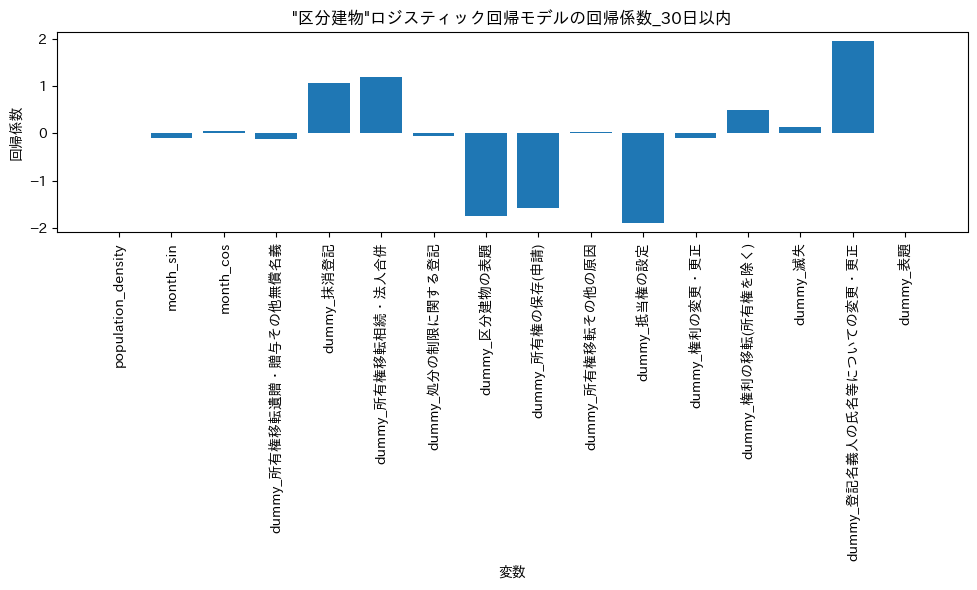

In [33]:
# 正規化

from sklearn.utils import resample

# 回帰係数の取得（1次元配列に変換）
coef = model.coef_.flatten()

# 説明変数の名前を取得
features = X_train.columns

# 変数と回帰係数の値を紐づけるためのデータフレーム作成
coef_df = pd.DataFrame({'変数': features, '回帰係数': coef})

# 棒グラフの作成
plt.figure(figsize=(10, 6))  # グラフのサイズを設定
plt.bar(coef_df['変数'], coef_df['回帰係数'])
plt.xticks(rotation=90)  # x軸のラベルを回転させる
plt.xlabel('変数')
plt.ylabel('回帰係数')
plt.title('"区分建物"ロジスティック回帰モデルの回帰係数_30日以内')
plt.tight_layout()  # レイアウト調整
plt.show()

In [86]:
# 定数項を含めたデザインマトリックスを作成
X_train_sm = sm.add_constant(X_train)

# ロジスティック回帰モデルを適合
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()

# 結果を表示
print(result.summary())

# p値を取得
p_values = result.pvalues
print("p-values:\n", p_values)

Optimization terminated successfully.
         Current function value: 0.052796
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:        sales1_category   No. Observations:               554316
Model:                          Logit   Df Residuals:                   554299
Method:                           MLE   Df Model:                           16
Date:                Mon, 14 Oct 2024   Pseudo R-squ.:                  0.1011
Time:                        15:45:10   Log-Likelihood:                -29266.
converged:                       True   LL-Null:                       -32558.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -4.4911      0.108    -41.646      0.000      -4

### p値結果(異常)  
month_cos, dummy_処分の制限に関する登記, dummy_所有権移転その他の原因, dummy_表題

In [ ]:
# モデルの評価
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# 係数の確認
print("\nModel Coefficients:")
print(model.coef_)

In [34]:
# 正規化

# モデルの評価
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# 係数の確認
print("\nModel Coefficients:")
print(model.coef_)

Accuracy: 0.3680269260499871

Confusion Matrix:
[[22082 39115]
 [  128   771]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.36      0.53     61197
           1       0.02      0.86      0.04       899

    accuracy                           0.37     62096
   macro avg       0.51      0.61      0.28     62096
weighted avg       0.98      0.37      0.52     62096


Model Coefficients:
[[-3.52829820e-05 -8.75391517e-02  6.02022927e-02 -1.22358050e-01
   1.06706932e+00  1.19595209e+00 -5.41993645e-02 -1.72966447e+00
  -1.57164832e+00  2.29845622e-02 -1.89344275e+00 -9.24266744e-02
   4.95019725e-01  1.41265390e-01  1.93967775e+00  2.22225012e-03]]


AUC: 0.704


C:\Users\GUESTUSER\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


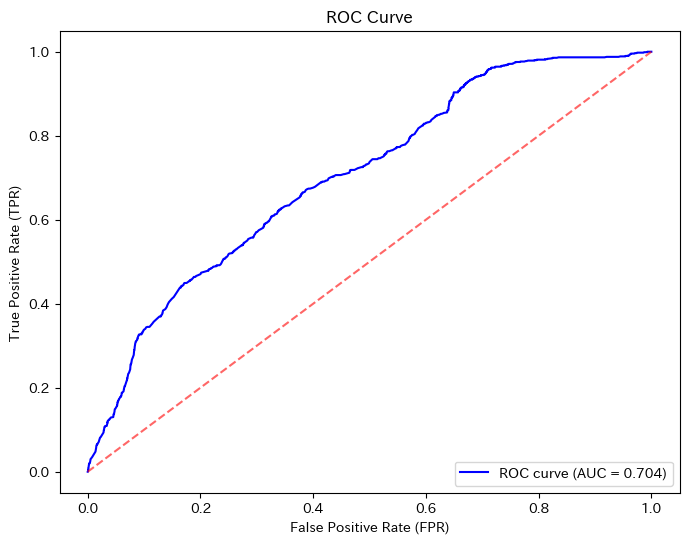

In [126]:
# 正規化
# AUC(モデルの評価)

from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# テストデータの予測確率を取得（陽性クラス=1の確率）
y_prob = model.predict_proba(X_test_normalized)[:, 1]

# AUCの計算
auc = roc_auc_score(y_test, y_prob)
print(f"AUC: {auc:.3f}")

# ROC曲線のプロット
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.3f})', color='b')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', alpha=0.6)  # 対角線
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

df_1v2_reason95_orderlog0_livedum_all_subuild['sales1_category'] = np.where(df_1v2_reason95_orderlog0_livedum_all_subuild['sales1_period'] <= 60, 1, 0)

df_train, df_test = train_test_split(df_1v2_reason95_orderlog0_livedum_all_subuild, test_size=0.2, random_state=0)

# 訓練データとテストデータの共通インデックスを取得
df_test = df_test[~df_test["land_id"].isin(df_train["land_id"])]

# 説明変数と目的変数を定義
y_train = df_train['sales1_category']
X_train = df_train[['population_density', 'month_sin', 'month_cos',  
                    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                    'dummy_処分の制限に関する登記', 'dummy_区分建物の表題', 
                    'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
                    'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]
y_test = df_test['sales1_category']
X_test = df_test[['population_density', 'month_sin', 'month_cos', 
                  'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                  'dummy_処分の制限に関する登記', 'dummy_区分建物の表題', 
                  'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
                  'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                  'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]

# モデルの構築と学習
model = LogisticRegression(class_weight = 'balanced') # ロジスティック回帰モデルのインスタンスを作成
model.fit(X_train, y_train) # ロジスティック回帰モデルの重みを学習

# モデルの予測と誤差計算
y_pred = model.predict(X_test)

In [127]:
# 正規化

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

df_1v2_reason95_orderlog0_livedum_all_subuild['sales1_category'] = np.where(df_1v2_reason95_orderlog0_livedum_all_subuild['sales1_period'] <= 60, 1, 0)

df_train, df_test = train_test_split(df_1v2_reason95_orderlog0_livedum_all_subuild, test_size=0.2, random_state=0)

# 訓練データとテストデータの共通インデックスを取得
df_test = df_test[~df_test["land_id"].isin(df_train["land_id"])]

# 説明変数と目的変数を定義
y_train = df_train['sales1_category']
X_train = df_train[['population_density', 'month_sin', 'month_cos',  
                    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                    'dummy_処分の制限に関する登記', 'dummy_区分建物の表題', 
                    'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
                    'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]
y_test = df_test['sales1_category']
X_test = df_test[['population_density', 'month_sin', 'month_cos', 
                  'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                  'dummy_処分の制限に関する登記', 'dummy_区分建物の表題', 
                  'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
                  'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                  'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]

#各説明変数を正規化
scaler = MinMaxScaler()

#訓練データを正規化
X_train_normalized = scaler.fit_transform(X_train)

#テストデータを正規化
X_test_normalized = scaler.transform(X_test)

# モデルの構築と学習
model = LogisticRegression(class_weight = 'balanced') # ロジスティック回帰モデルのインスタンスを作成
model.fit(X_train, y_train) # ロジスティック回帰モデルの重みを学習

# モデルの予測と誤差計算
y_pred = model.predict(X_test)

C:\Users\GUESTUSER\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.utils import resample

# 回帰係数の取得（1次元配列に変換）
coef = model.coef_.flatten()

# 説明変数の名前を取得
features = X_train.columns

# 変数と回帰係数の値を紐づけるためのデータフレーム作成
coef_df = pd.DataFrame({'変数': features, '回帰係数': coef})

# 棒グラフの作成
plt.figure(figsize=(10, 6))  # グラフのサイズを設定
plt.bar(coef_df['変数'], coef_df['回帰係数'])
plt.xticks(rotation=90)  # x軸のラベルを回転させる
plt.xlabel('変数')
plt.ylabel('回帰係数')
plt.title('"区分建物"ロジスティック回帰モデルの回帰係数_60日以内')
plt.tight_layout()  # レイアウト調整
plt.show()

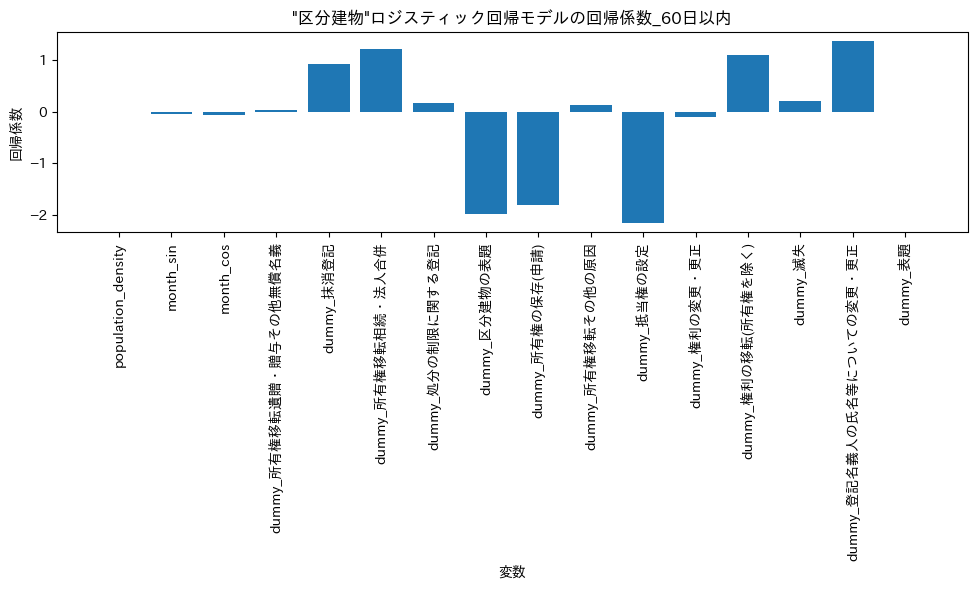

In [36]:
# 正規化

from sklearn.utils import resample

# 回帰係数の取得（1次元配列に変換）
coef = model.coef_.flatten()

# 説明変数の名前を取得
features = X_train.columns

# 変数と回帰係数の値を紐づけるためのデータフレーム作成
coef_df = pd.DataFrame({'変数': features, '回帰係数': coef})

# 棒グラフの作成
plt.figure(figsize=(10, 6))  # グラフのサイズを設定
plt.bar(coef_df['変数'], coef_df['回帰係数'])
plt.xticks(rotation=90)  # x軸のラベルを回転させる
plt.xlabel('変数')
plt.ylabel('回帰係数')
plt.title('"区分建物"ロジスティック回帰モデルの回帰係数_60日以内')
plt.tight_layout()  # レイアウト調整
plt.show()

In [88]:
# 定数項を含めたデザインマトリックスを作成
X_train_sm = sm.add_constant(X_train)

# ロジスティック回帰モデルを適合
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()

# 結果を表示
print(result.summary())

# p値を取得
p_values = result.pvalues
print("p-values:\n", p_values)

Optimization terminated successfully.
         Current function value: 0.099665
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:        sales1_category   No. Observations:               554316
Model:                          Logit   Df Residuals:                   554299
Method:                           MLE   Df Model:                           16
Date:                Mon, 14 Oct 2024   Pseudo R-squ.:                  0.1059
Time:                        15:47:55   Log-Likelihood:                -55246.
converged:                       True   LL-Null:                       -61789.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -3.7855      0.070    -54.093      0.000      -3

### p値結果(異常)  
population_destiny, dummy_処分の制限に関する登記, dummy_所有権移転その他の原因, dummy_滅失, dummy_表題

In [ ]:
# モデルの評価
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# 係数の確認
print("\nModel Coefficients:")
print(model.coef_)

In [37]:
# 正規化

# モデルの評価
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# 係数の確認
print("\nModel Coefficients:")
print(model.coef_)

Accuracy: 0.3656274156145323

Confusion Matrix:
[[20962 39211]
 [  181  1742]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.35      0.52     60173
           1       0.04      0.91      0.08      1923

    accuracy                           0.37     62096
   macro avg       0.52      0.63      0.30     62096
weighted avg       0.96      0.37      0.50     62096


Model Coefficients:
[[ 2.49009374e-05 -4.74587771e-02 -6.60899984e-02  2.75072997e-02
   9.32750452e-01  1.22253780e+00  1.75126031e-01 -1.99267841e+00
  -1.80686059e+00  1.42119028e-01 -2.16361437e+00 -9.87575554e-02
   1.10248881e+00  2.12702789e-01  1.37003105e+00  6.49654879e-03]]


AUC: 0.708


C:\Users\GUESTUSER\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


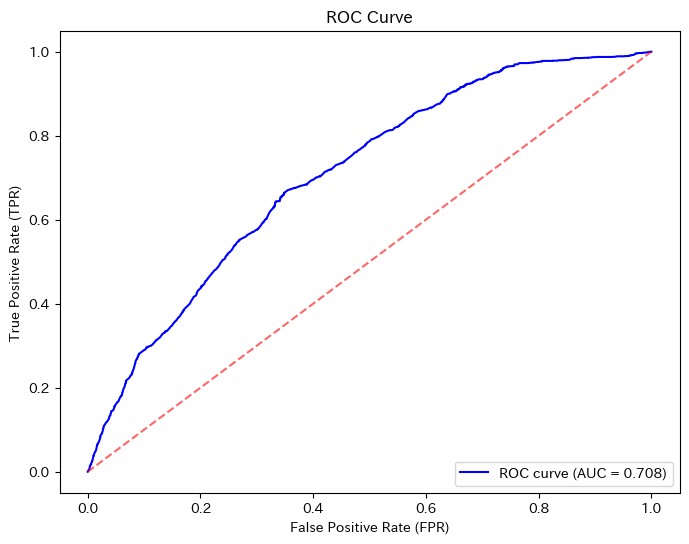

In [128]:
# 正規化
# AUC(モデルの評価)

from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# テストデータの予測確率を取得（陽性クラス=1の確率）
y_prob = model.predict_proba(X_test_normalized)[:, 1]

# AUCの計算
auc = roc_auc_score(y_test, y_prob)
print(f"AUC: {auc:.3f}")

# ROC曲線のプロット
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.3f})', color='b')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', alpha=0.6)  # 対角線
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

df_1v2_reason95_orderlog0_livedum_all_subuild['sales1_category'] = np.where(df_1v2_reason95_orderlog0_livedum_all_subuild['sales1_period'] <= 90, 1, 0)

df_train, df_test = train_test_split(df_1v2_reason95_orderlog0_livedum_all_subuild, test_size=0.2, random_state=0)

# 訓練データとテストデータの共通インデックスを取得
df_test = df_test[~df_test["land_id"].isin(df_train["land_id"])]

# 説明変数と目的変数を定義
y_train = df_train['sales1_category']
X_train = df_train[['population_density', 'month_sin', 'month_cos',  
                    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                    'dummy_処分の制限に関する登記', 'dummy_区分建物の表題', 
                    'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
                    'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]
y_test = df_test['sales1_category']
X_test = df_test[['population_density', 'month_sin', 'month_cos', 
                  'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                  'dummy_処分の制限に関する登記', 'dummy_区分建物の表題', 
                  'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
                  'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                  'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]

# モデルの構築と学習
model = LogisticRegression(class_weight = 'balanced') # ロジスティック回帰モデルのインスタンスを作成
model.fit(X_train, y_train) # ロジスティック回帰モデルの重みを学習

# モデルの予測と誤差計算
y_pred = model.predict(X_test)

In [129]:
# 正規化

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

df_1v2_reason95_orderlog0_livedum_all_subuild['sales1_category'] = np.where(df_1v2_reason95_orderlog0_livedum_all_subuild['sales1_period'] <= 90, 1, 0)

df_train, df_test = train_test_split(df_1v2_reason95_orderlog0_livedum_all_subuild, test_size=0.2, random_state=0)

# 訓練データとテストデータの共通インデックスを取得
df_test = df_test[~df_test["land_id"].isin(df_train["land_id"])]

# 説明変数と目的変数を定義
y_train = df_train['sales1_category']
X_train = df_train[['population_density', 'month_sin', 'month_cos',  
                    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                    'dummy_処分の制限に関する登記', 'dummy_区分建物の表題', 
                    'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
                    'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]
y_test = df_test['sales1_category']
X_test = df_test[['population_density', 'month_sin', 'month_cos', 
                  'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                  'dummy_処分の制限に関する登記', 'dummy_区分建物の表題', 
                  'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
                  'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                  'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]

#各説明変数を正規化
scaler = MinMaxScaler()

#訓練データを正規化
X_train_normalized = scaler.fit_transform(X_train)

#テストデータを正規化
X_test_normalized = scaler.transform(X_test)

# モデルの構築と学習
model = LogisticRegression(class_weight = 'balanced') # ロジスティック回帰モデルのインスタンスを作成
model.fit(X_train, y_train) # ロジスティック回帰モデルの重みを学習

# モデルの予測と誤差計算
y_pred = model.predict(X_test)

In [ ]:
from sklearn.utils import resample

# 回帰係数の取得（1次元配列に変換）
coef = model.coef_.flatten()

# 説明変数の名前を取得
features = X_train.columns

# 変数と回帰係数の値を紐づけるためのデータフレーム作成
coef_df = pd.DataFrame({'変数': features, '回帰係数': coef})

# 棒グラフの作成
plt.figure(figsize=(10, 6))  # グラフのサイズを設定
plt.bar(coef_df['変数'], coef_df['回帰係数'])
plt.xticks(rotation=90)  # x軸のラベルを回転させる
plt.xlabel('変数')
plt.ylabel('回帰係数')
plt.title('"区分建物"ロジスティック回帰モデルの回帰係数_90日以内')
plt.tight_layout()  # レイアウト調整
plt.show()

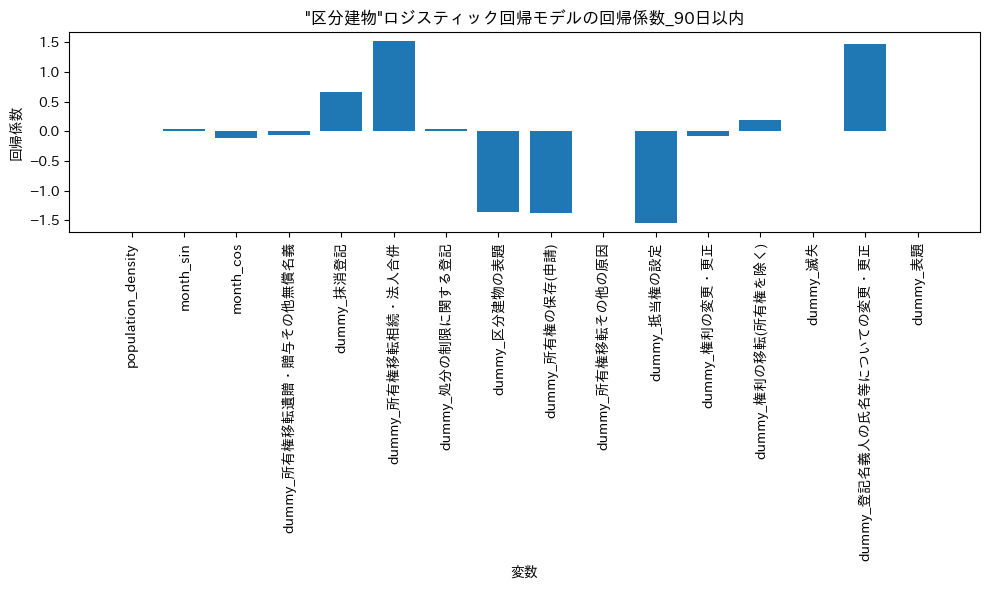

In [39]:
# 正規化

from sklearn.utils import resample

# 回帰係数の取得（1次元配列に変換）
coef = model.coef_.flatten()

# 説明変数の名前を取得
features = X_train.columns

# 変数と回帰係数の値を紐づけるためのデータフレーム作成
coef_df = pd.DataFrame({'変数': features, '回帰係数': coef})

# 棒グラフの作成
plt.figure(figsize=(10, 6))  # グラフのサイズを設定
plt.bar(coef_df['変数'], coef_df['回帰係数'])
plt.xticks(rotation=90)  # x軸のラベルを回転させる
plt.xlabel('変数')
plt.ylabel('回帰係数')
plt.title('"区分建物"ロジスティック回帰モデルの回帰係数_90日以内')
plt.tight_layout()  # レイアウト調整
plt.show()

In [90]:
# 定数項を含めたデザインマトリックスを作成
X_train_sm = sm.add_constant(X_train)

# ロジスティック回帰モデルを適合
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()

# 結果を表示
print(result.summary())

# p値を取得
p_values = result.pvalues
print("p-values:\n", p_values)

Optimization terminated successfully.
         Current function value: 0.125762
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:        sales1_category   No. Observations:               554316
Model:                          Logit   Df Residuals:                   554299
Method:                           MLE   Df Model:                           16
Date:                Mon, 14 Oct 2024   Pseudo R-squ.:                  0.1068
Time:                        15:50:36   Log-Likelihood:                -69712.
converged:                       True   LL-Null:                       -78048.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -3.3241      0.055    -60.459      0.000      -3

### p値結果(異常)  
month_sin, dummy_処分の制限に関する登記, dummy_表題

In [ ]:
# モデルの評価
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# 係数の確認
print("\nModel Coefficients:")
print(model.coef_)

In [40]:
# 正規化

# モデルの評価
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# 係数の確認
print("\nModel Coefficients:")
print(model.coef_)

Accuracy: 0.3900251223911363

Confusion Matrix:
[[21964 37501]
 [  376  2255]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.37      0.54     59465
           1       0.06      0.86      0.11      2631

    accuracy                           0.39     62096
   macro avg       0.52      0.61      0.32     62096
weighted avg       0.94      0.39      0.52     62096


Model Coefficients:
[[ 2.41611931e-05  4.49536114e-02 -1.12211182e-01 -6.84278377e-02
   6.69984656e-01  1.51649471e+00  3.54811535e-02 -1.36338821e+00
  -1.37697654e+00 -3.52356824e-03 -1.55137129e+00 -8.11564900e-02
   1.86724068e-01 -2.24498490e-03  1.46757848e+00  5.12996745e-04]]


AUC: 0.682


C:\Users\GUESTUSER\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


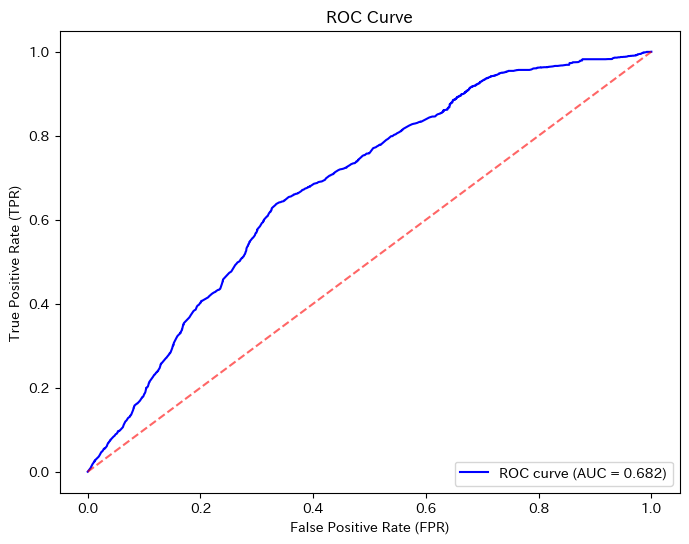

In [130]:
# 正規化
# AUC(モデルの評価)

from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# テストデータの予測確率を取得（陽性クラス=1の確率）
y_prob = model.predict_proba(X_test_normalized)[:, 1]

# AUCの計算
auc = roc_auc_score(y_test, y_prob)
print(f"AUC: {auc:.3f}")

# ROC曲線のプロット
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.3f})', color='b')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', alpha=0.6)  # 対角線
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

df_1v2_reason95_orderlog0_livedum_all_subuild['sales1_category'] = np.where(df_1v2_reason95_orderlog0_livedum_all_subuild['sales1_period'] <= 180, 1, 0)

df_train, df_test = train_test_split(df_1v2_reason95_orderlog0_livedum_all_subuild, test_size=0.2, random_state=0)

# 訓練データとテストデータの共通インデックスを取得
df_test = df_test[~df_test["land_id"].isin(df_train["land_id"])]

# 説明変数と目的変数を定義
y_train = df_train['sales1_category']
X_train = df_train[['population_density', 'month_sin', 'month_cos',  
                    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                    'dummy_処分の制限に関する登記', 'dummy_区分建物の表題', 
                    'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
                    'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]
y_test = df_test['sales1_category']
X_test = df_test[['population_density', 'month_sin', 'month_cos', 
                  'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                  'dummy_処分の制限に関する登記', 'dummy_区分建物の表題', 
                  'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
                  'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                  'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]

# モデルの構築と学習
model = LogisticRegression(class_weight = 'balanced') # ロジスティック回帰モデルのインスタンスを作成
model.fit(X_train, y_train) # ロジスティック回帰モデルの重みを学習

# モデルの予測と誤差計算
y_pred = model.predict(X_test)

In [131]:
# 正規化

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

df_1v2_reason95_orderlog0_livedum_all_subuild['sales1_category'] = np.where(df_1v2_reason95_orderlog0_livedum_all_subuild['sales1_period'] <= 180, 1, 0)

df_train, df_test = train_test_split(df_1v2_reason95_orderlog0_livedum_all_subuild, test_size=0.2, random_state=0)

# 訓練データとテストデータの共通インデックスを取得
df_test = df_test[~df_test["land_id"].isin(df_train["land_id"])]

# 説明変数と目的変数を定義
y_train = df_train['sales1_category']
X_train = df_train[['population_density', 'month_sin', 'month_cos',  
                    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                    'dummy_処分の制限に関する登記', 'dummy_区分建物の表題', 
                    'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
                    'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]
y_test = df_test['sales1_category']
X_test = df_test[['population_density', 'month_sin', 'month_cos', 
                  'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                  'dummy_処分の制限に関する登記', 'dummy_区分建物の表題', 
                  'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
                  'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                  'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]

#各説明変数を正規化
scaler = MinMaxScaler()

#訓練データを正規化
X_train_normalized = scaler.fit_transform(X_train)

#テストデータを正規化
X_test_normalized = scaler.transform(X_test)

# モデルの構築と学習
model = LogisticRegression(class_weight = 'balanced') # ロジスティック回帰モデルのインスタンスを作成
model.fit(X_train, y_train) # ロジスティック回帰モデルの重みを学習

# モデルの予測と誤差計算
y_pred = model.predict(X_test)

In [ ]:
from sklearn.utils import resample

# 回帰係数の取得（1次元配列に変換）
coef = model.coef_.flatten()

# 説明変数の名前を取得
features = X_train.columns

# 変数と回帰係数の値を紐づけるためのデータフレーム作成
coef_df = pd.DataFrame({'変数': features, '回帰係数': coef})

# 棒グラフの作成
plt.figure(figsize=(10, 6))  # グラフのサイズを設定
plt.bar(coef_df['変数'], coef_df['回帰係数'])
plt.xticks(rotation=90)  # x軸のラベルを回転させる
plt.xlabel('変数')
plt.ylabel('回帰係数')
plt.title('"区分建物"ロジスティック回帰モデルの回帰係数_180日以内')
plt.tight_layout()  # レイアウト調整
plt.show()

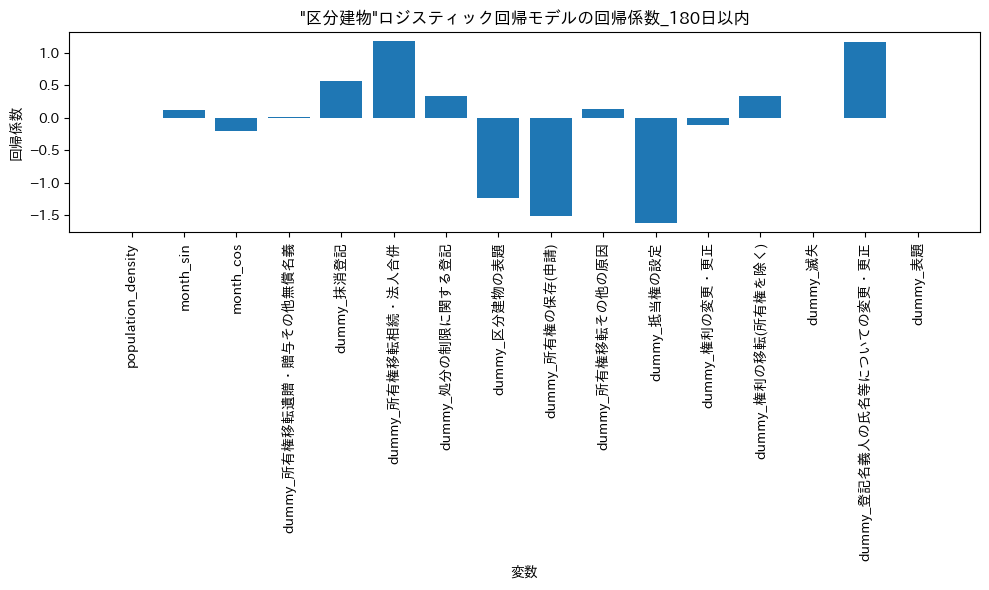

In [42]:
# 正規化

from sklearn.utils import resample

# 回帰係数の取得（1次元配列に変換）
coef = model.coef_.flatten()

# 説明変数の名前を取得
features = X_train.columns

# 変数と回帰係数の値を紐づけるためのデータフレーム作成
coef_df = pd.DataFrame({'変数': features, '回帰係数': coef})

# 棒グラフの作成
plt.figure(figsize=(10, 6))  # グラフのサイズを設定
plt.bar(coef_df['変数'], coef_df['回帰係数'])
plt.xticks(rotation=90)  # x軸のラベルを回転させる
plt.xlabel('変数')
plt.ylabel('回帰係数')
plt.title('"区分建物"ロジスティック回帰モデルの回帰係数_180日以内')
plt.tight_layout()  # レイアウト調整
plt.show()

In [92]:
# 定数項を含めたデザインマトリックスを作成
X_train_sm = sm.add_constant(X_train)

# ロジスティック回帰モデルを適合
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()

# 結果を表示
print(result.summary())

# p値を取得
p_values = result.pvalues
print("p-values:\n", p_values)

Optimization terminated successfully.
         Current function value: 0.169542
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:        sales1_category   No. Observations:               554316
Model:                          Logit   Df Residuals:                   554299
Method:                           MLE   Df Model:                           16
Date:                Mon, 14 Oct 2024   Pseudo R-squ.:                  0.1022
Time:                        15:52:07   Log-Likelihood:                -93980.
converged:                       True   LL-Null:                   -1.0468e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -2.7278      0.041    -65.790      0.000      -2.

### p値結果(異常)  
dummy_処分の制限に関する登記, dummy_表題

In [ ]:
# モデルの評価
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# 係数の確認
print("\nModel Coefficients:")
print(model.coef_)

In [43]:
# 正規化

# モデルの評価
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# 係数の確認
print("\nModel Coefficients:")
print(model.coef_)

Accuracy: 0.4176597526410719

Confusion Matrix:
[[22710 35539]
 [  622  3225]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.39      0.56     58249
           1       0.08      0.84      0.15      3847

    accuracy                           0.42     62096
   macro avg       0.53      0.61      0.35     62096
weighted avg       0.92      0.42      0.53     62096


Model Coefficients:
[[ 6.09492450e-05  1.15571185e-01 -1.98842124e-01  2.26297996e-03
   5.71050297e-01  1.17342368e+00  3.40038290e-01 -1.23771327e+00
  -1.51804147e+00  1.39694265e-01 -1.62604865e+00 -1.10635784e-01
   3.29462654e-01 -6.80583756e-03  1.16207546e+00  1.08757820e-04]]


AUC: 0.682


C:\Users\GUESTUSER\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


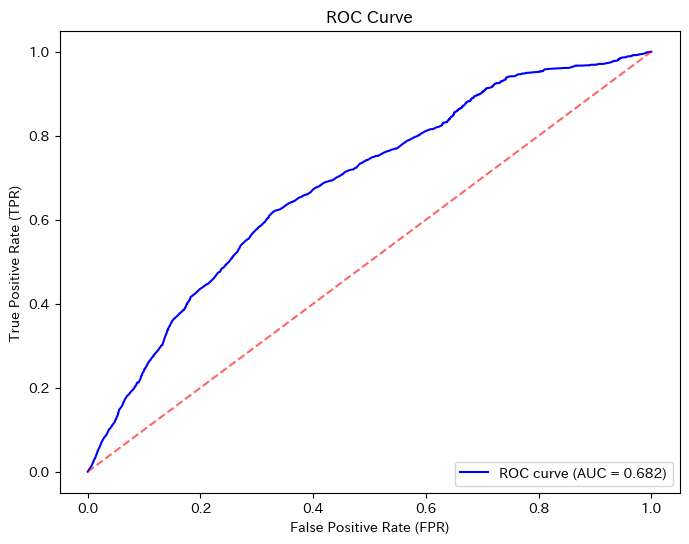

In [132]:
# 正規化
# AUC(モデルの評価)

from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# テストデータの予測確率を取得（陽性クラス=1の確率）
y_prob = model.predict_proba(X_test_normalized)[:, 1]

# AUCの計算
auc = roc_auc_score(y_test, y_prob)
print(f"AUC: {auc:.3f}")

# ROC曲線のプロット
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.3f})', color='b')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', alpha=0.6)  # 対角線
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

df_1v2_reason95_orderlog0_livedum_all_subuild['sales1_category'] = np.where(df_1v2_reason95_orderlog0_livedum_all_subuild['sales1_period'] <= 360, 1, 0)

df_train, df_test = train_test_split(df_1v2_reason95_orderlog0_livedum_all_subuild, test_size=0.2, random_state=0)

# 訓練データとテストデータの共通インデックスを取得
df_test = df_test[~df_test["land_id"].isin(df_train["land_id"])]

# 説明変数と目的変数を定義
y_train = df_train['sales1_category']
X_train = df_train[['population_density', 'month_sin', 'month_cos',  
                    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                    'dummy_処分の制限に関する登記', 'dummy_区分建物の表題', 
                    'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
                    'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]
y_test = df_test['sales1_category']
X_test = df_test[['population_density', 'month_sin', 'month_cos', 
                  'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                  'dummy_処分の制限に関する登記', 'dummy_区分建物の表題', 
                  'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
                  'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                  'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]

# モデルの構築と学習
model = LogisticRegression(class_weight = 'balanced') # ロジスティック回帰モデルのインスタンスを作成
model.fit(X_train, y_train) # ロジスティック回帰モデルの重みを学習

# モデルの予測と誤差計算
y_pred = model.predict(X_test)

In [133]:
# 正規化

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

df_1v2_reason95_orderlog0_livedum_all_subuild['sales1_category'] = np.where(df_1v2_reason95_orderlog0_livedum_all_subuild['sales1_period'] <= 360, 1, 0)

df_train, df_test = train_test_split(df_1v2_reason95_orderlog0_livedum_all_subuild, test_size=0.2, random_state=0)

# 訓練データとテストデータの共通インデックスを取得
df_test = df_test[~df_test["land_id"].isin(df_train["land_id"])]

# 説明変数と目的変数を定義
y_train = df_train['sales1_category']
X_train = df_train[['population_density', 'month_sin', 'month_cos',  
                    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                    'dummy_処分の制限に関する登記', 'dummy_区分建物の表題', 
                    'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
                    'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]
y_test = df_test['sales1_category']
X_test = df_test[['population_density', 'month_sin', 'month_cos', 
                  'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                  'dummy_処分の制限に関する登記', 'dummy_区分建物の表題', 
                  'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
                  'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                  'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]

#各説明変数を正規化
scaler = MinMaxScaler()

#訓練データを正規化
X_train_normalized = scaler.fit_transform(X_train)

#テストデータを正規化
X_test_normalized = scaler.transform(X_test)

# モデルの構築と学習
model = LogisticRegression(class_weight = 'balanced') # ロジスティック回帰モデルのインスタンスを作成
model.fit(X_train, y_train) # ロジスティック回帰モデルの重みを学習

# モデルの予測と誤差計算
y_pred = model.predict(X_test)

In [ ]:
from sklearn.utils import resample

# 回帰係数の取得（1次元配列に変換）
coef = model.coef_.flatten()

# 説明変数の名前を取得
features = X_train.columns

# 変数と回帰係数の値を紐づけるためのデータフレーム作成
coef_df = pd.DataFrame({'変数': features, '回帰係数': coef})

# 棒グラフの作成
plt.figure(figsize=(10, 6))  # グラフのサイズを設定
plt.bar(coef_df['変数'], coef_df['回帰係数'])
plt.xticks(rotation=90)  # x軸のラベルを回転させる
plt.xlabel('変数')
plt.ylabel('回帰係数')
plt.title('"区分建物"ロジスティック回帰モデルの回帰係数_360日以内')
plt.tight_layout()  # レイアウト調整
plt.show()

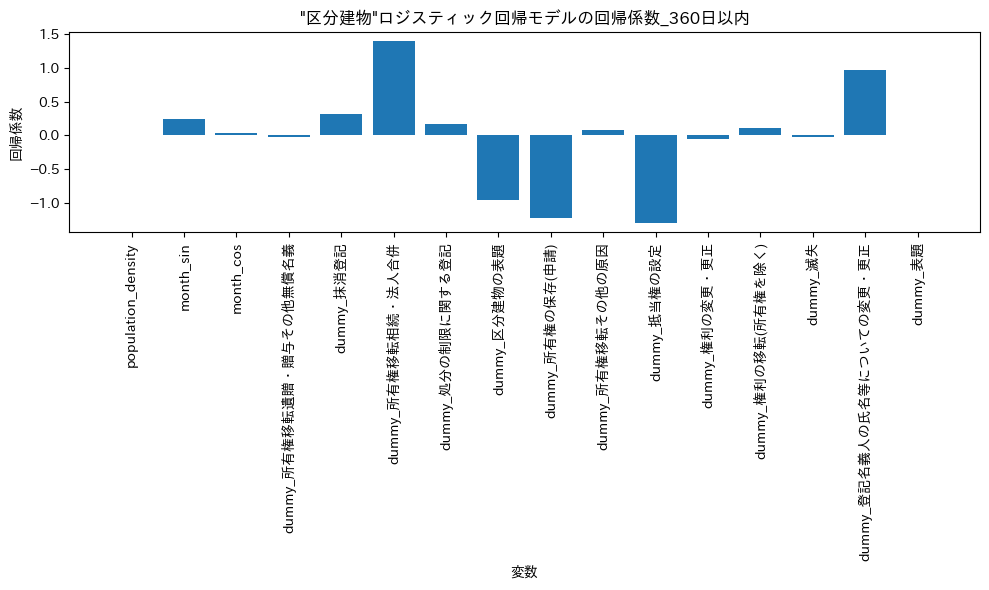

In [45]:
# 正規化

from sklearn.utils import resample

# 回帰係数の取得（1次元配列に変換）
coef = model.coef_.flatten()

# 説明変数の名前を取得
features = X_train.columns

# 変数と回帰係数の値を紐づけるためのデータフレーム作成
coef_df = pd.DataFrame({'変数': features, '回帰係数': coef})

# 棒グラフの作成
plt.figure(figsize=(10, 6))  # グラフのサイズを設定
plt.bar(coef_df['変数'], coef_df['回帰係数'])
plt.xticks(rotation=90)  # x軸のラベルを回転させる
plt.xlabel('変数')
plt.ylabel('回帰係数')
plt.title('"区分建物"ロジスティック回帰モデルの回帰係数_360日以内')
plt.tight_layout()  # レイアウト調整
plt.show()

In [94]:
# 定数項を含めたデザインマトリックスを作成
X_train_sm = sm.add_constant(X_train)

# ロジスティック回帰モデルを適合
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()

# 結果を表示
print(result.summary())

# p値を取得
p_values = result.pvalues
print("p-values:\n", p_values)

Optimization terminated successfully.
         Current function value: 0.198335
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:        sales1_category   No. Observations:               554316
Model:                          Logit   Df Residuals:                   554299
Method:                           MLE   Df Model:                           16
Date:                Mon, 14 Oct 2024   Pseudo R-squ.:                 0.09691
Time:                        16:01:40   Log-Likelihood:            -1.0994e+05
converged:                       True   LL-Null:                   -1.2174e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -2.3772      0.036    -66.801      0.000      -2.

### p値結果(異常)  
dummy_処分の制限に関する登記, dummy_所有権移転その他の原因, dummy_権利の移転(所有権を除く), dummy_表題

In [ ]:
# モデルの評価
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# 係数の確認
print("\nModel Coefficients:")
print(model.coef_)

In [46]:
# 正規化

# モデルの評価
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# 係数の確認
print("\nModel Coefficients:")
print(model.coef_)

Accuracy: 0.4925115949497552

Confusion Matrix:
[[26983 30471]
 [ 1042  3600]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.47      0.63     57454
           1       0.11      0.78      0.19      4642

    accuracy                           0.49     62096
   macro avg       0.53      0.62      0.41     62096
weighted avg       0.90      0.49      0.60     62096


Model Coefficients:
[[ 5.89221607e-05  2.44972732e-01  3.16195785e-02 -2.30216468e-02
   3.08980656e-01  1.39330521e+00  1.73287026e-01 -9.60196625e-01
  -1.22072857e+00  8.23060631e-02 -1.30572125e+00 -5.65276001e-02
   1.06836053e-01 -2.08449817e-02  9.67605155e-01 -3.39146791e-04]]


AUC: 0.663


C:\Users\GUESTUSER\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


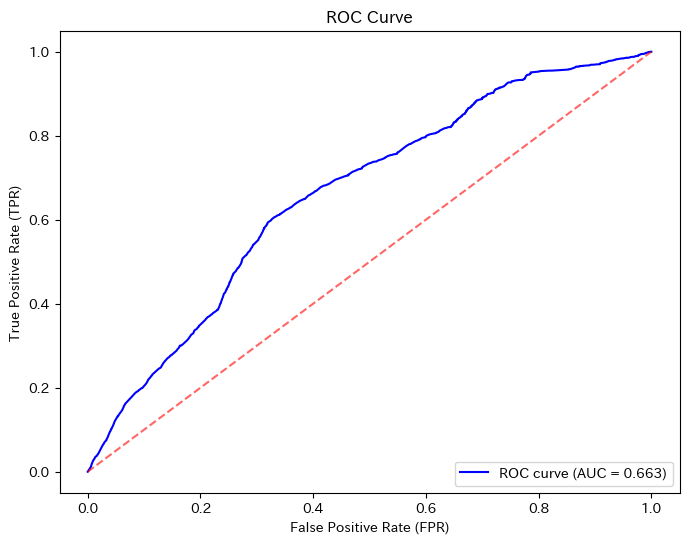

In [134]:
# 正規化
# AUC(モデルの評価)

from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# テストデータの予測確率を取得（陽性クラス=1の確率）
y_prob = model.predict_proba(X_test_normalized)[:, 1]

# AUCの計算
auc = roc_auc_score(y_test, y_prob)
print(f"AUC: {auc:.3f}")

# ROC曲線のプロット
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.3f})', color='b')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', alpha=0.6)  # 対角線
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [144]:
from collections import Counter
import numpy as np

# クラスのサンプル数を取得
class_counts = Counter(y_train)

# 総サンプル数を取得
total_samples = len(y_train)

# 各クラスの重みを計算 (balancedの定義に基づく)
class_weights = {
    cls: total_samples / (len(class_counts) * count) 
    for cls, count in class_counts.items()
}

print("Actual Class Weights (Balanced):", class_weights)

Counter({0: 522525, 1: 31791})


## アンダーサンプリング  
ロジスティック回帰はclass_weightが使えたため，今回はいい？

### 土地のみ

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

df_1v2_reason95_orderlog0_livedum_all_land['sales1_category'] = np.where(df_1v2_reason95_orderlog0_livedum_all_land['sales1_period'] <= 30, 1, 0)

# 各クラスの数を計算
class_counts = df_1v2_reason95_orderlog0_livedum_all_land['sales1_category'].value_counts()

# 最小クラスの数を取得
min_class_count = class_counts.min()

# アンダーサンプリング
undersampled_df = pd.DataFrame()
for category in range(0, 2):
    class_data = df_1v2_reason95_orderlog0_livedum_all_land[df_1v2_reason95_orderlog0_livedum_all_land['sales1_category'] == category]
    undersampled_class_data = resample(class_data, 
                                     replace=False, 
                                     n_samples=min_class_count, 
                                     random_state=42)
    undersampled_df = pd.concat([undersampled_df, undersampled_class_data])

df_train, df_test = train_test_split(undersampled_df, test_size=0.2, random_state=0)

# 訓練データとテストデータの共通インデックスを取得
df_test = df_test[~df_test["land_id"].isin(df_train["land_id"])]

# 説明変数と目的変数を定義
y_train = df_train['sales1_category']
X_train = df_train[['population_density', 'month_sin', 'month_cos', 'size',   
                    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                    'dummy_処分の制限に関する登記', 'dummy_分筆', 'dummy_合筆', 'dummy_地目変更・更正', 
                    'dummy_地積変更・更正', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
                    'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 
                    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]
y_test = df_test['sales1_category']
X_test = df_test[['population_density', 'month_sin', 'month_cos', 'size',  
                  'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                  'dummy_処分の制限に関する登記', 'dummy_分筆', 'dummy_合筆', 'dummy_地目変更・更正',
                  'dummy_地積変更・更正', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定',
                  'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 
                  'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]

# モデルの構築と学習
model = LogisticRegression(class_weight = 'balanced') # ロジスティック回帰モデルのインスタンスを作成
model.fit(X_train, y_train) # ロジスティック回帰モデルの重みを学習

# モデルの予測と誤差計算
y_pred = model.predict(X_test)

In [ ]:
from sklearn.utils import resample

# 回帰係数の取得（1次元配列に変換）
coef = model.coef_.flatten()

# 説明変数の名前を取得
features = X_train.columns

# 変数と回帰係数の値を紐づけるためのデータフレーム作成
coef_df = pd.DataFrame({'変数': features, '回帰係数': coef})

# 棒グラフの作成
plt.figure(figsize=(10, 6))  # グラフのサイズを設定
plt.bar(coef_df['変数'], coef_df['回帰係数'])
plt.xticks(rotation=90)  # x軸のラベルを回転させる
plt.xlabel('変数')
plt.ylabel('回帰係数')
plt.title('"土地"ロジスティック回帰モデルの回帰係数_30日以内')
plt.tight_layout()  # レイアウト調整
plt.show()

In [ ]:
# モデルの評価
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# 係数の確認
print("\nModel Coefficients:")
print(model.coef_)

In [ ]:
df_1v2_reason95_orderlog0_livedum_all_land['sales1_category'] = np.where(df_1v2_reason95_orderlog0_livedum_all_land['sales1_period'] <= 60, 1, 0)

# 各クラスの数を計算
class_counts = df_1v2_reason95_orderlog0_livedum_all_land['sales1_category'].value_counts()

# 最小クラスの数を取得
min_class_count = class_counts.min()

# アンダーサンプリング
undersampled_df = pd.DataFrame()
for category in range(0, 2):
    class_data = df_1v2_reason95_orderlog0_livedum_all_land[df_1v2_reason95_orderlog0_livedum_all_land['sales1_category'] == category]
    undersampled_class_data = resample(class_data, 
                                     replace=False, 
                                     n_samples=min_class_count, 
                                     random_state=42)
    undersampled_df = pd.concat([undersampled_df, undersampled_class_data])

df_train, df_test = train_test_split(undersampled_df, test_size=0.2, random_state=0)

# 訓練データとテストデータの共通インデックスを取得
df_test = df_test[~df_test["land_id"].isin(df_train["land_id"])]

# 説明変数と目的変数を定義
y_train = df_train['sales1_category']
X_train = df_train[['population_density', 'month_sin', 'month_cos', 'size',   
                    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                    'dummy_処分の制限に関する登記', 'dummy_分筆', 'dummy_合筆', 'dummy_地目変更・更正', 
                    'dummy_地積変更・更正', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
                    'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 
                    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]
y_test = df_test['sales1_category']
X_test = df_test[['population_density', 'month_sin', 'month_cos', 'size',  
                  'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                  'dummy_処分の制限に関する登記', 'dummy_分筆', 'dummy_合筆', 'dummy_地目変更・更正',
                  'dummy_地積変更・更正', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定',
                  'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 
                  'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]

# モデルの構築と学習
model = LogisticRegression(class_weight = 'balanced') # ロジスティック回帰モデルのインスタンスを作成
model.fit(X_train, y_train) # ロジスティック回帰モデルの重みを学習

# モデルの予測と誤差計算
y_pred = model.predict(X_test)

In [ ]:
from sklearn.utils import resample

# 回帰係数の取得（1次元配列に変換）
coef = model.coef_.flatten()

# 説明変数の名前を取得
features = X_train.columns

# 変数と回帰係数の値を紐づけるためのデータフレーム作成
coef_df = pd.DataFrame({'変数': features, '回帰係数': coef})

# 棒グラフの作成
plt.figure(figsize=(10, 6))  # グラフのサイズを設定
plt.bar(coef_df['変数'], coef_df['回帰係数'])
plt.xticks(rotation=90)  # x軸のラベルを回転させる
plt.xlabel('変数')
plt.ylabel('回帰係数')
plt.title('"土地"ロジスティック回帰モデルの回帰係数_60日以内')
plt.tight_layout()  # レイアウト調整
plt.show()

In [ ]:
# モデルの評価
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# 係数の確認
print("\nModel Coefficients:")
print(model.coef_)

In [ ]:
df_1v2_reason95_orderlog0_livedum_all_land['sales1_category'] = np.where(df_1v2_reason95_orderlog0_livedum_all_land['sales1_period'] <= 90, 1, 0)

# 各クラスの数を計算
class_counts = df_1v2_reason95_orderlog0_livedum_all_land['sales1_category'].value_counts()

# 最小クラスの数を取得
min_class_count = class_counts.min()

# アンダーサンプリング
undersampled_df = pd.DataFrame()
for category in range(0, 2):
    class_data = df_1v2_reason95_orderlog0_livedum_all_land[df_1v2_reason95_orderlog0_livedum_all_land['sales1_category'] == category]
    undersampled_class_data = resample(class_data, 
                                     replace=False, 
                                     n_samples=min_class_count, 
                                     random_state=42)
    undersampled_df = pd.concat([undersampled_df, undersampled_class_data])

df_train, df_test = train_test_split(undersampled_df, test_size=0.2, random_state=0)

# 訓練データとテストデータの共通インデックスを取得
df_test = df_test[~df_test["land_id"].isin(df_train["land_id"])]

# 説明変数と目的変数を定義
y_train = df_train['sales1_category']
X_train = df_train[['population_density', 'month_sin', 'month_cos', 'size',   
                    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                    'dummy_処分の制限に関する登記', 'dummy_分筆', 'dummy_合筆', 'dummy_地目変更・更正', 
                    'dummy_地積変更・更正', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
                    'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 
                    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]
y_test = df_test['sales1_category']
X_test = df_test[['population_density', 'month_sin', 'month_cos', 'size',  
                  'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                  'dummy_処分の制限に関する登記', 'dummy_分筆', 'dummy_合筆', 'dummy_地目変更・更正',
                  'dummy_地積変更・更正', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定',
                  'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 
                  'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]

# モデルの構築と学習
model = LogisticRegression(class_weight = 'balanced') # ロジスティック回帰モデルのインスタンスを作成
model.fit(X_train, y_train) # ロジスティック回帰モデルの重みを学習

# モデルの予測と誤差計算
y_pred = model.predict(X_test)

In [ ]:
from sklearn.utils import resample

# 回帰係数の取得（1次元配列に変換）
coef = model.coef_.flatten()

# 説明変数の名前を取得
features = X_train.columns

# 変数と回帰係数の値を紐づけるためのデータフレーム作成
coef_df = pd.DataFrame({'変数': features, '回帰係数': coef})

# 棒グラフの作成
plt.figure(figsize=(10, 6))  # グラフのサイズを設定
plt.bar(coef_df['変数'], coef_df['回帰係数'])
plt.xticks(rotation=90)  # x軸のラベルを回転させる
plt.xlabel('変数')
plt.ylabel('回帰係数')
plt.title('"土地"ロジスティック回帰モデルの回帰係数_90日以内')
plt.tight_layout()  # レイアウト調整
plt.show()

In [ ]:
# モデルの評価
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# 係数の確認
print("\nModel Coefficients:")
print(model.coef_)

In [ ]:
df_1v2_reason95_orderlog0_livedum_all_land['sales1_category'] = np.where(df_1v2_reason95_orderlog0_livedum_all_land['sales1_period'] <= 180, 1, 0)

# 各クラスの数を計算
class_counts = df_1v2_reason95_orderlog0_livedum_all_land['sales1_category'].value_counts()

# 最小クラスの数を取得
min_class_count = class_counts.min()

# アンダーサンプリング
undersampled_df = pd.DataFrame()
for category in range(0, 2):
    class_data = df_1v2_reason95_orderlog0_livedum_all_land[df_1v2_reason95_orderlog0_livedum_all_land['sales1_category'] == category]
    undersampled_class_data = resample(class_data, 
                                     replace=False, 
                                     n_samples=min_class_count, 
                                     random_state=42)
    undersampled_df = pd.concat([undersampled_df, undersampled_class_data])

df_train, df_test = train_test_split(undersampled_df, test_size=0.2, random_state=0)

# 訓練データとテストデータの共通インデックスを取得
df_test = df_test[~df_test["land_id"].isin(df_train["land_id"])]

# 説明変数と目的変数を定義
y_train = df_train['sales1_category']
X_train = df_train[['population_density', 'month_sin', 'month_cos', 'size',   
                    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                    'dummy_処分の制限に関する登記', 'dummy_分筆', 'dummy_合筆', 'dummy_地目変更・更正', 
                    'dummy_地積変更・更正', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
                    'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 
                    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]
y_test = df_test['sales1_category']
X_test = df_test[['population_density', 'month_sin', 'month_cos', 'size',  
                  'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                  'dummy_処分の制限に関する登記', 'dummy_分筆', 'dummy_合筆', 'dummy_地目変更・更正',
                  'dummy_地積変更・更正', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定',
                  'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 
                  'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]

# モデルの構築と学習
model = LogisticRegression(class_weight = 'balanced') # ロジスティック回帰モデルのインスタンスを作成
model.fit(X_train, y_train) # ロジスティック回帰モデルの重みを学習

# モデルの予測と誤差計算
y_pred = model.predict(X_test)

In [ ]:
# 回帰係数の取得（1次元配列に変換）
coef = model.coef_.flatten()

# 説明変数の名前を取得
features = X_train.columns

# 変数と回帰係数の値を紐づけるためのデータフレーム作成
coef_df = pd.DataFrame({'変数': features, '回帰係数': coef})

# 棒グラフの作成
plt.figure(figsize=(10, 6))  # グラフのサイズを設定
plt.bar(coef_df['変数'], coef_df['回帰係数'])
plt.xticks(rotation=90)  # x軸のラベルを回転させる
plt.xlabel('変数')
plt.ylabel('回帰係数')
plt.title('"土地"ロジスティック回帰モデルの回帰係数_180日以内')
plt.tight_layout()  # レイアウト調整
plt.show()

In [ ]:
# モデルの評価
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# 係数の確認
print("\nModel Coefficients:")
print(model.coef_)

In [ ]:
df_1v2_reason95_orderlog0_livedum_all_land['sales1_category'] = np.where(df_1v2_reason95_orderlog0_livedum_all_land['sales1_period'] <= 360, 1, 0)

# 各クラスの数を計算
class_counts = df_1v2_reason95_orderlog0_livedum_all_land['sales1_category'].value_counts()

# 最小クラスの数を取得
min_class_count = class_counts.min()

# アンダーサンプリング
undersampled_df = pd.DataFrame()
for category in range(0, 2):
    class_data = df_1v2_reason95_orderlog0_livedum_all_land[df_1v2_reason95_orderlog0_livedum_all_land['sales1_category'] == category]
    undersampled_class_data = resample(class_data, 
                                     replace=False, 
                                     n_samples=min_class_count, 
                                     random_state=42)
    undersampled_df = pd.concat([undersampled_df, undersampled_class_data])

df_train, df_test = train_test_split(undersampled_df, test_size=0.2, random_state=0)

# 訓練データとテストデータの共通インデックスを取得
df_test = df_test[~df_test["land_id"].isin(df_train["land_id"])]

# 説明変数と目的変数を定義
y_train = df_train['sales1_category']
X_train = df_train[['population_density', 'month_sin', 'month_cos', 'size',   
                    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                    'dummy_処分の制限に関する登記', 'dummy_分筆', 'dummy_合筆', 'dummy_地目変更・更正', 
                    'dummy_地積変更・更正', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
                    'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 
                    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]
y_test = df_test['sales1_category']
X_test = df_test[['population_density', 'month_sin', 'month_cos', 'size',  
                  'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                  'dummy_処分の制限に関する登記', 'dummy_分筆', 'dummy_合筆', 'dummy_地目変更・更正',
                  'dummy_地積変更・更正', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定',
                  'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 
                  'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]

# モデルの構築と学習
model = LogisticRegression(class_weight = 'balanced') # ロジスティック回帰モデルのインスタンスを作成
model.fit(X_train, y_train) # ロジスティック回帰モデルの重みを学習

# モデルの予測と誤差計算
y_pred = model.predict(X_test)

In [ ]:
# 回帰係数の取得（1次元配列に変換）
coef = model.coef_.flatten()

# 説明変数の名前を取得
features = X_train.columns

# 変数と回帰係数の値を紐づけるためのデータフレーム作成
coef_df = pd.DataFrame({'変数': features, '回帰係数': coef})

# 棒グラフの作成
plt.figure(figsize=(10, 6))  # グラフのサイズを設定
plt.bar(coef_df['変数'], coef_df['回帰係数'])
plt.xticks(rotation=90)  # x軸のラベルを回転させる
plt.xlabel('変数')
plt.ylabel('回帰係数')
plt.title('"土地"ロジスティック回帰モデルの回帰係数_360日以内')
plt.tight_layout()  # レイアウト調整
plt.show()

In [ ]:
# モデルの評価
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# 係数の確認
print("\nModel Coefficients:")
print(model.coef_)

In [ ]:
df_1v2_reason95_orderlog0_livedum_all_land['sales1_category'] = np.where(df_1v2_reason95_orderlog0_livedum_all_land['sales1_period'] > 360, 1, 0)

# 各クラスの数を計算
class_counts = df_1v2_reason95_orderlog0_livedum_all_land['sales1_category'].value_counts()

# 最小クラスの数を取得
min_class_count = class_counts.min()

# アンダーサンプリング
undersampled_df = pd.DataFrame()
for category in range(0, 2):
    class_data = df_1v2_reason95_orderlog0_livedum_all_land[df_1v2_reason95_orderlog0_livedum_all_land['sales1_category'] == category]
    undersampled_class_data = resample(class_data, 
                                     replace=False, 
                                     n_samples=min_class_count, 
                                     random_state=42)
    undersampled_df = pd.concat([undersampled_df, undersampled_class_data])

df_train, df_test = train_test_split(undersampled_df, test_size=0.2, random_state=0)

# 訓練データとテストデータの共通インデックスを取得
df_test = df_test[~df_test["land_id"].isin(df_train["land_id"])]

# 説明変数と目的変数を定義
y_train = df_train['sales1_category']
X_train = df_train[['population_density', 'month_sin', 'month_cos', 'size',   
                    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                    'dummy_処分の制限に関する登記', 'dummy_分筆', 'dummy_合筆', 'dummy_地目変更・更正', 
                    'dummy_地積変更・更正', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
                    'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 
                    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]
y_test = df_test['sales1_category']
X_test = df_test[['population_density', 'month_sin', 'month_cos', 'size',  
                  'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                  'dummy_処分の制限に関する登記', 'dummy_分筆', 'dummy_合筆', 'dummy_地目変更・更正',
                  'dummy_地積変更・更正', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定',
                  'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 
                  'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]

# モデルの構築と学習
model = LogisticRegression(class_weight = 'balanced') # ロジスティック回帰モデルのインスタンスを作成
model.fit(X_train, y_train) # ロジスティック回帰モデルの重みを学習

# モデルの予測と誤差計算
y_pred = model.predict(X_test)

In [ ]:
# 回帰係数の取得（1次元配列に変換）
coef = model.coef_.flatten()

# 説明変数の名前を取得
features = X_train.columns

# 変数と回帰係数の値を紐づけるためのデータフレーム作成
coef_df = pd.DataFrame({'変数': features, '回帰係数': coef})

# 棒グラフの作成
plt.figure(figsize=(10, 6))  # グラフのサイズを設定
plt.bar(coef_df['変数'], coef_df['回帰係数'])
plt.xticks(rotation=90)  # x軸のラベルを回転させる
plt.xlabel('変数')
plt.ylabel('回帰係数')
plt.title('"土地"ロジスティック回帰モデルの回帰係数_360日以上')
plt.tight_layout()  # レイアウト調整
plt.show()

In [ ]:
# モデルの評価
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# 係数の確認
print("\nModel Coefficients:")
print(model.coef_)

### 建物のみ

In [ ]:
df_1v2_reason95_orderlog0_livedum_all_build['sales1_category'] = np.where(df_1v2_reason95_orderlog0_livedum_all_build['sales1_period'] <= 30, 1, 0)

# 各クラスの数を計算
class_counts = df_1v2_reason95_orderlog0_livedum_all_build['sales1_category'].value_counts()

# 最小クラスの数を取得
min_class_count = class_counts.min()

# アンダーサンプリング
undersampled_df = pd.DataFrame()
for category in range(0, 2):
    class_data = df_1v2_reason95_orderlog0_livedum_all_build[df_1v2_reason95_orderlog0_livedum_all_build['sales1_category'] == category]
    undersampled_class_data = resample(class_data, 
                                     replace=False, 
                                     n_samples=min_class_count, 
                                     random_state=42)
    undersampled_df = pd.concat([undersampled_df, undersampled_class_data])

df_train, df_test = train_test_split(undersampled_df, test_size=0.2, random_state=0)

# 訓練データとテストデータの共通インデックスを取得
df_test = df_test[~df_test["land_id"].isin(df_train["land_id"])]

# 説明変数と目的変数を定義
y_train = df_train['sales1_category']
X_train = df_train[['population_density', 'month_sin', 'month_cos',   
                    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                    'dummy_処分の制限に関する登記', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因',
                    'dummy_抵当権の設定', 'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]
y_test = df_test['sales1_category']
X_test = df_test[['population_density', 'month_sin', 'month_cos',   
                  'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                  'dummy_処分の制限に関する登記', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因',
                  'dummy_抵当権の設定', 'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                  'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]

# モデルの構築と学習
model = LogisticRegression(class_weight = 'balanced') # ロジスティック回帰モデルのインスタンスを作成
model.fit(X_train, y_train) # ロジスティック回帰モデルの重みを学習

# モデルの予測と誤差計算
y_pred = model.predict(X_test)

In [ ]:
# 回帰係数の取得（1次元配列に変換）
coef = model.coef_.flatten()

# 説明変数の名前を取得
features = X_train.columns

# 変数と回帰係数の値を紐づけるためのデータフレーム作成
coef_df = pd.DataFrame({'変数': features, '回帰係数': coef})

# 棒グラフの作成
plt.figure(figsize=(10, 6))  # グラフのサイズを設定
plt.bar(coef_df['変数'], coef_df['回帰係数'])
plt.xticks(rotation=90)  # x軸のラベルを回転させる
plt.xlabel('変数')
plt.ylabel('回帰係数')
plt.title('"建物"ロジスティック回帰モデルの回帰係数_30日以内')
plt.tight_layout()  # レイアウト調整
plt.show()

In [ ]:
# モデルの評価
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# 係数の確認
print("\nModel Coefficients:")
print(model.coef_)

In [ ]:
df_1v2_reason95_orderlog0_livedum_all_build['sales1_category'] = np.where(df_1v2_reason95_orderlog0_livedum_all_build['sales1_period'] <= 60, 1, 0)

# 各クラスの数を計算
class_counts = df_1v2_reason95_orderlog0_livedum_all_build['sales1_category'].value_counts()

# 最小クラスの数を取得
min_class_count = class_counts.min()

# アンダーサンプリング
undersampled_df = pd.DataFrame()
for category in range(0, 2):
    class_data = df_1v2_reason95_orderlog0_livedum_all_build[df_1v2_reason95_orderlog0_livedum_all_build['sales1_category'] == category]
    undersampled_class_data = resample(class_data, 
                                     replace=False, 
                                     n_samples=min_class_count, 
                                     random_state=42)
    undersampled_df = pd.concat([undersampled_df, undersampled_class_data])

df_train, df_test = train_test_split(undersampled_df, test_size=0.2, random_state=0)

# 訓練データとテストデータの共通インデックスを取得
df_test = df_test[~df_test["land_id"].isin(df_train["land_id"])]

# 説明変数と目的変数を定義
y_train = df_train['sales1_category']
X_train = df_train[['population_density', 'month_sin', 'month_cos',   
                    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                    'dummy_処分の制限に関する登記', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因',
                    'dummy_抵当権の設定', 'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]
y_test = df_test['sales1_category']
X_test = df_test[['population_density', 'month_sin', 'month_cos',   
                  'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                  'dummy_処分の制限に関する登記', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因',
                  'dummy_抵当権の設定', 'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                  'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]

# モデルの構築と学習
model = LogisticRegression(class_weight = 'balanced') # ロジスティック回帰モデルのインスタンスを作成
model.fit(X_train, y_train) # ロジスティック回帰モデルの重みを学習

# モデルの予測と誤差計算
y_pred = model.predict(X_test)

In [ ]:
# 回帰係数の取得（1次元配列に変換）
coef = model.coef_.flatten()

# 説明変数の名前を取得
features = X_train.columns

# 変数と回帰係数の値を紐づけるためのデータフレーム作成
coef_df = pd.DataFrame({'変数': features, '回帰係数': coef})

# 棒グラフの作成
plt.figure(figsize=(10, 6))  # グラフのサイズを設定
plt.bar(coef_df['変数'], coef_df['回帰係数'])
plt.xticks(rotation=90)  # x軸のラベルを回転させる
plt.xlabel('変数')
plt.ylabel('回帰係数')
plt.title('"建物"ロジスティック回帰モデルの回帰係数_60日以内')
plt.tight_layout()  # レイアウト調整
plt.show()

In [ ]:
# モデルの評価
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# 係数の確認
print("\nModel Coefficients:")
print(model.coef_)

In [ ]:
df_1v2_reason95_orderlog0_livedum_all_build['sales1_category'] = np.where(df_1v2_reason95_orderlog0_livedum_all_build['sales1_period'] <= 90, 1, 0)

# 各クラスの数を計算
class_counts = df_1v2_reason95_orderlog0_livedum_all_build['sales1_category'].value_counts()

# 最小クラスの数を取得
min_class_count = class_counts.min()

# アンダーサンプリング
undersampled_df = pd.DataFrame()
for category in range(0, 2):
    class_data = df_1v2_reason95_orderlog0_livedum_all_build[df_1v2_reason95_orderlog0_livedum_all_build['sales1_category'] == category]
    undersampled_class_data = resample(class_data, 
                                     replace=False, 
                                     n_samples=min_class_count, 
                                     random_state=42)
    undersampled_df = pd.concat([undersampled_df, undersampled_class_data])

df_train, df_test = train_test_split(undersampled_df, test_size=0.2, random_state=0)

# 訓練データとテストデータの共通インデックスを取得
df_test = df_test[~df_test["land_id"].isin(df_train["land_id"])]

# 説明変数と目的変数を定義
y_train = df_train['sales1_category']
X_train = df_train[['population_density', 'month_sin', 'month_cos',   
                    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                    'dummy_処分の制限に関する登記', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因',
                    'dummy_抵当権の設定', 'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]
y_test = df_test['sales1_category']
X_test = df_test[['population_density', 'month_sin', 'month_cos',   
                  'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                  'dummy_処分の制限に関する登記', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因',
                  'dummy_抵当権の設定', 'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                  'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]

# モデルの構築と学習
model = LogisticRegression(class_weight = 'balanced') # ロジスティック回帰モデルのインスタンスを作成
model.fit(X_train, y_train) # ロジスティック回帰モデルの重みを学習

# モデルの予測と誤差計算
y_pred = model.predict(X_test)

In [ ]:
# 回帰係数の取得（1次元配列に変換）
coef = model.coef_.flatten()

# 説明変数の名前を取得
features = X_train.columns

# 変数と回帰係数の値を紐づけるためのデータフレーム作成
coef_df = pd.DataFrame({'変数': features, '回帰係数': coef})

# 棒グラフの作成
plt.figure(figsize=(10, 6))  # グラフのサイズを設定
plt.bar(coef_df['変数'], coef_df['回帰係数'])
plt.xticks(rotation=90)  # x軸のラベルを回転させる
plt.xlabel('変数')
plt.ylabel('回帰係数')
plt.title('"建物"ロジスティック回帰モデルの回帰係数_90日以内')
plt.tight_layout()  # レイアウト調整
plt.show()

In [ ]:
# モデルの評価
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# 係数の確認
print("\nModel Coefficients:")
print(model.coef_)

In [ ]:
df_1v2_reason95_orderlog0_livedum_all_build['sales1_category'] = np.where(df_1v2_reason95_orderlog0_livedum_all_build['sales1_period'] <= 180, 1, 0)

# 各クラスの数を計算
class_counts = df_1v2_reason95_orderlog0_livedum_all_build['sales1_category'].value_counts()

# 最小クラスの数を取得
min_class_count = class_counts.min()

# アンダーサンプリング
undersampled_df = pd.DataFrame()
for category in range(0, 2):
    class_data = df_1v2_reason95_orderlog0_livedum_all_build[df_1v2_reason95_orderlog0_livedum_all_build['sales1_category'] == category]
    undersampled_class_data = resample(class_data, 
                                     replace=False, 
                                     n_samples=min_class_count, 
                                     random_state=42)
    undersampled_df = pd.concat([undersampled_df, undersampled_class_data])

df_train, df_test = train_test_split(undersampled_df, test_size=0.2, random_state=0)

# 訓練データとテストデータの共通インデックスを取得
df_test = df_test[~df_test["land_id"].isin(df_train["land_id"])]

# 説明変数と目的変数を定義
y_train = df_train['sales1_category']
X_train = df_train[['population_density', 'month_sin', 'month_cos',   
                    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                    'dummy_処分の制限に関する登記', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因',
                    'dummy_抵当権の設定', 'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]
y_test = df_test['sales1_category']
X_test = df_test[['population_density', 'month_sin', 'month_cos',   
                  'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                  'dummy_処分の制限に関する登記', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因',
                  'dummy_抵当権の設定', 'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                  'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]

# モデルの構築と学習
model = LogisticRegression(class_weight = 'balanced') # ロジスティック回帰モデルのインスタンスを作成
model.fit(X_train, y_train) # ロジスティック回帰モデルの重みを学習

# モデルの予測と誤差計算
y_pred = model.predict(X_test)

In [ ]:
# 回帰係数の取得（1次元配列に変換）
coef = model.coef_.flatten()

# 説明変数の名前を取得
features = X_train.columns

# 変数と回帰係数の値を紐づけるためのデータフレーム作成
coef_df = pd.DataFrame({'変数': features, '回帰係数': coef})

# 棒グラフの作成
plt.figure(figsize=(10, 6))  # グラフのサイズを設定
plt.bar(coef_df['変数'], coef_df['回帰係数'])
plt.xticks(rotation=90)  # x軸のラベルを回転させる
plt.xlabel('変数')
plt.ylabel('回帰係数')
plt.title('"建物"ロジスティック回帰モデルの回帰係数_180日以内')
plt.tight_layout()  # レイアウト調整
plt.show()

In [ ]:
# モデルの評価
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# 係数の確認
print("\nModel Coefficients:")
print(model.coef_)

In [ ]:
df_1v2_reason95_orderlog0_livedum_all_build['sales1_category'] = np.where(df_1v2_reason95_orderlog0_livedum_all_build['sales1_period'] <= 360, 1, 0)

# 各クラスの数を計算
class_counts = df_1v2_reason95_orderlog0_livedum_all_build['sales1_category'].value_counts()

# 最小クラスの数を取得
min_class_count = class_counts.min()

# アンダーサンプリング
undersampled_df = pd.DataFrame()
for category in range(0, 2):
    class_data = df_1v2_reason95_orderlog0_livedum_all_build[df_1v2_reason95_orderlog0_livedum_all_build['sales1_category'] == category]
    undersampled_class_data = resample(class_data, 
                                     replace=False, 
                                     n_samples=min_class_count, 
                                     random_state=42)
    undersampled_df = pd.concat([undersampled_df, undersampled_class_data])

df_train, df_test = train_test_split(undersampled_df, test_size=0.2, random_state=0)

# 訓練データとテストデータの共通インデックスを取得
df_test = df_test[~df_test["land_id"].isin(df_train["land_id"])]

# 説明変数と目的変数を定義
y_train = df_train['sales1_category']
X_train = df_train[['population_density', 'month_sin', 'month_cos',   
                    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                    'dummy_処分の制限に関する登記', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因',
                    'dummy_抵当権の設定', 'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]
y_test = df_test['sales1_category']
X_test = df_test[['population_density', 'month_sin', 'month_cos',   
                  'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                  'dummy_処分の制限に関する登記', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因',
                  'dummy_抵当権の設定', 'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                  'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]

# モデルの構築と学習
model = LogisticRegression(class_weight = 'balanced') # ロジスティック回帰モデルのインスタンスを作成
model.fit(X_train, y_train) # ロジスティック回帰モデルの重みを学習

# モデルの予測と誤差計算
y_pred = model.predict(X_test)

In [ ]:
# 回帰係数の取得（1次元配列に変換）
coef = model.coef_.flatten()

# 説明変数の名前を取得
features = X_train.columns

# 変数と回帰係数の値を紐づけるためのデータフレーム作成
coef_df = pd.DataFrame({'変数': features, '回帰係数': coef})

# 棒グラフの作成
plt.figure(figsize=(10, 6))  # グラフのサイズを設定
plt.bar(coef_df['変数'], coef_df['回帰係数'])
plt.xticks(rotation=90)  # x軸のラベルを回転させる
plt.xlabel('変数')
plt.ylabel('回帰係数')
plt.title('"建物"ロジスティック回帰モデルの回帰係数_360日以内')
plt.tight_layout()  # レイアウト調整
plt.show()

In [ ]:
# モデルの評価
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# 係数の確認
print("\nModel Coefficients:")
print(model.coef_)

In [28]:
df_1v2_reason95_orderlog0_livedum_all_build['sales1_category'] = np.where(df_1v2_reason95_orderlog0_livedum_all_build['sales1_period'] > 360, 1, 0)

# 各クラスの数を計算
class_counts = df_1v2_reason95_orderlog0_livedum_all_build['sales1_category'].value_counts()

# 最小クラスの数を取得
min_class_count = class_counts.min()

# アンダーサンプリング
undersampled_df = pd.DataFrame()
for category in range(0, 2):
    class_data = df_1v2_reason95_orderlog0_livedum_all_build[df_1v2_reason95_orderlog0_livedum_all_build['sales1_category'] == category]
    undersampled_class_data = resample(class_data, 
                                     replace=False, 
                                     n_samples=min_class_count, 
                                     random_state=42)
    undersampled_df = pd.concat([undersampled_df, undersampled_class_data])

df_train, df_test = train_test_split(undersampled_df, test_size=0.2, random_state=0)

# 訓練データとテストデータの共通インデックスを取得
df_test = df_test[~df_test["land_id"].isin(df_train["land_id"])]

# 説明変数と目的変数を定義
y_train = df_train['sales1_category']
X_train = df_train[['population_density', 'month_sin', 'month_cos',   
                    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                    'dummy_処分の制限に関する登記', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因',
                    'dummy_抵当権の設定', 'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]
y_test = df_test['sales1_category']
X_test = df_test[['population_density', 'month_sin', 'month_cos',   
                  'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                  'dummy_処分の制限に関する登記', 'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因',
                  'dummy_抵当権の設定', 'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                  'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]

# モデルの構築と学習
model = LogisticRegression(class_weight = 'balanced') # ロジスティック回帰モデルのインスタンスを作成
model.fit(X_train, y_train) # ロジスティック回帰モデルの重みを学習

# モデルの予測と誤差計算
y_pred = model.predict(X_test)

NameError: name 'LogisticRegression' is not defined

In [ ]:
# 回帰係数の取得（1次元配列に変換）
coef = model.coef_.flatten()

# 説明変数の名前を取得
features = X_train.columns

# 変数と回帰係数の値を紐づけるためのデータフレーム作成
coef_df = pd.DataFrame({'変数': features, '回帰係数': coef})

# 棒グラフの作成
plt.figure(figsize=(10, 6))  # グラフのサイズを設定
plt.bar(coef_df['変数'], coef_df['回帰係数'])
plt.xticks(rotation=90)  # x軸のラベルを回転させる
plt.xlabel('変数')
plt.ylabel('回帰係数')
plt.title('"建物"ロジスティック回帰モデルの回帰係数_360日以上')
plt.tight_layout()  # レイアウト調整
plt.show()

In [ ]:
# モデルの評価
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# 係数の確認
print("\nModel Coefficients:")
print(model.coef_)

### 区分建物のみ

In [ ]:
df_1v2_reason95_orderlog0_livedum_all_subuild['sales1_category'] = np.where(df_1v2_reason95_orderlog0_livedum_all_subuild['sales1_period'] <= 30, 1, 0)

# 各クラスの数を計算
class_counts = df_1v2_reason95_orderlog0_livedum_all_subuild['sales1_category'].value_counts()

# 最小クラスの数を取得
min_class_count = class_counts.min()

# アンダーサンプリング
undersampled_df = pd.DataFrame()
for category in range(0, 2):
    class_data = df_1v2_reason95_orderlog0_livedum_all_subuild[df_1v2_reason95_orderlog0_livedum_all_subuild['sales1_category'] == category]
    undersampled_class_data = resample(class_data, 
                                     replace=False, 
                                     n_samples=min_class_count, 
                                     random_state=42)
    undersampled_df = pd.concat([undersampled_df, undersampled_class_data])

df_train, df_test = train_test_split(undersampled_df, test_size=0.2, random_state=0)

# 訓練データとテストデータの共通インデックスを取得
df_test = df_test[~df_test["land_id"].isin(df_train["land_id"])]

# 説明変数と目的変数を定義
y_train = df_train['sales1_category']
X_train = df_train[['population_density', 'month_sin', 'month_cos',  
                    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                    'dummy_処分の制限に関する登記', 'dummy_区分建物の表題', 
                    'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
                    'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]
y_test = df_test['sales1_category']
X_test = df_test[['population_density', 'month_sin', 'month_cos', 
                  'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                  'dummy_処分の制限に関する登記', 'dummy_区分建物の表題', 
                  'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
                  'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                  'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]


# モデルの構築と学習
model = LogisticRegression(class_weight = 'balanced') # ロジスティック回帰モデルのインスタンスを作成
model.fit(X_train, y_train) # ロジスティック回帰モデルの重みを学習

# モデルの予測と誤差計算
y_pred = model.predict(X_test)

In [ ]:
# 回帰係数の取得（1次元配列に変換）
coef = model.coef_.flatten()

# 説明変数の名前を取得
features = X_train.columns

# 変数と回帰係数の値を紐づけるためのデータフレーム作成
coef_df = pd.DataFrame({'変数': features, '回帰係数': coef})

# 棒グラフの作成
plt.figure(figsize=(10, 6))  # グラフのサイズを設定
plt.bar(coef_df['変数'], coef_df['回帰係数'])
plt.xticks(rotation=90)  # x軸のラベルを回転させる
plt.xlabel('変数')
plt.ylabel('回帰係数')
plt.title('"区分建物"ロジスティック回帰モデルの回帰係数_30日以内')
plt.tight_layout()  # レイアウト調整
plt.show()

In [ ]:
# モデルの評価
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# 係数の確認
print("\nModel Coefficients:")
print(model.coef_)

In [ ]:
df_1v2_reason95_orderlog0_livedum_all_subuild['sales1_category'] = np.where(df_1v2_reason95_orderlog0_livedum_all_subuild['sales1_period'] <= 60, 1, 0)

# 各クラスの数を計算
class_counts = df_1v2_reason95_orderlog0_livedum_all_subuild['sales1_category'].value_counts()

# 最小クラスの数を取得
min_class_count = class_counts.min()

# アンダーサンプリング
undersampled_df = pd.DataFrame()
for category in range(0, 2):
    class_data = df_1v2_reason95_orderlog0_livedum_all_subuild[df_1v2_reason95_orderlog0_livedum_all_subuild['sales1_category'] == category]
    undersampled_class_data = resample(class_data, 
                                     replace=False, 
                                     n_samples=min_class_count, 
                                     random_state=42)
    undersampled_df = pd.concat([undersampled_df, undersampled_class_data])

df_train, df_test = train_test_split(undersampled_df, test_size=0.2, random_state=0)

# 訓練データとテストデータの共通インデックスを取得
df_test = df_test[~df_test["land_id"].isin(df_train["land_id"])]

# 説明変数と目的変数を定義
y_train = df_train['sales1_category']
X_train = df_train[['population_density', 'month_sin', 'month_cos',  
                    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                    'dummy_処分の制限に関する登記', 'dummy_区分建物の表題', 
                    'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
                    'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]
y_test = df_test['sales1_category']
X_test = df_test[['population_density', 'month_sin', 'month_cos', 
                  'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                  'dummy_処分の制限に関する登記', 'dummy_区分建物の表題', 
                  'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
                  'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                  'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]


# モデルの構築と学習
model = LogisticRegression(class_weight = 'balanced') # ロジスティック回帰モデルのインスタンスを作成
model.fit(X_train, y_train) # ロジスティック回帰モデルの重みを学習

# モデルの予測と誤差計算
y_pred = model.predict(X_test)

In [ ]:
# 回帰係数の取得（1次元配列に変換）
coef = model.coef_.flatten()

# 説明変数の名前を取得
features = X_train.columns

# 変数と回帰係数の値を紐づけるためのデータフレーム作成
coef_df = pd.DataFrame({'変数': features, '回帰係数': coef})

# 棒グラフの作成
plt.figure(figsize=(10, 6))  # グラフのサイズを設定
plt.bar(coef_df['変数'], coef_df['回帰係数'])
plt.xticks(rotation=90)  # x軸のラベルを回転させる
plt.xlabel('変数')
plt.ylabel('回帰係数')
plt.title('"区分建物"ロジスティック回帰モデルの回帰係数_60日以内')
plt.tight_layout()  # レイアウト調整
plt.show()

In [ ]:
# モデルの評価
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# 係数の確認
print("\nModel Coefficients:")
print(model.coef_)

In [ ]:
df_1v2_reason95_orderlog0_livedum_all_subuild['sales1_category'] = np.where(df_1v2_reason95_orderlog0_livedum_all_subuild['sales1_period'] <= 90, 1, 0)

# 各クラスの数を計算
class_counts = df_1v2_reason95_orderlog0_livedum_all_subuild['sales1_category'].value_counts()

# 最小クラスの数を取得
min_class_count = class_counts.min()

# アンダーサンプリング
undersampled_df = pd.DataFrame()
for category in range(0, 2):
    class_data = df_1v2_reason95_orderlog0_livedum_all_subuild[df_1v2_reason95_orderlog0_livedum_all_subuild['sales1_category'] == category]
    undersampled_class_data = resample(class_data, 
                                     replace=False, 
                                     n_samples=min_class_count, 
                                     random_state=42)
    undersampled_df = pd.concat([undersampled_df, undersampled_class_data])

df_train, df_test = train_test_split(undersampled_df, test_size=0.2, random_state=0)

# 訓練データとテストデータの共通インデックスを取得
df_test = df_test[~df_test["land_id"].isin(df_train["land_id"])]

# 説明変数と目的変数を定義
y_train = df_train['sales1_category']
X_train = df_train[['population_density', 'month_sin', 'month_cos',  
                    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                    'dummy_処分の制限に関する登記', 'dummy_区分建物の表題', 
                    'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
                    'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]
y_test = df_test['sales1_category']
X_test = df_test[['population_density', 'month_sin', 'month_cos', 
                  'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                  'dummy_処分の制限に関する登記', 'dummy_区分建物の表題', 
                  'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
                  'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                  'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]


# モデルの構築と学習
model = LogisticRegression(class_weight = 'balanced') # ロジスティック回帰モデルのインスタンスを作成
model.fit(X_train, y_train) # ロジスティック回帰モデルの重みを学習

# モデルの予測と誤差計算
y_pred = model.predict(X_test)

In [ ]:
# 回帰係数の取得（1次元配列に変換）
coef = model.coef_.flatten()

# 説明変数の名前を取得
features = X_train.columns

# 変数と回帰係数の値を紐づけるためのデータフレーム作成
coef_df = pd.DataFrame({'変数': features, '回帰係数': coef})

# 棒グラフの作成
plt.figure(figsize=(10, 6))  # グラフのサイズを設定
plt.bar(coef_df['変数'], coef_df['回帰係数'])
plt.xticks(rotation=90)  # x軸のラベルを回転させる
plt.xlabel('変数')
plt.ylabel('回帰係数')
plt.title('"区分建物"ロジスティック回帰モデルの回帰係数_90日以内')
plt.tight_layout()  # レイアウト調整
plt.show()

In [ ]:
# モデルの評価
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# 係数の確認
print("\nModel Coefficients:")
print(model.coef_)

In [ ]:
df_1v2_reason95_orderlog0_livedum_all_subuild['sales1_category'] = np.where(df_1v2_reason95_orderlog0_livedum_all_subuild['sales1_period'] <= 180, 1, 0)

# 各クラスの数を計算
class_counts = df_1v2_reason95_orderlog0_livedum_all_subuild['sales1_category'].value_counts()

# 最小クラスの数を取得
min_class_count = class_counts.min()

# アンダーサンプリング
undersampled_df = pd.DataFrame()
for category in range(0, 2):
    class_data = df_1v2_reason95_orderlog0_livedum_all_subuild[df_1v2_reason95_orderlog0_livedum_all_subuild['sales1_category'] == category]
    undersampled_class_data = resample(class_data, 
                                     replace=False, 
                                     n_samples=min_class_count, 
                                     random_state=42)
    undersampled_df = pd.concat([undersampled_df, undersampled_class_data])

df_train, df_test = train_test_split(undersampled_df, test_size=0.2, random_state=0)

# 訓練データとテストデータの共通インデックスを取得
df_test = df_test[~df_test["land_id"].isin(df_train["land_id"])]

# 説明変数と目的変数を定義
y_train = df_train['sales1_category']
X_train = df_train[['population_density', 'month_sin', 'month_cos',  
                    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                    'dummy_処分の制限に関する登記', 'dummy_区分建物の表題', 
                    'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
                    'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]
y_test = df_test['sales1_category']
X_test = df_test[['population_density', 'month_sin', 'month_cos', 
                  'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                  'dummy_処分の制限に関する登記', 'dummy_区分建物の表題', 
                  'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
                  'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                  'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]


# モデルの構築と学習
model = LogisticRegression(class_weight = 'balanced') # ロジスティック回帰モデルのインスタンスを作成
model.fit(X_train, y_train) # ロジスティック回帰モデルの重みを学習

# モデルの予測と誤差計算
y_pred = model.predict(X_test)

In [ ]:
# 回帰係数の取得（1次元配列に変換）
coef = model.coef_.flatten()

# 説明変数の名前を取得
features = X_train.columns

# 変数と回帰係数の値を紐づけるためのデータフレーム作成
coef_df = pd.DataFrame({'変数': features, '回帰係数': coef})

# 棒グラフの作成
plt.figure(figsize=(10, 6))  # グラフのサイズを設定
plt.bar(coef_df['変数'], coef_df['回帰係数'])
plt.xticks(rotation=90)  # x軸のラベルを回転させる
plt.xlabel('変数')
plt.ylabel('回帰係数')
plt.title('"区分建物"ロジスティック回帰モデルの回帰係数_180日以内')
plt.tight_layout()  # レイアウト調整
plt.show()

In [ ]:
# モデルの評価
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# 係数の確認
print("\nModel Coefficients:")
print(model.coef_)

In [ ]:
df_1v2_reason95_orderlog0_livedum_all_subuild['sales1_category'] = np.where(df_1v2_reason95_orderlog0_livedum_all_subuild['sales1_period'] <= 360, 1, 0)

# 各クラスの数を計算
class_counts = df_1v2_reason95_orderlog0_livedum_all_subuild['sales1_category'].value_counts()

# 最小クラスの数を取得
min_class_count = class_counts.min()

# アンダーサンプリング
undersampled_df = pd.DataFrame()
for category in range(0, 2):
    class_data = df_1v2_reason95_orderlog0_livedum_all_subuild[df_1v2_reason95_orderlog0_livedum_all_subuild['sales1_category'] == category]
    undersampled_class_data = resample(class_data, 
                                     replace=False, 
                                     n_samples=min_class_count, 
                                     random_state=42)
    undersampled_df = pd.concat([undersampled_df, undersampled_class_data])

df_train, df_test = train_test_split(undersampled_df, test_size=0.2, random_state=0)

# 訓練データとテストデータの共通インデックスを取得
df_test = df_test[~df_test["land_id"].isin(df_train["land_id"])]

# 説明変数と目的変数を定義
y_train = df_train['sales1_category']
X_train = df_train[['population_density', 'month_sin', 'month_cos',  
                    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                    'dummy_処分の制限に関する登記', 'dummy_区分建物の表題', 
                    'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
                    'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]
y_test = df_test['sales1_category']
X_test = df_test[['population_density', 'month_sin', 'month_cos', 
                  'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                  'dummy_処分の制限に関する登記', 'dummy_区分建物の表題', 
                  'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
                  'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                  'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]


# モデルの構築と学習
model = LogisticRegression(class_weight = 'balanced') # ロジスティック回帰モデルのインスタンスを作成
model.fit(X_train, y_train) # ロジスティック回帰モデルの重みを学習

# モデルの予測と誤差計算
y_pred = model.predict(X_test)

In [ ]:
# 回帰係数の取得（1次元配列に変換）
coef = model.coef_.flatten()

# 説明変数の名前を取得
features = X_train.columns

# 変数と回帰係数の値を紐づけるためのデータフレーム作成
coef_df = pd.DataFrame({'変数': features, '回帰係数': coef})

# 棒グラフの作成
plt.figure(figsize=(10, 6))  # グラフのサイズを設定
plt.bar(coef_df['変数'], coef_df['回帰係数'])
plt.xticks(rotation=90)  # x軸のラベルを回転させる
plt.xlabel('変数')
plt.ylabel('回帰係数')
plt.title('"区分建物"ロジスティック回帰モデルの回帰係数_360日以内')
plt.tight_layout()  # レイアウト調整
plt.show()

In [ ]:
# モデルの評価
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# 係数の確認
print("\nModel Coefficients:")
print(model.coef_)

In [ ]:
df_1v2_reason95_orderlog0_livedum_all_subuild['sales1_category'] = np.where(df_1v2_reason95_orderlog0_livedum_all_subuild['sales1_period'] > 360, 1, 0)

# 各クラスの数を計算
class_counts = df_1v2_reason95_orderlog0_livedum_all_subuild['sales1_category'].value_counts()

# 最小クラスの数を取得
min_class_count = class_counts.min()

# アンダーサンプリング
undersampled_df = pd.DataFrame()
for category in range(0, 2):
    class_data = df_1v2_reason95_orderlog0_livedum_all_subuild[df_1v2_reason95_orderlog0_livedum_all_subuild['sales1_category'] == category]
    undersampled_class_data = resample(class_data, 
                                     replace=False, 
                                     n_samples=min_class_count, 
                                     random_state=42)
    undersampled_df = pd.concat([undersampled_df, undersampled_class_data])

df_train, df_test = train_test_split(undersampled_df, test_size=0.2, random_state=0)

# 訓練データとテストデータの共通インデックスを取得
df_test = df_test[~df_test["land_id"].isin(df_train["land_id"])]

# 説明変数と目的変数を定義
y_train = df_train['sales1_category']
X_train = df_train[['population_density', 'month_sin', 'month_cos',  
                    'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                    'dummy_処分の制限に関する登記', 'dummy_区分建物の表題', 
                    'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
                    'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                    'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]
y_test = df_test['sales1_category']
X_test = df_test[['population_density', 'month_sin', 'month_cos', 
                  'dummy_所有権移転遺贈・贈与その他無償名義', 'dummy_抹消登記', 'dummy_所有権移転相続・法人合併',
                  'dummy_処分の制限に関する登記', 'dummy_区分建物の表題', 
                  'dummy_所有権の保存(申請)', 'dummy_所有権移転その他の原因', 'dummy_抵当権の設定', 
                  'dummy_権利の変更・更正', 'dummy_権利の移転(所有権を除く)', 'dummy_滅失',
                  'dummy_登記名義人の氏名等についての変更・更正', 'dummy_表題']]


# モデルの構築と学習
model = LogisticRegression(class_weight = 'balanced') # ロジスティック回帰モデルのインスタンスを作成
model.fit(X_train, y_train) # ロジスティック回帰モデルの重みを学習

# モデルの予測と誤差計算
y_pred = model.predict(X_test)

In [ ]:
# 回帰係数の取得（1次元配列に変換）
coef = model.coef_.flatten()

# 説明変数の名前を取得
features = X_train.columns

# 変数と回帰係数の値を紐づけるためのデータフレーム作成
coef_df = pd.DataFrame({'変数': features, '回帰係数': coef})

# 棒グラフの作成
plt.figure(figsize=(10, 6))  # グラフのサイズを設定
plt.bar(coef_df['変数'], coef_df['回帰係数'])
plt.xticks(rotation=90)  # x軸のラベルを回転させる
plt.xlabel('変数')
plt.ylabel('回帰係数')
plt.title('"区分建物"ロジスティック回帰モデルの回帰係数_360日以上')
plt.tight_layout()  # レイアウト調整
plt.show()

In [ ]:
# モデルの評価
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# 係数の確認
print("\nModel Coefficients:")
print(model.coef_)